In [1]:
from __future__ import print_function
from packaging.version import parse as Version 
from platform import python_version

OK = '\x1b[42m[ OK ]\x1b[0m' 
FAIL = "\x1b[41m[FAIL]\x1b[0m"

try:
    import importlib
except ImportError:
    print(FAIL, "Python version 3.11 is required,"
                " but %s is installed." % sys.version)
    
def import_version(pkg, min_ver, fail_msg=""): 
    mod = None
    try:
        mod = importlib.import_module(pkg) 
        if pkg in {'PIL'}:
            ver = mod.VERSION 
        else:
            ver = mod.__version__
        if Version(ver) == Version(min_ver):
            print(OK, "%s version %s is installed." 
                  % (lib, min_ver))
        else:
            print(FAIL, "%s version %s is required, but %s installed."
                  % (lib, min_ver, ver)) 
    except ImportError:
        print(FAIL, '%s not installed. %s' % (pkg, fail_msg)) 
    return mod

# first check the python version
pyversion = Version(python_version())

if pyversion >= Version("3.11.4"):
    print(OK, "Python version is %s" % pyversion)
elif pyversion < Version("3.11"):
    print(FAIL, "Python version 3.11 is required,"
                " but %s is installed." % pyversion) 
else: 
    print(FAIL, "Unknown Python version: %s" % pyversion)
    
print()
requirements = {'numpy': "1.24.4", 'matplotlib': "3.7.2",'sklearn': "1.3.0",
                'pandas': "2.0.3",'xgboost': "1.7.6", 'shap': "0.42.1",'seaborn': "0.12.2"}
# now the dependencies
for lib, required_version in list(requirements.items()): 
    import_version(lib, required_version)

[ OK ] Python version is 3.11.4

[ OK ] numpy version 1.24.4 is installed.
[ OK ] matplotlib version 3.7.2 is installed.
[ OK ] sklearn version 1.3.0 is installed.
[ OK ] pandas version 2.0.3 is installed.
[ OK ] xgboost version 1.7.6 is installed.


Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


[ OK ] shap version 0.42.1 is installed.
[ OK ] seaborn version 0.12.2 is installed.


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 
import matplotlib
import io
from matplotlib import pylab as plt
import requests

#reading in the data from the Life Expectancy csv file into at Data Frame df
df = pd.read_csv('data/Life Expectancy Data.csv')
#printing the types of each feature in the dataframe
print(df.dtypes)

Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object


In [3]:
#printing the number of rows and columns in the dataframe
print("Number of Rows: ", df.shape[0])
print("Number of Columns: ", df.shape[1])

Number of Rows:  2938
Number of Columns:  22


In [4]:
#printing the column names
print(df.columns.values)

['Country' 'Year' 'Status' 'Life expectancy ' 'Adult Mortality'
 'infant deaths' 'Alcohol' 'percentage expenditure' 'Hepatitis B'
 'Measles ' ' BMI ' 'under-five deaths ' 'Polio' 'Total expenditure'
 'Diphtheria ' ' HIV/AIDS' 'GDP' 'Population' ' thinness  1-19 years'
 ' thinness 5-9 years' 'Income composition of resources' 'Schooling']


In [5]:
#returning array of all countrie names in database
unique_countries = df['Country'].unique()
#printing number of countries
print(len(unique_countries))

#finding the number of time a country was recorded
frequency = df['Country'].value_counts()
print(frequency[150:194])

193
Country
Iran (Islamic Republic of)    16
Iraq                          16
Israel                        16
Guatemala                     16
Italy                         16
Jamaica                       16
Japan                         16
Jordan                        16
Kazakhstan                    16
Kenya                         16
Kiribati                      16
Kuwait                        16
Kyrgyzstan                    16
Guinea                        16
Zimbabwe                      16
Grenada                       16
France                        16
Dominican Republic            16
Ecuador                       16
Egypt                         16
El Salvador                   16
Equatorial Guinea             16
Eritrea                       16
Estonia                       16
Ethiopia                      16
Fiji                          16
Greece                        16
Finland                       16
Gabon                         16
Gambia                        1

In [6]:
#printing the descriptive statistics about the target variable
print(df['Life expectancy '].describe())

count    2928.000000
mean       69.224932
std         9.523867
min        36.300000
25%        63.100000
50%        72.100000
75%        75.700000
max        89.000000
Name: Life expectancy , dtype: float64


In [7]:
#showing the count for each category in the Status feature
development = df['Status'].value_counts()
developing = development[0]
developed = development[1]
print(development)

Status
Developing    2426
Developed      512
Name: count, dtype: int64


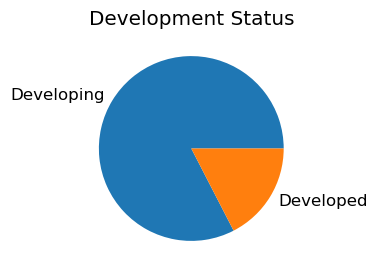

In [8]:
labels = ['Developing', 'Developed']

plt.figure(figsize=(5,3))
plt.rcParams.update({'font.size': 12})
plt.rcParams['figure.dpi']=300
plt.pie(development, labels = labels)
plt.title('Development Status')
plt.savefig('figures/development_piechart.png')
plt.show()

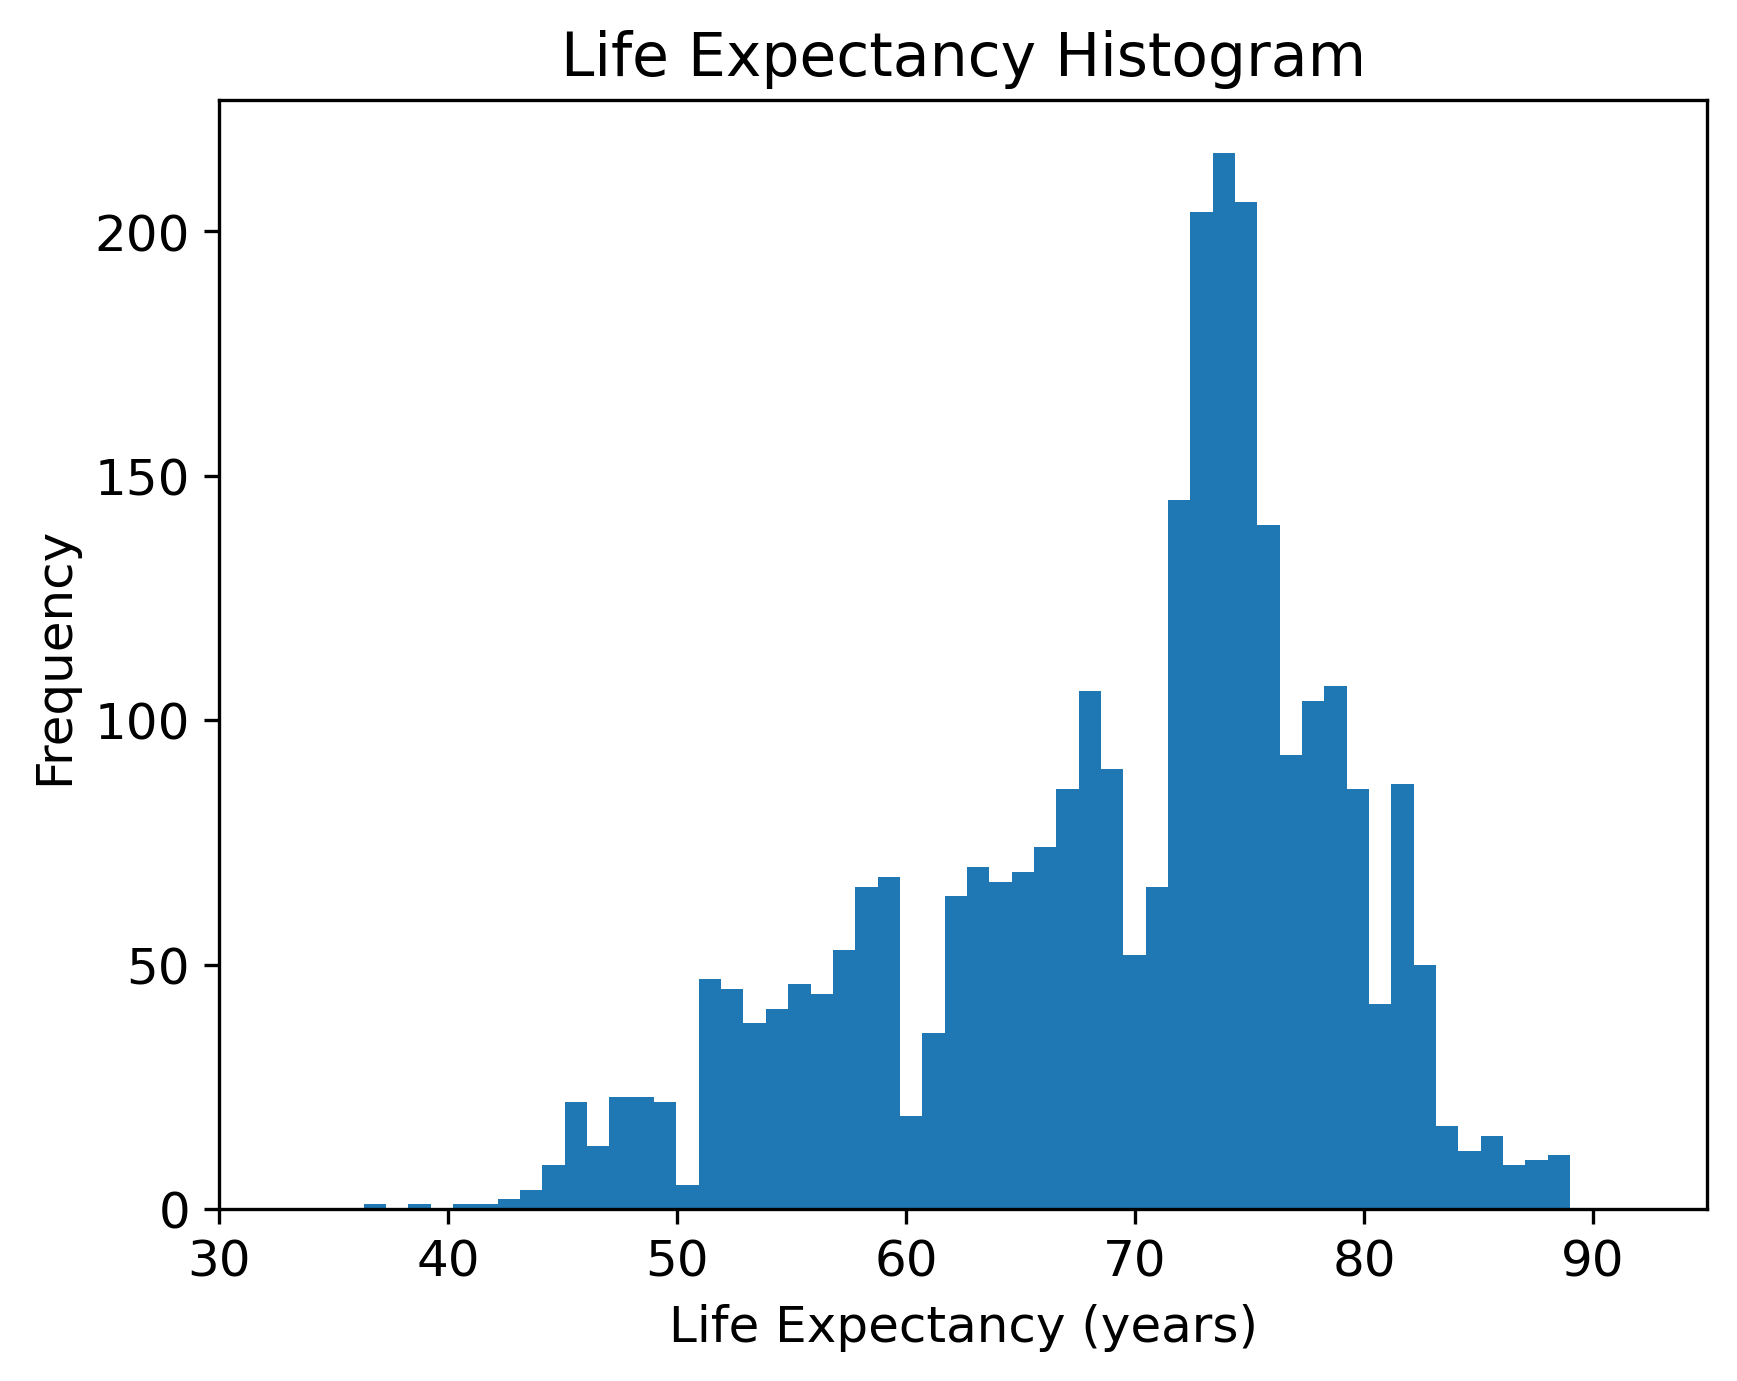

In [11]:
#preparing the histogram for life expectancy 
df['Life expectancy '].plot.hist(bins = int(np.sqrt(df.shape[0])))
#changing the font size
plt.rcParams.update({'font.size': 12})
plt.rcParams['figure.dpi']=300
#setting the graph, x-axis, and y-axis title 
plt.title('Life Expectancy Histogram')
plt.xlabel('Life Expectancy (years)')
plt.ylabel('Frequency')
plt.xlim(30, 95)
plt.savefig('figures/LE_histogram.png')
plt.show()

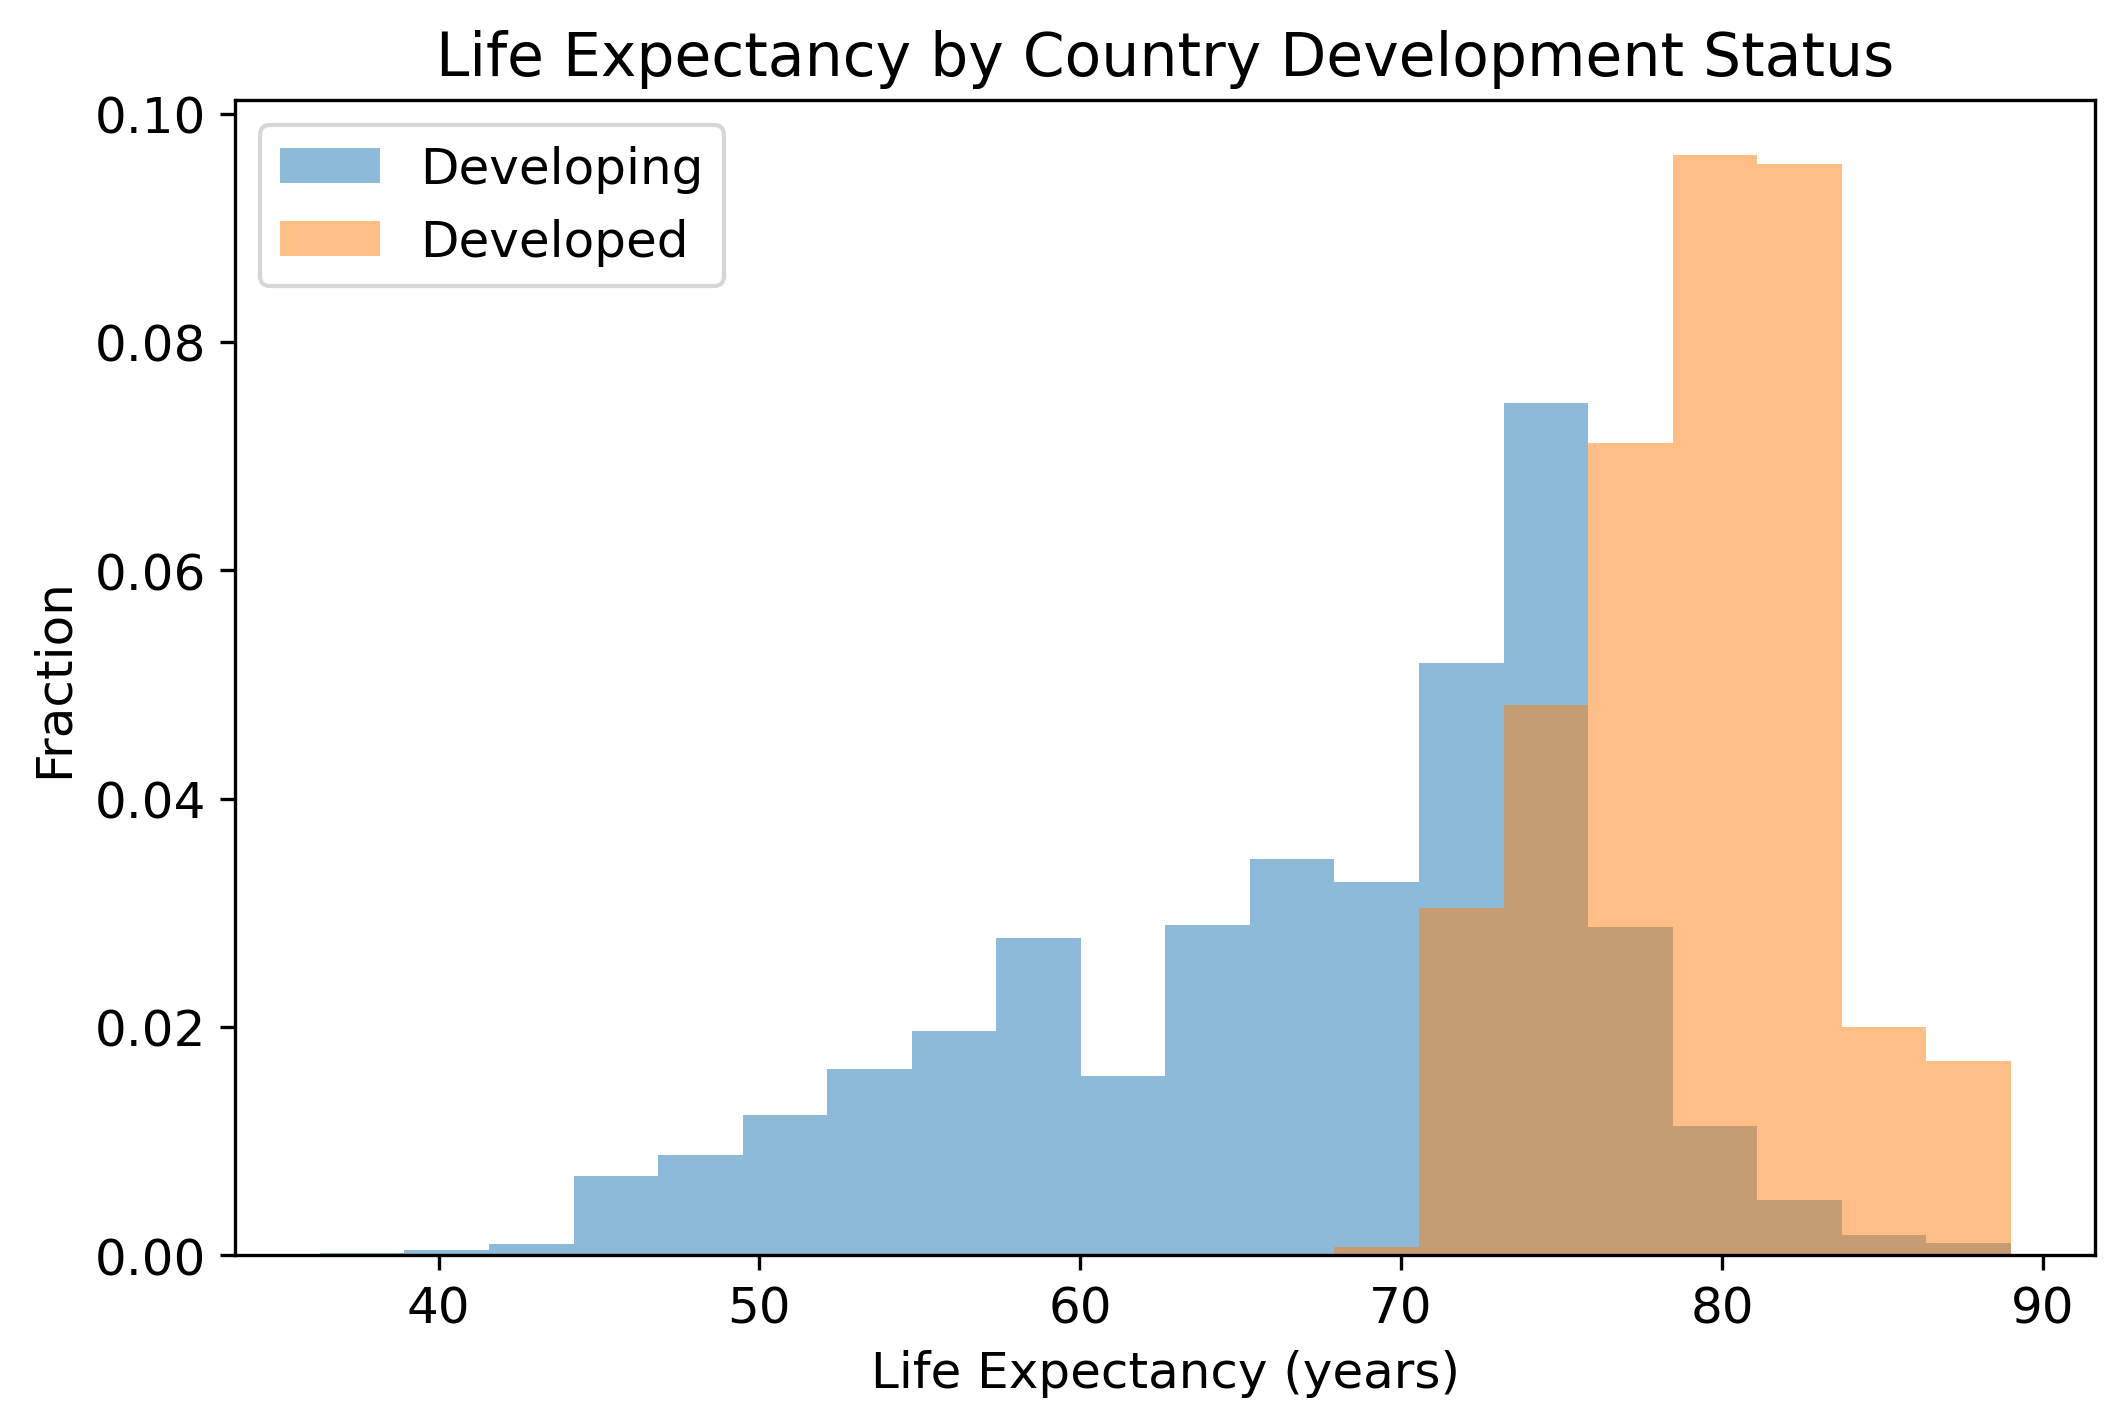

In [12]:
import matplotlib
from matplotlib import pylab as plt

#initializing categories
categories = df['Status'].unique()
#initializing bin range to the min and max of life expectancy in the dataframe
bin_range = (df['Life expectancy '].min(),df['Life expectancy '].max())
#setting the size of the graph
plt.figure(figsize=(8,5))
plt.rcParams['figure.dpi']=300

#plotting the histogram 
for c in categories: plt.hist(df[df['Status']==c]['Life expectancy '],alpha=0.5,label=c,range=bin_range,bins=20,density=True) 
plt.legend()
#setting the graph, x-axis, and y-axis title 
plt.title('Life Expectancy by Country Development Status')
plt.ylabel('Fraction')
plt.xlabel('Life Expectancy (years)')
plt.savefig('figures/devel_status_histogram.png')
plt.show()

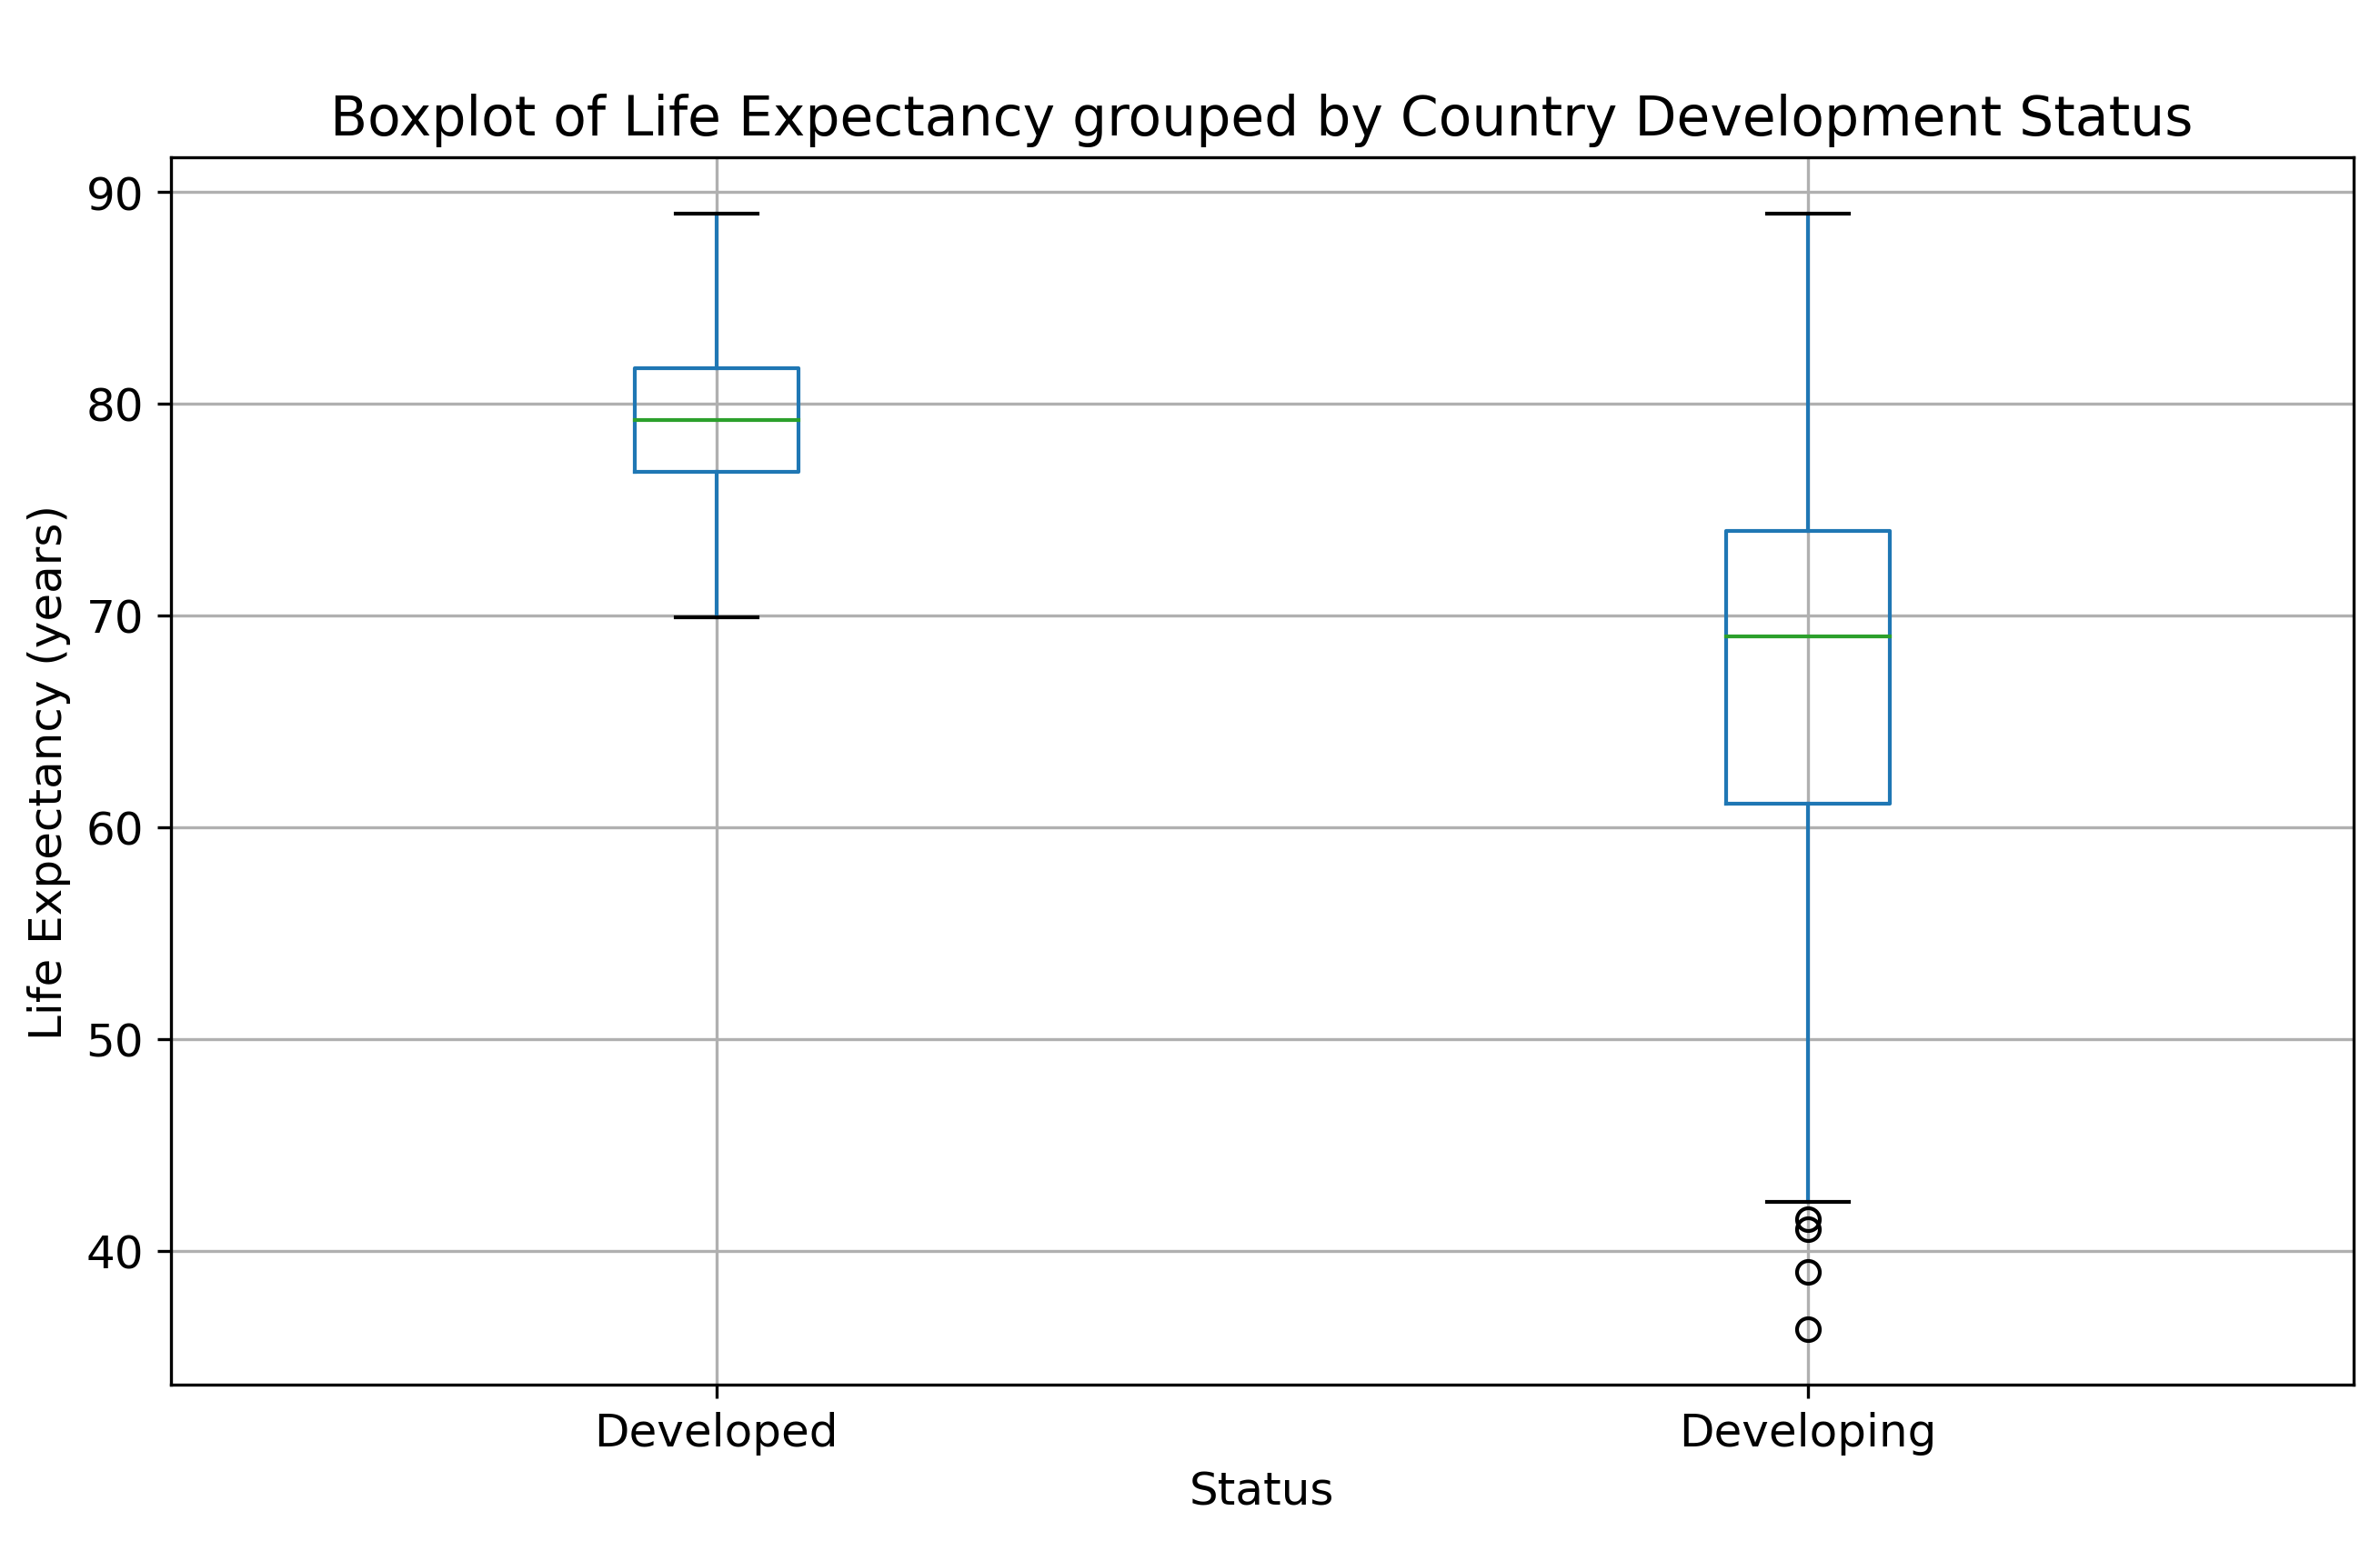

In [13]:
df[['Life expectancy ','Status']].boxplot(by='Status',figsize=(10,6))
#changing the font size
plt.rcParams.update({'font.size': 12})
plt.rcParams['figure.dpi']=300
#setting the graph, x-axis, and y-axis title 
plt.ylabel('Life Expectancy (years)')
plt.xlabel('Status')
plt.title('Boxplot of Life Expectancy grouped by Country Development Status')
plt.suptitle(' ')
plt.savefig('figures/devel_status_boxplot.png')
plt.show()

In [14]:
#changing all null values in the dataframe to -1 in order to plot heatmaps below
df = df.replace(np.nan, -1)

In [15]:
#initializing nbins
nbins = 50
heatmap, xedges, yedges = np.histogram2d(df['Life expectancy '], df[' BMI '],bins=nbins)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

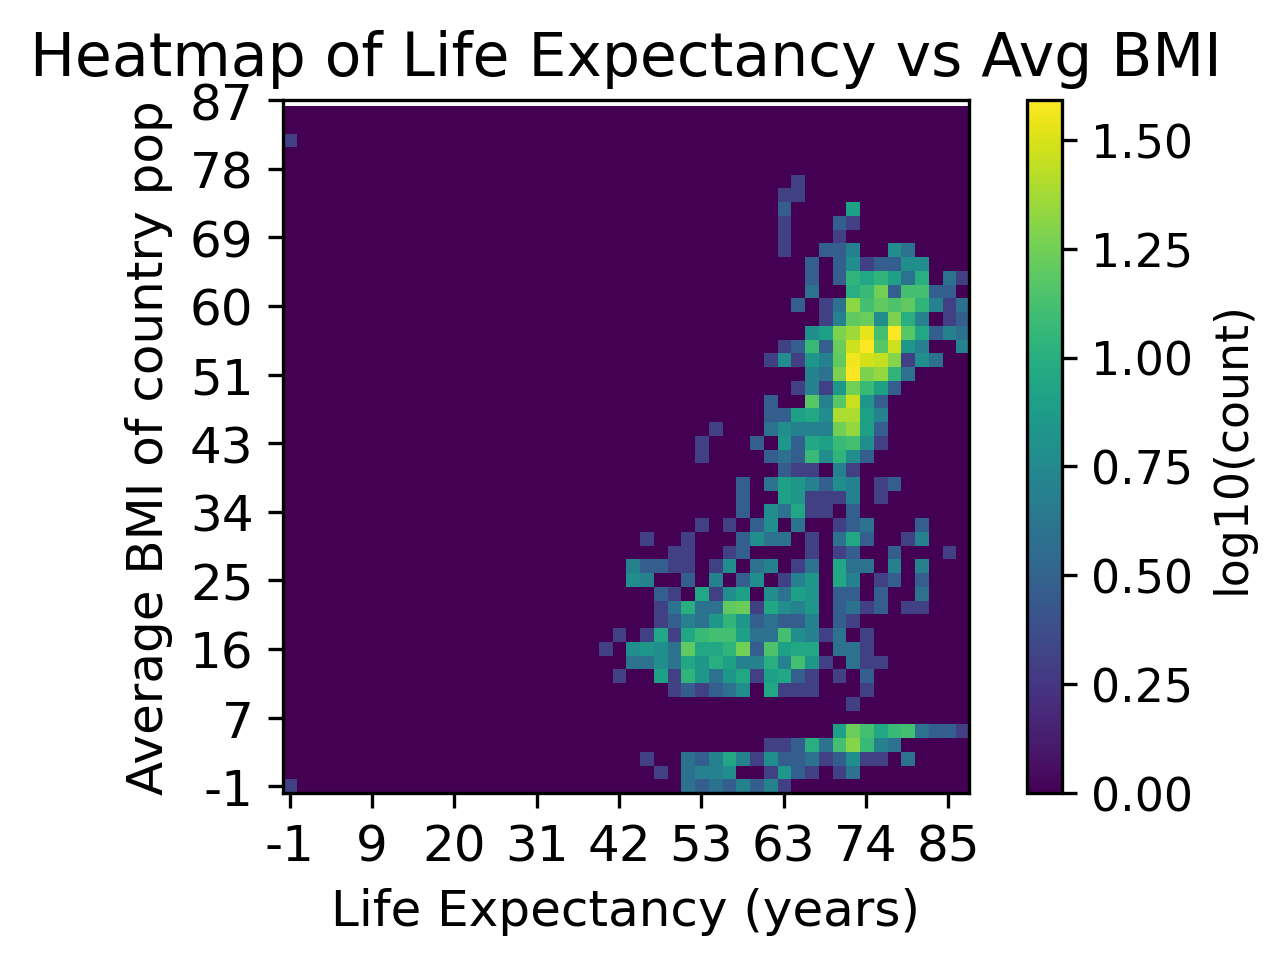

In [16]:
heatmap[heatmap == 0] = 0.1
plt.figure(figsize=(5,3))
plt.imshow(np.log10(heatmap).T, origin='lower',vmin=0)
#setting the graph, x-axis, and y-axis title 
plt.rcParams['figure.dpi']=300
plt.title('Heatmap of Life Expectancy vs Avg BMI')
plt.rcParams.update({'font.size': 11})
plt.xlabel('Life Expectancy (years)')
plt.ylabel('Average BMI of country pop')
plt.xticks(np.arange(nbins+1)[::6],xedges[::6].astype(int))
plt.yticks(np.arange(nbins+1)[::5],yedges[::5].astype(int))
plt.colorbar(label='log10(count)')
plt.savefig('figures/BMI_LE_heatmap.png')
plt.show()

In [17]:
#initializing nbins
nbins = 60
heatmap, xedges, yedges = np.histogram2d(df['Life expectancy '], df['Adult Mortality'],bins=nbins)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

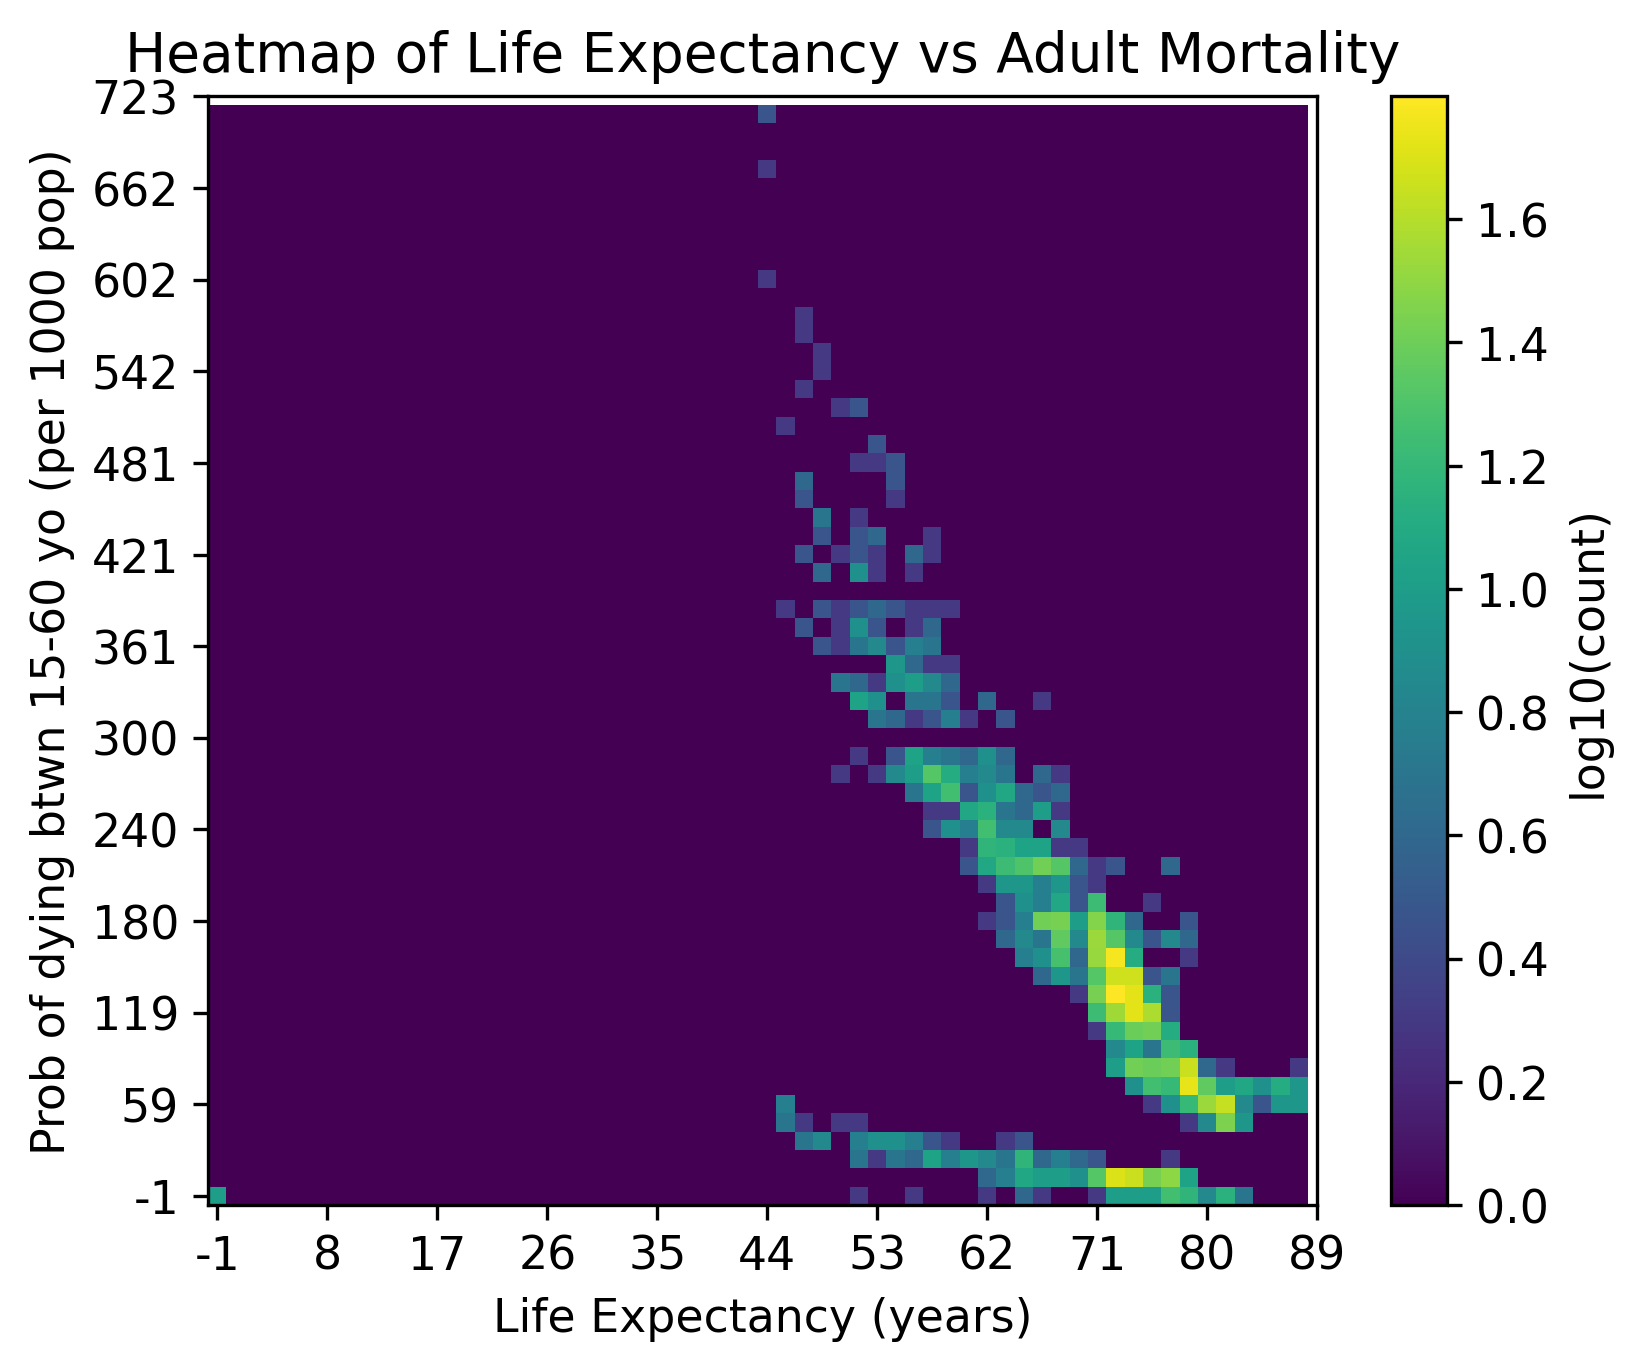

In [18]:
heatmap[heatmap == 0] = 0.1
plt.imshow(np.log10(heatmap).T, origin='lower',vmin=0)
#setting the graph, x-axis, and y-axis title 
plt.rcParams['figure.dpi']=300
plt.title('Heatmap of Life Expectancy vs Adult Mortality')
plt.rcParams.update({'font.size': 11})
plt.xlabel('Life Expectancy (years)')
plt.ylabel('Prob of dying btwn 15-60 yo (per 1000 pop)')
plt.xticks(np.arange(nbins+1)[::6],xedges[::6].astype(int))
plt.yticks(np.arange(nbins+1)[::5],yedges[::5].astype(int))
plt.colorbar(label='log10(count)')
plt.savefig('figures/Ad_Mort_LE_heatmap.png')
plt.show()

In [19]:
#initializing nbins
nbins = 50
heatmap, xedges, yedges = np.histogram2d(df['Life expectancy '], df['infant deaths'],bins=nbins)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

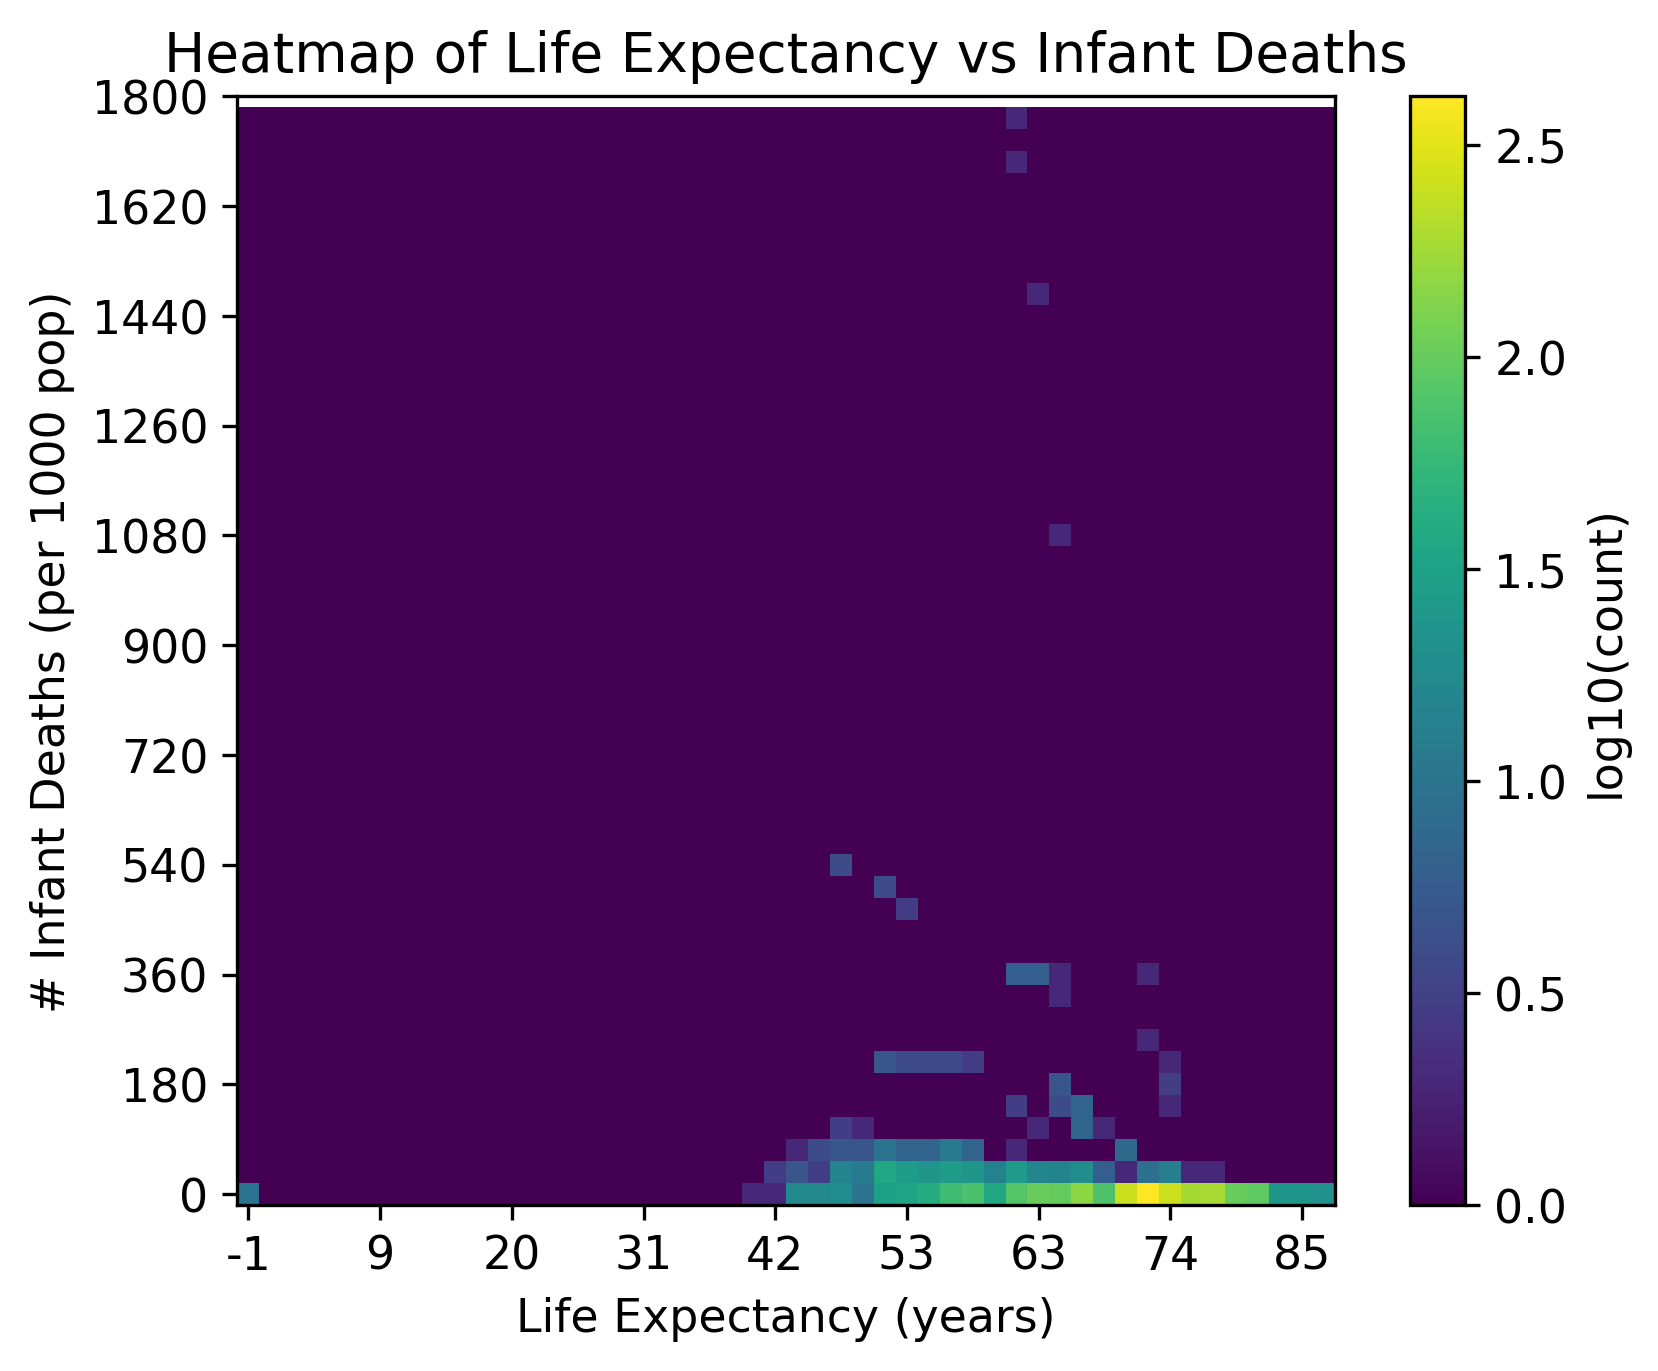

In [20]:
heatmap[heatmap == 0] = 0.1
plt.imshow(np.log10(heatmap).T, origin='lower',vmin=0)
#setting the graph, x-axis, and y-axis title 
plt.rcParams['figure.dpi']=300
plt.title('Heatmap of Life Expectancy vs Infant Deaths')
plt.rcParams.update({'font.size': 11})
plt.xlabel('Life Expectancy (years)')
plt.ylabel('# Infant Deaths (per 1000 pop)')
plt.xticks(np.arange(nbins+1)[::6],xedges[::6].astype(int))
plt.yticks(np.arange(nbins+1)[::5],yedges[::5].astype(int))
plt.colorbar(label='log10(count)')
plt.savefig('figures/Inf_Death_LE_heatmap.png')
plt.show()

In [21]:
#initializing nbins
nbins = 40
heatmap, xedges, yedges = np.histogram2d(df['Life expectancy '], df['Alcohol'],bins=nbins)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

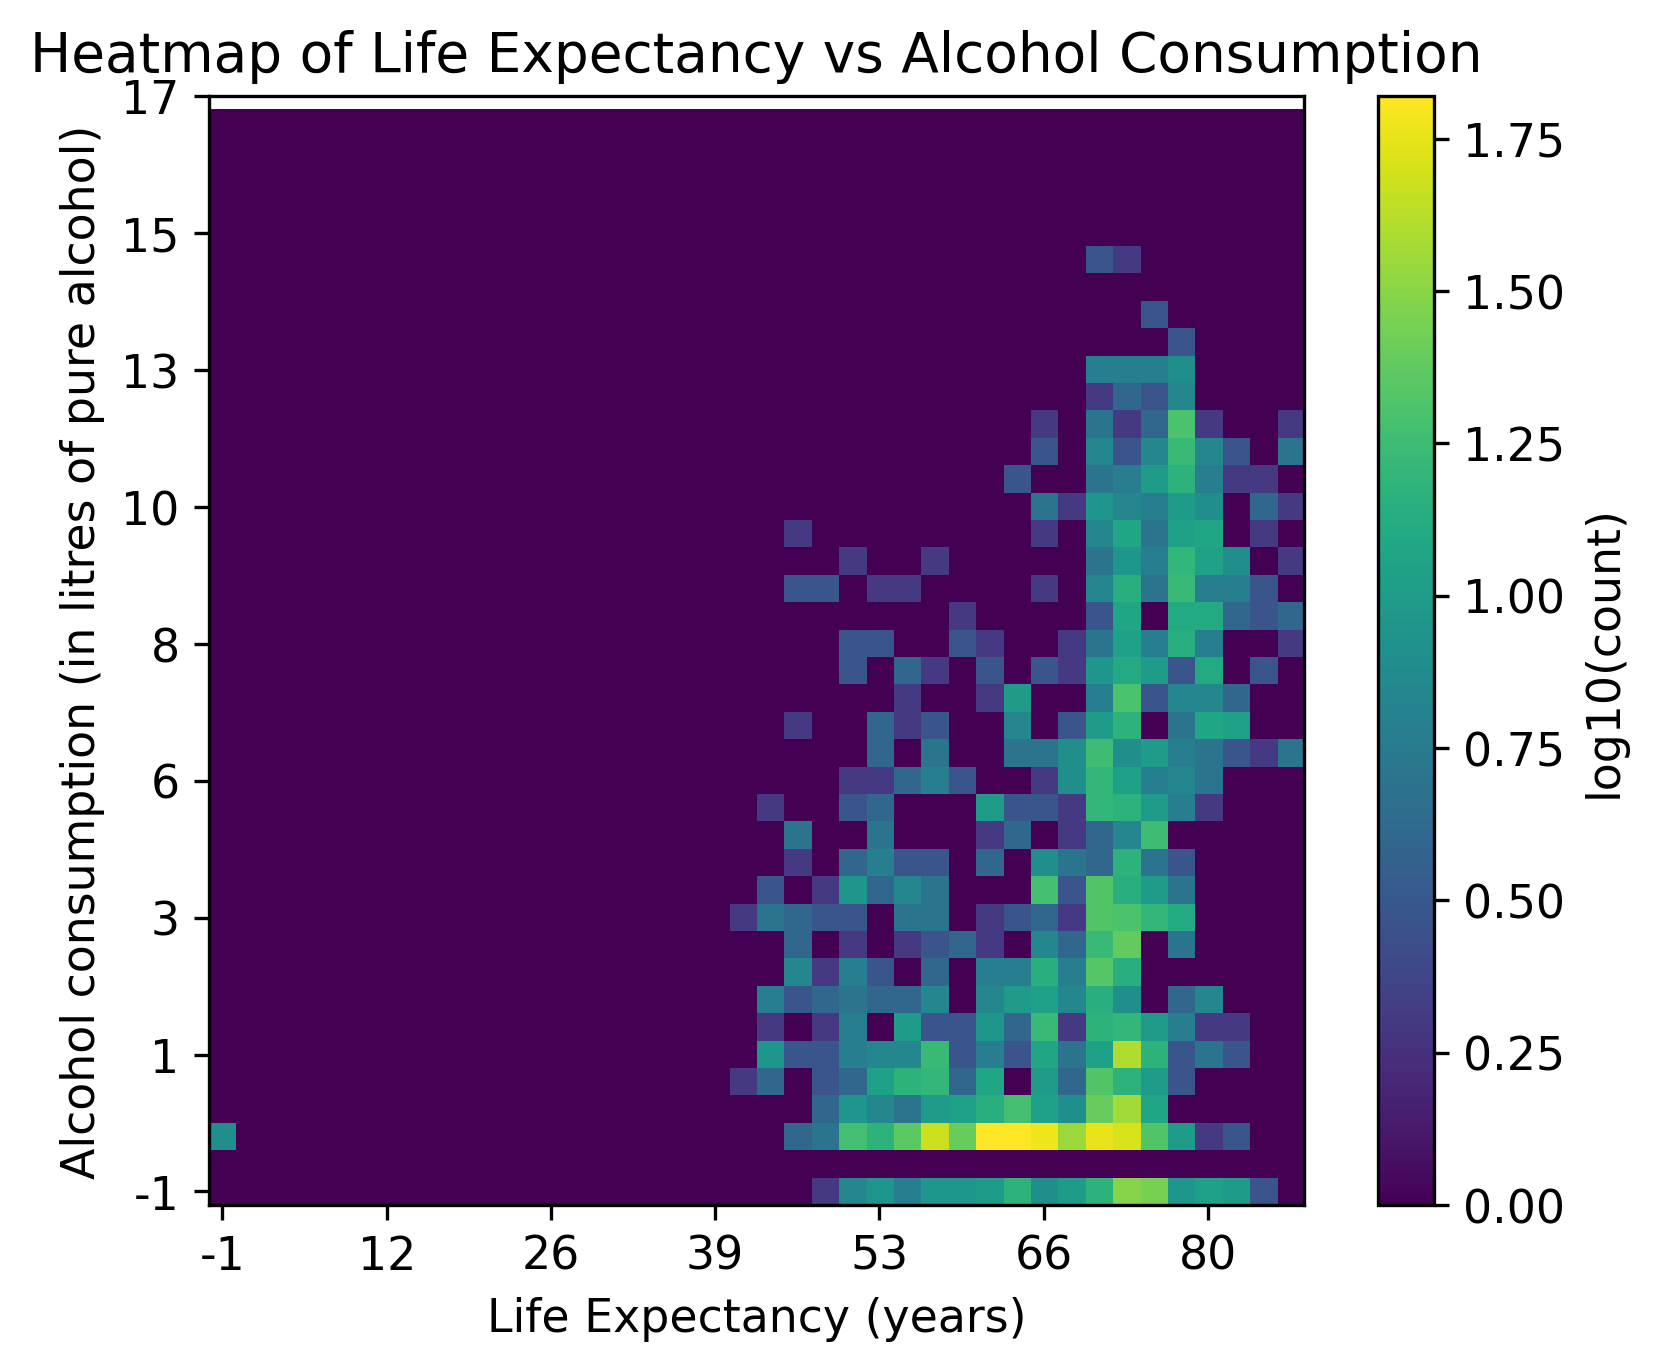

In [22]:
heatmap[heatmap == 0] = 0.1
plt.imshow(np.log10(heatmap).T, origin='lower',vmin=0)
#setting the graph, x-axis, and y-axis title 
plt.rcParams['figure.dpi']=300
plt.title('Heatmap of Life Expectancy vs Alcohol Consumption')
plt.rcParams.update({'font.size': 11})
plt.xlabel('Life Expectancy (years)')
plt.ylabel('Alcohol consumption (in litres of pure alcohol)')
plt.xticks(np.arange(nbins+1)[::6],xedges[::6].astype(int))
plt.yticks(np.arange(nbins+1)[::5],yedges[::5].astype(int))
plt.colorbar(label='log10(count)')
plt.savefig('figures/Alc_LE_heatmap.png')
plt.show()

In [23]:
#initializing nbins
nbins = 50
heatmap, xedges, yedges = np.histogram2d(df['Life expectancy '], df['percentage expenditure'],bins=nbins)
extent = [xedges[0], xedges[0], yedges[0], yedges[0]]

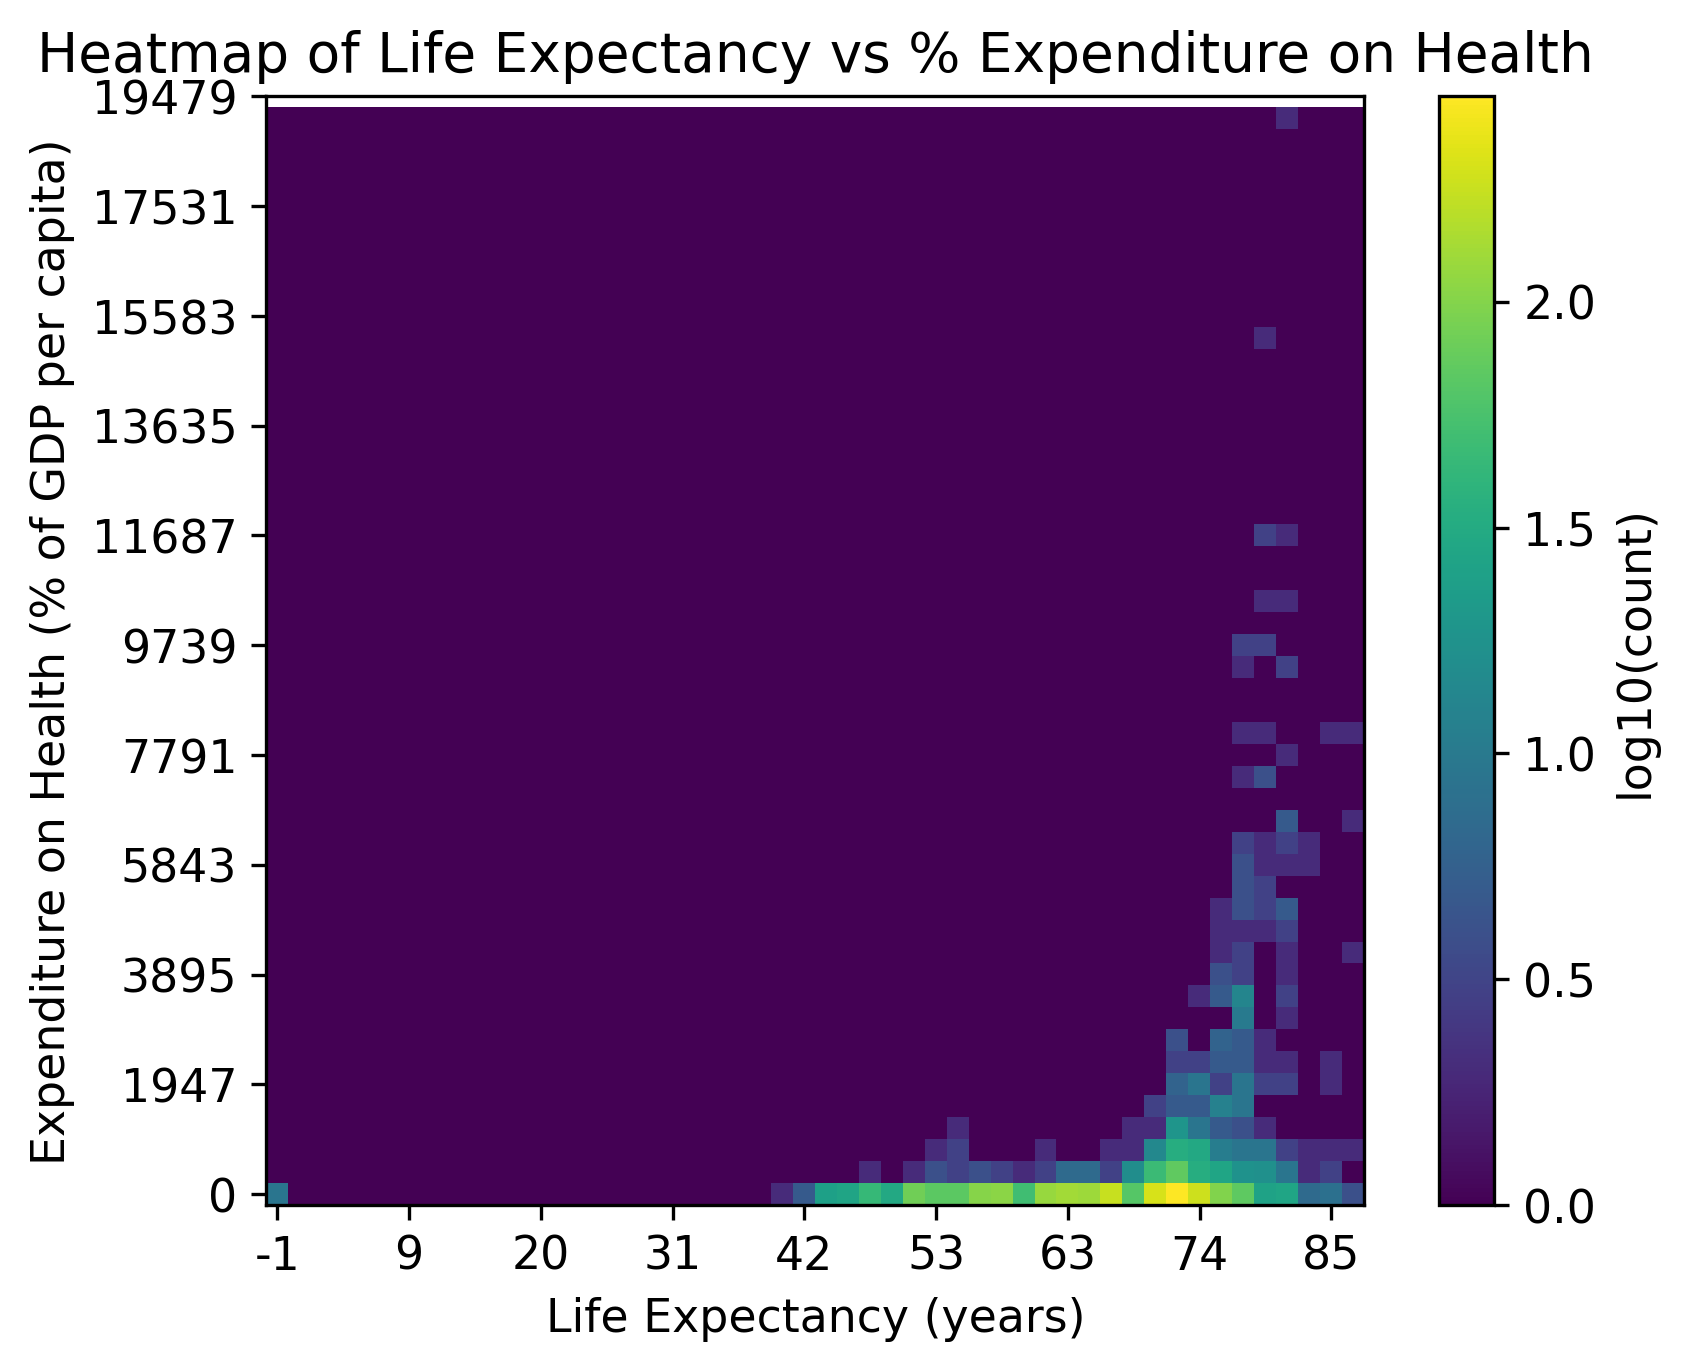

In [24]:
heatmap[heatmap == 0] = 0.1
plt.imshow(np.log10(heatmap).T, origin='lower',vmin=0)
#setting the graph, x-axis, and y-axis title 
plt.rcParams['figure.dpi']=300
plt.title('Heatmap of Life Expectancy vs % Expenditure on Health')
plt.rcParams.update({'font.size': 11})
plt.xlabel('Life Expectancy (years)')
plt.ylabel('Expenditure on Health (% of GDP per capita)')
plt.xticks(np.arange(nbins+1)[::6],xedges[::6].astype(int))
plt.yticks(np.arange(nbins+1)[::5],yedges[::5].astype(int))
plt.colorbar(label='log10(count)')
plt.savefig('figures/%Exp_LE_heatmap.png')
plt.show()

In [25]:
#initializing nbins
nbins = 50
heatmap, xedges, yedges = np.histogram2d(df['Life expectancy '], df['Hepatitis B'],bins=nbins)
extent = [xedges[0], xedges[0], yedges[0], yedges[0]]

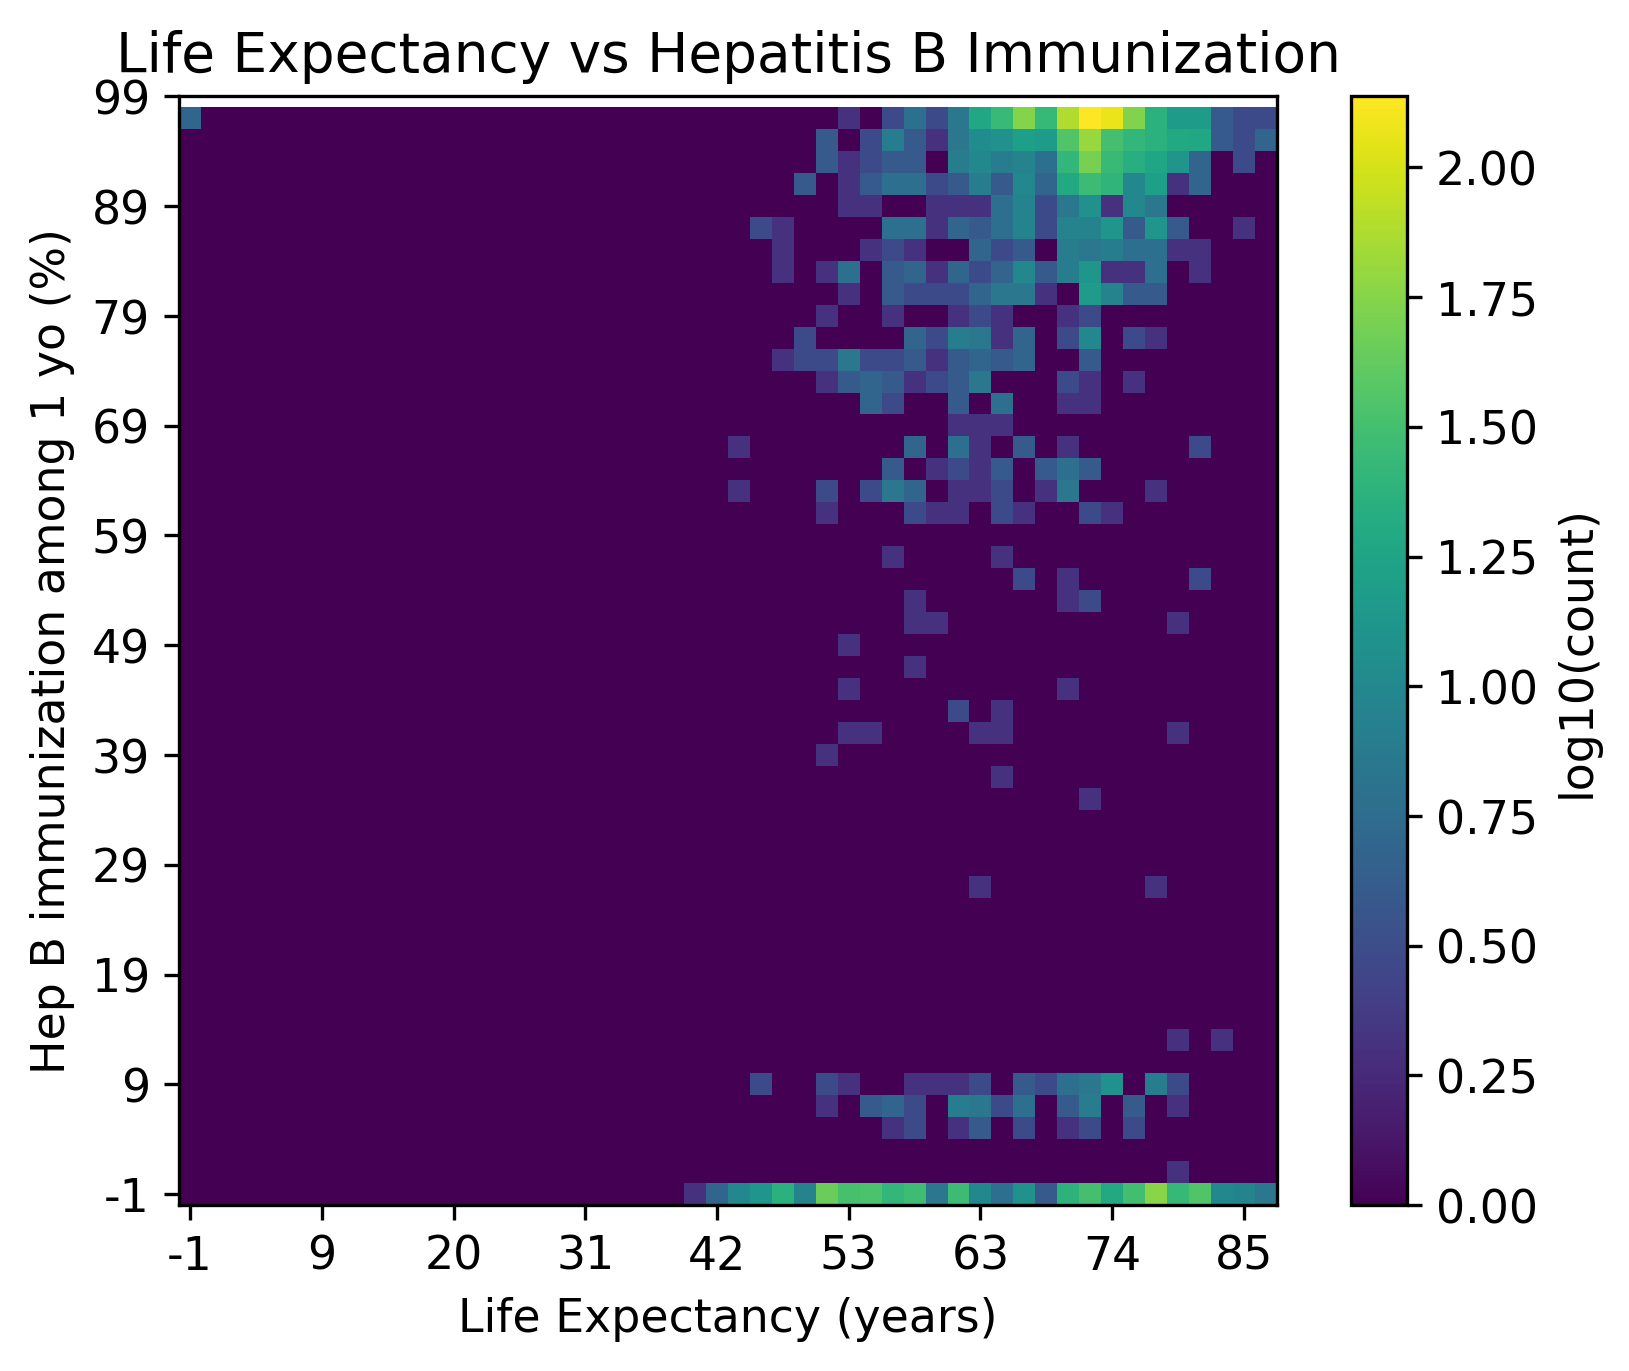

In [26]:
heatmap[heatmap == 0] = 0.1
plt.imshow(np.log10(heatmap).T, origin='lower',vmin=0)
#setting the graph, x-axis, and y-axis title 
plt.rcParams['figure.dpi']=300
plt.title('Life Expectancy vs Hepatitis B Immunization')
plt.rcParams.update({'font.size': 11})
plt.xlabel('Life Expectancy (years)')
plt.ylabel('Hep B immunization among 1 yo (%)')
plt.rcParams.update({'font.size': 11})
plt.xticks(np.arange(nbins+1)[::6],xedges[::6].astype(int))
plt.yticks(np.arange(nbins+1)[::5],yedges[::5].astype(int))
plt.colorbar(label='log10(count)')
plt.savefig('figures/HepB_LE_heatmap.png')
plt.show()

In [27]:
#initializing nbins
nbins = 40
heatmap, xedges, yedges = np.histogram2d(df['Life expectancy '], df['Measles '],bins=nbins)
extent = [xedges[0], xedges[0], yedges[0], yedges[0]]

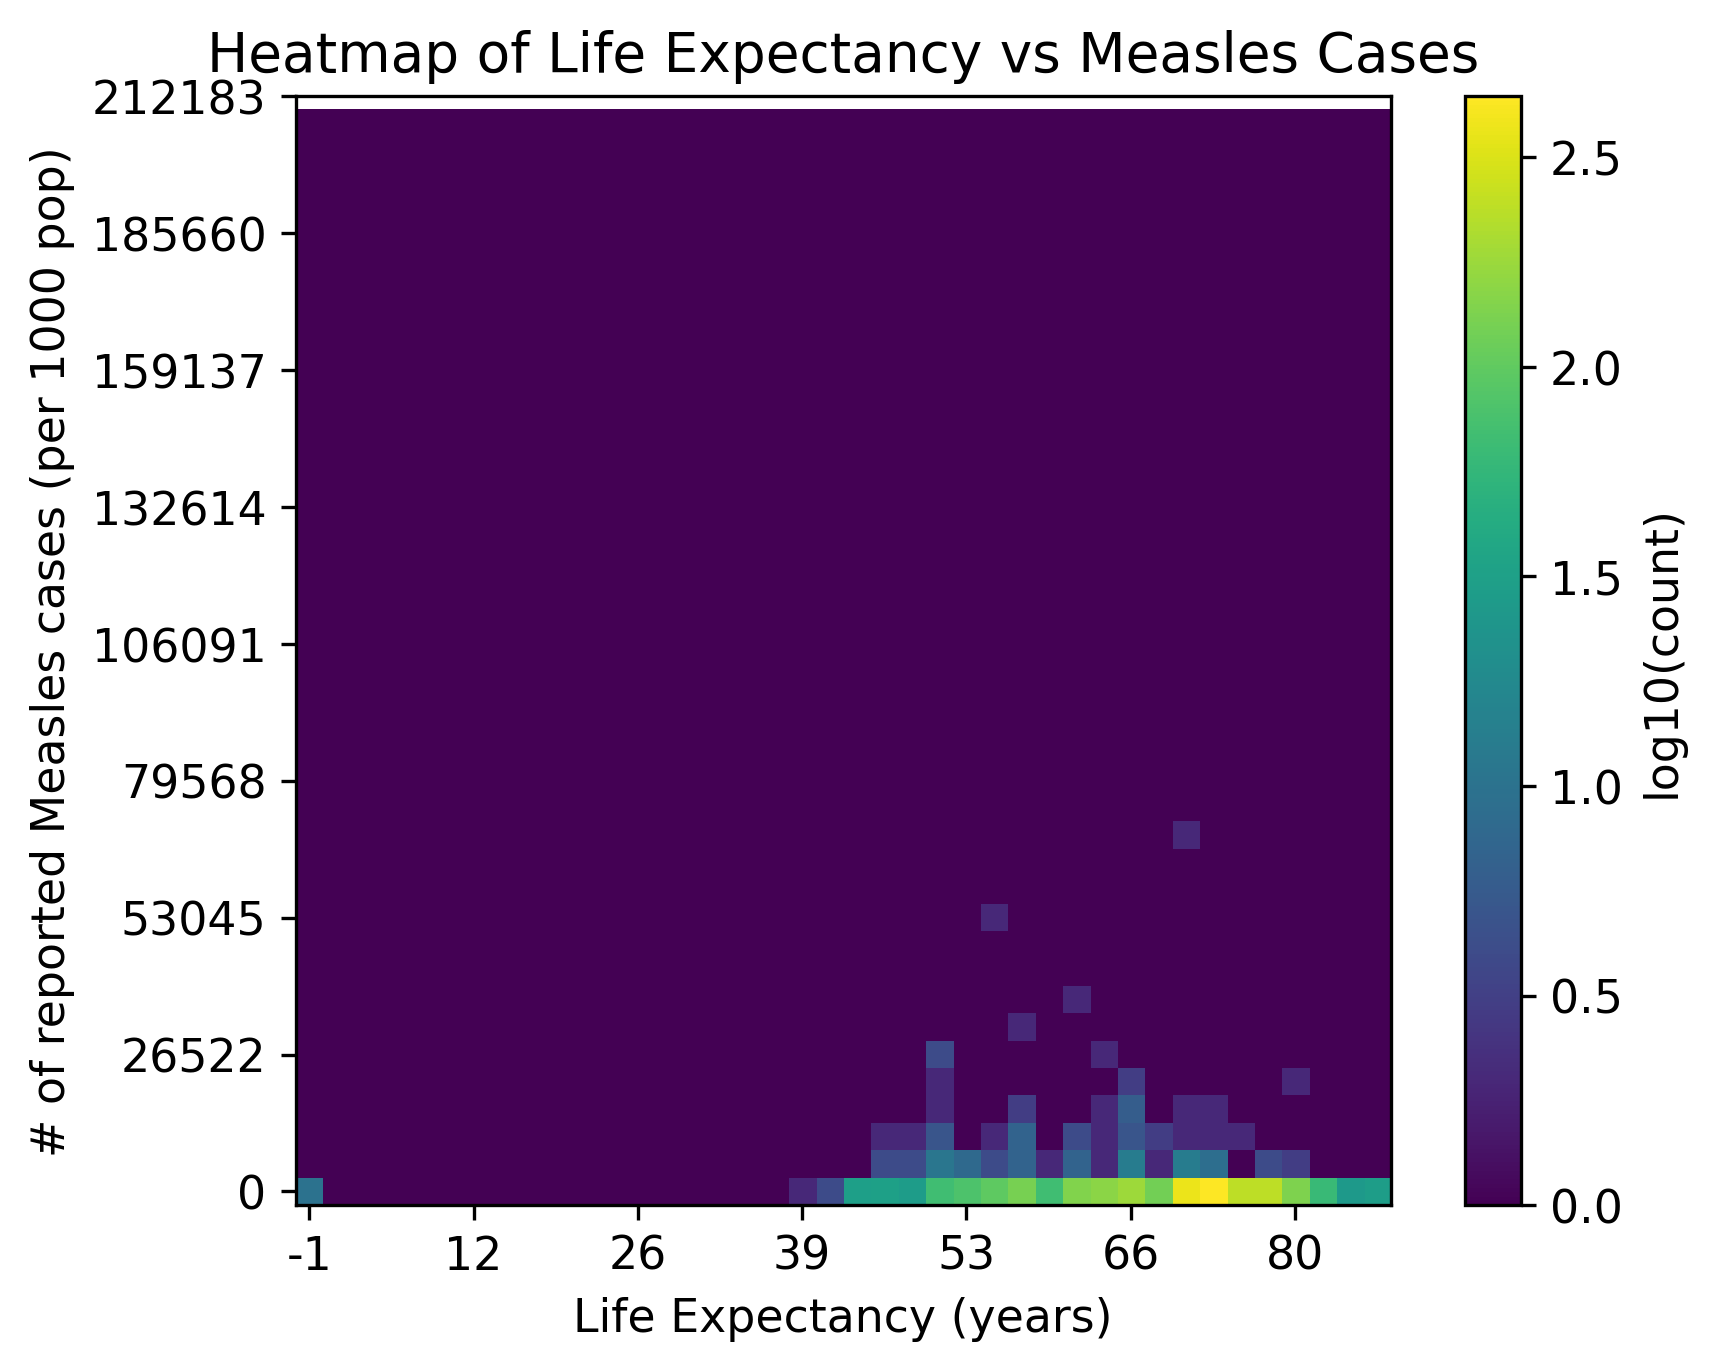

In [28]:
heatmap[heatmap == 0] = 0.1
plt.imshow(np.log10(heatmap).T, origin='lower',vmin=0)
#setting the graph, x-axis, and y-axis title 
plt.rcParams['figure.dpi']=300
plt.title('Heatmap of Life Expectancy vs Measles Cases')
plt.rcParams.update({'font.size': 11})
plt.xlabel('Life Expectancy (years)')
plt.ylabel('# of reported Measles cases (per 1000 pop)')
plt.xticks(np.arange(nbins+1)[::6],xedges[::6].astype(int))
plt.yticks(np.arange(nbins+1)[::5],yedges[::5].astype(int))
plt.colorbar(label='log10(count)')
plt.savefig('figures/Measles_LE_heatmap.png')
plt.show()

In [29]:
#initializing nbins
nbins = 40
heatmap, xedges, yedges = np.histogram2d(df['Life expectancy '], df['under-five deaths '],bins=nbins)
extent = [xedges[0], xedges[0], yedges[0], yedges[0]]

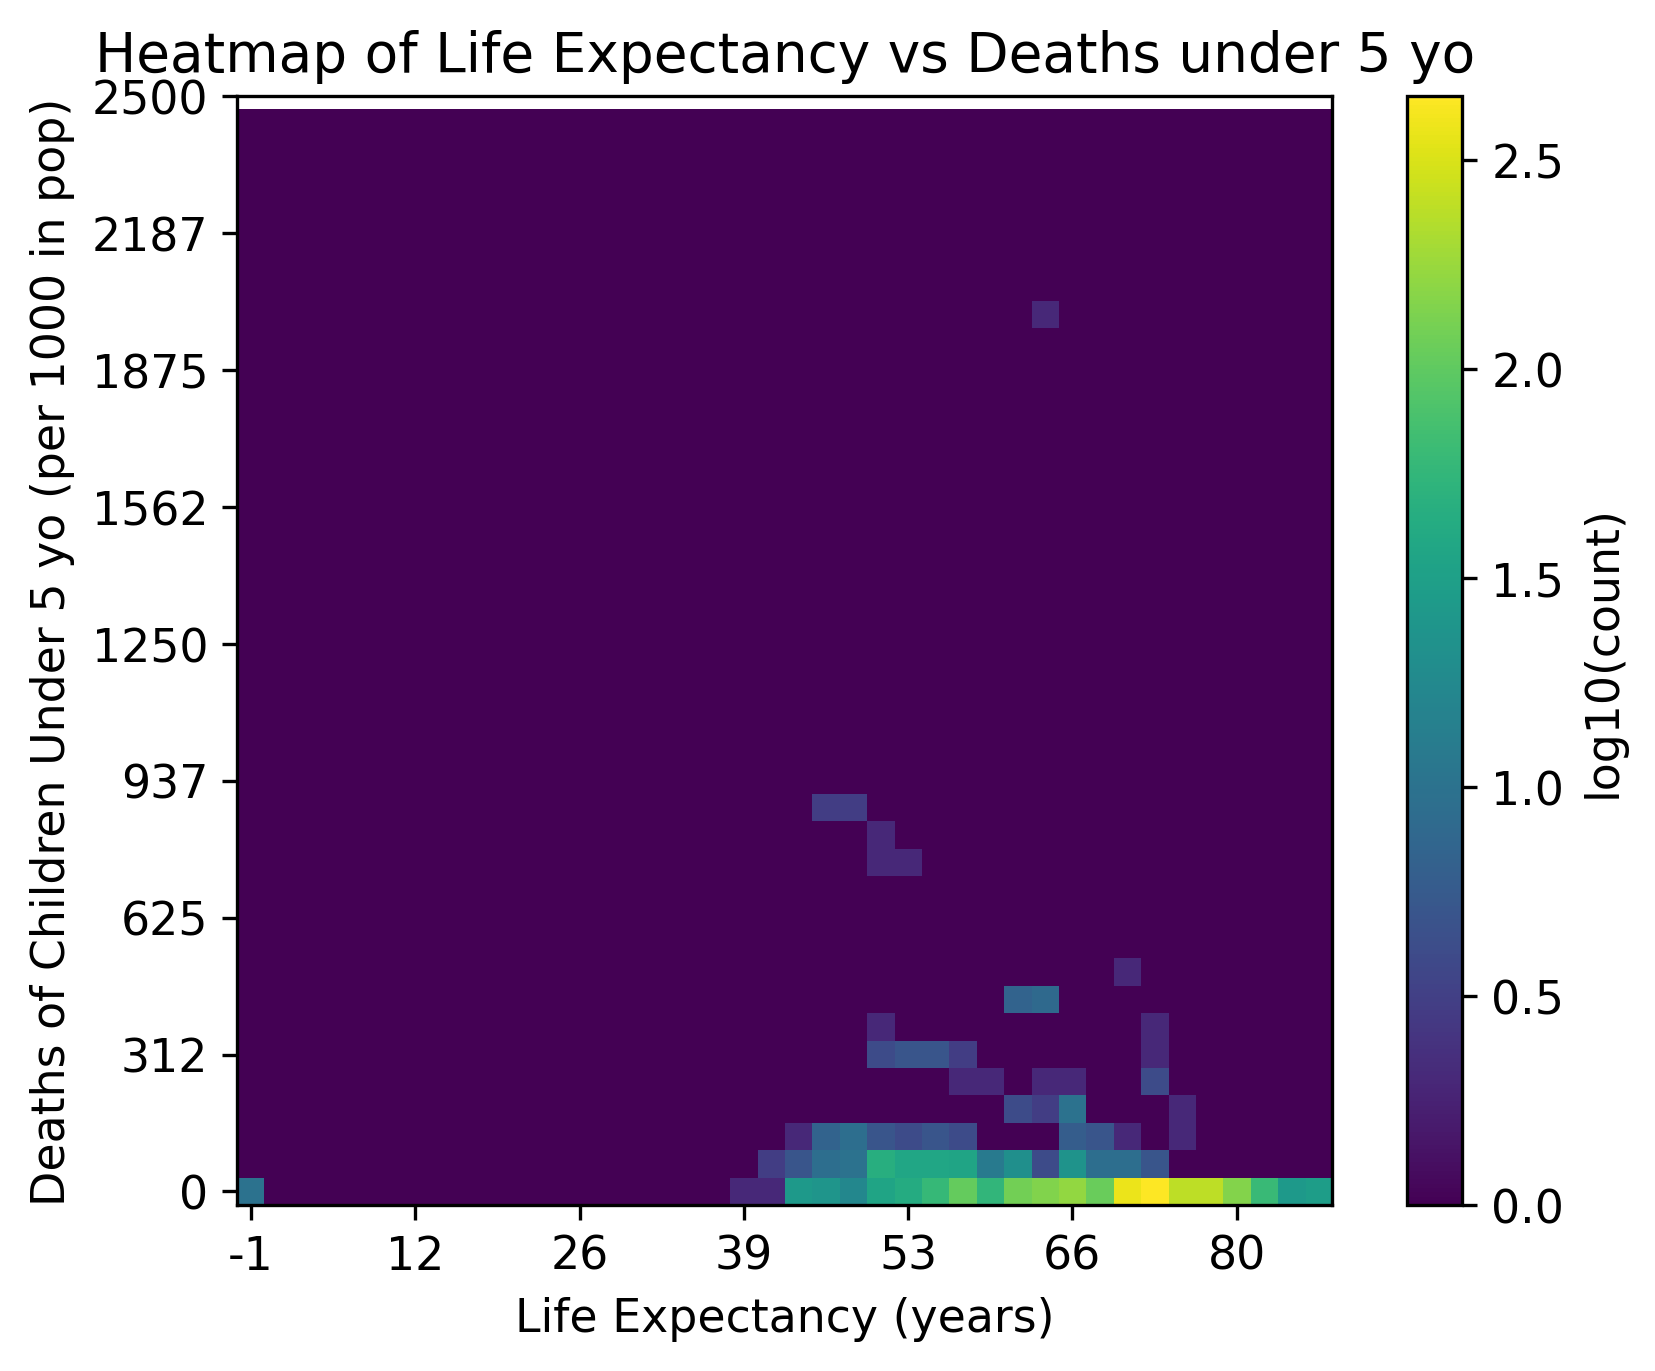

In [30]:
heatmap[heatmap == 0] = 0.1
plt.imshow(np.log10(heatmap).T, origin='lower',vmin=0)
#setting the graph, x-axis, and y-axis title 
plt.rcParams['figure.dpi']=300
plt.title('Heatmap of Life Expectancy vs Deaths under 5 yo')
plt.rcParams.update({'font.size': 11})
plt.xlabel('Life Expectancy (years)')
plt.ylabel('Deaths of Children Under 5 yo (per 1000 in pop)')
plt.xticks(np.arange(nbins+1)[::6],xedges[::6].astype(int))
plt.yticks(np.arange(nbins+1)[::5],yedges[::5].astype(int))
plt.colorbar(label='log10(count)')
plt.savefig('figures/Death_under_5_LE_heatmap.png')
plt.show()

In [31]:
#initializing nbins
nbins = 50
heatmap, xedges, yedges = np.histogram2d(df['Life expectancy '], df['Polio'],bins=nbins)
extent = [xedges[0], xedges[0], yedges[0], yedges[0]]

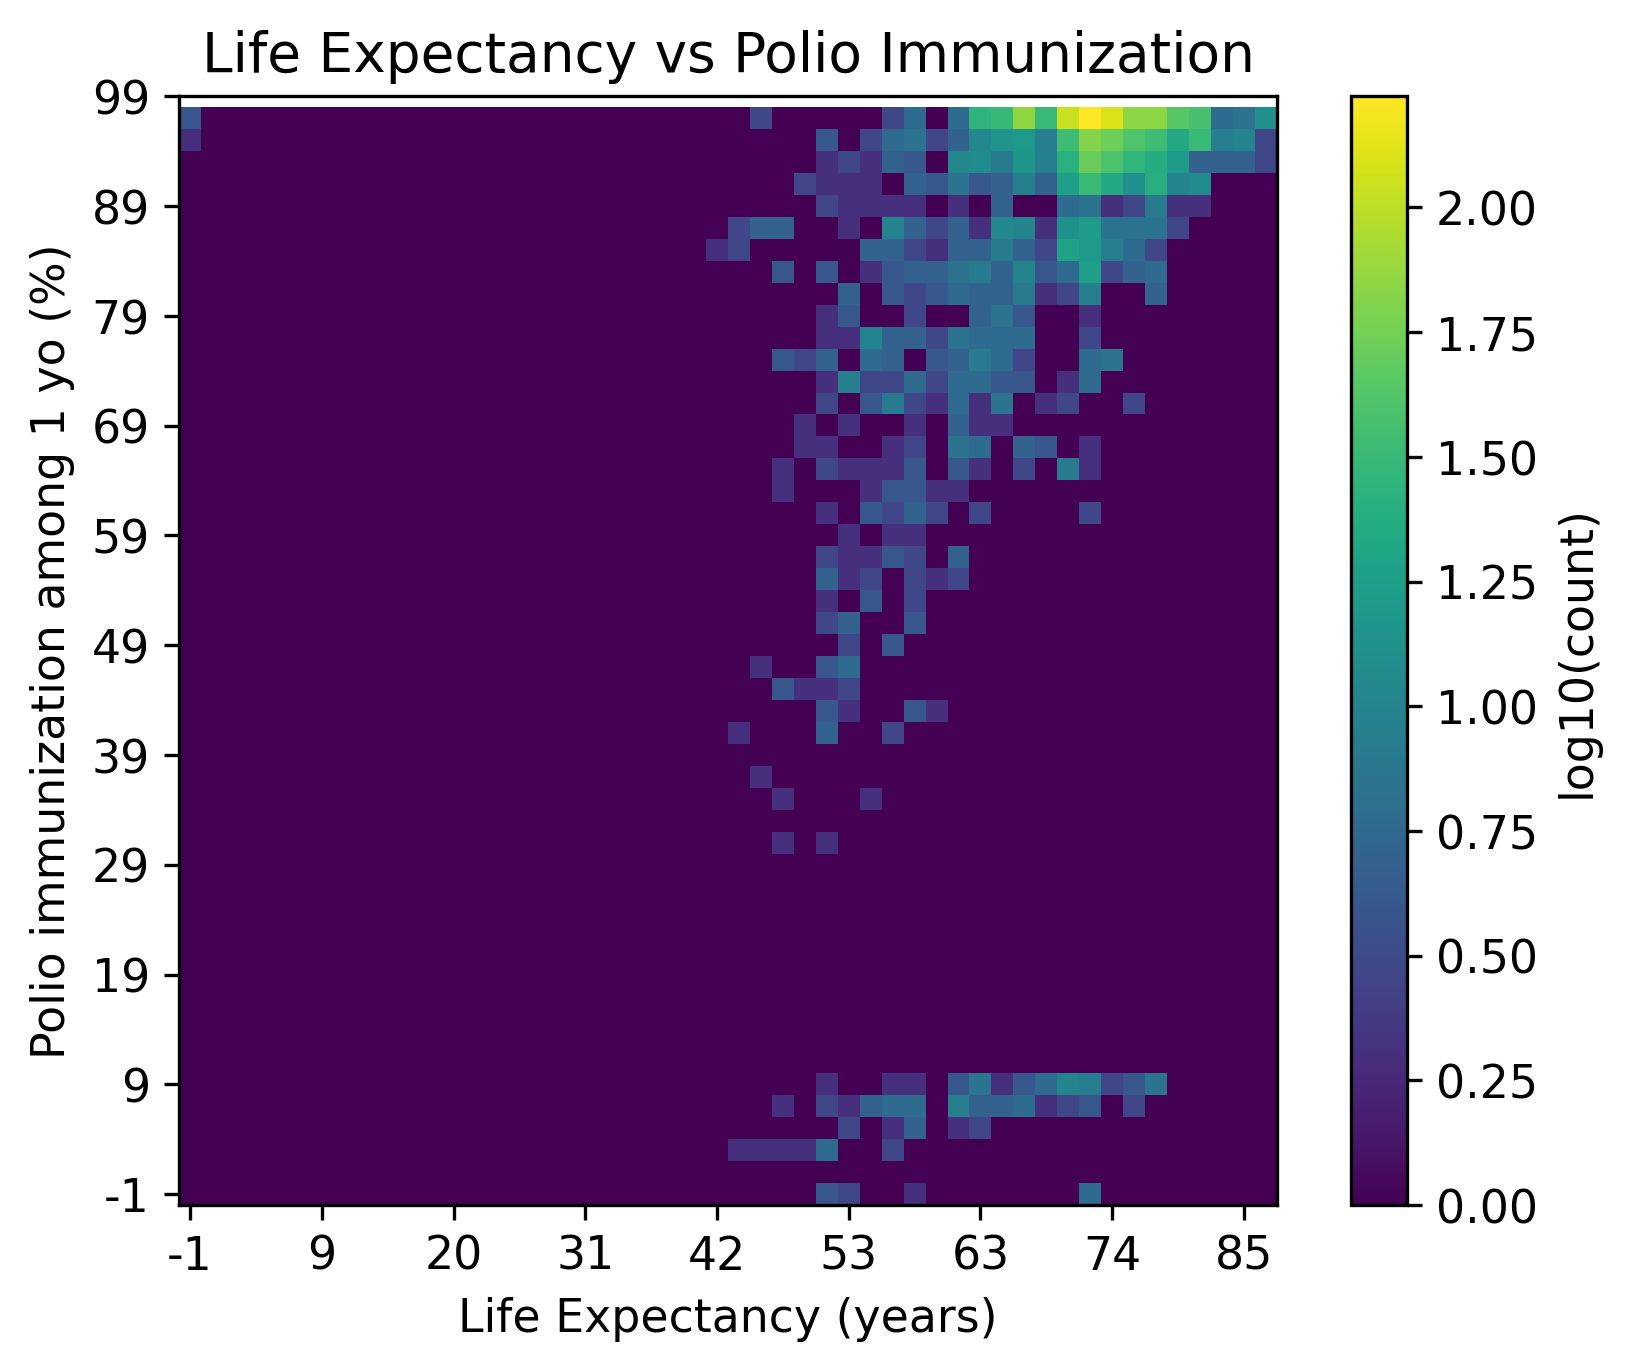

In [32]:
heatmap[heatmap == 0] = 0.1
plt.imshow(np.log10(heatmap).T, origin='lower',vmin=0)
#setting the graph, x-axis, and y-axis title 
plt.rcParams['figure.dpi']=300
plt.title('Life Expectancy vs Polio Immunization')
plt.rcParams.update({'font.size': 11})
plt.xlabel('Life Expectancy (years)')
plt.ylabel('Polio immunization among 1 yo (%)')
plt.rcParams.update({'font.size': 11})
plt.xticks(np.arange(nbins+1)[::6],xedges[::6].astype(int))
plt.yticks(np.arange(nbins+1)[::5],yedges[::5].astype(int))
plt.colorbar(label='log10(count)')
plt.savefig('figures/Polio_LE_heatmap.png')
plt.show()

In [33]:
#initializing nbins
nbins = 50
heatmap, xedges, yedges = np.histogram2d(df['Life expectancy '], df['Total expenditure'],bins=nbins)
extent = [xedges[0], xedges[0], yedges[0], yedges[0]]

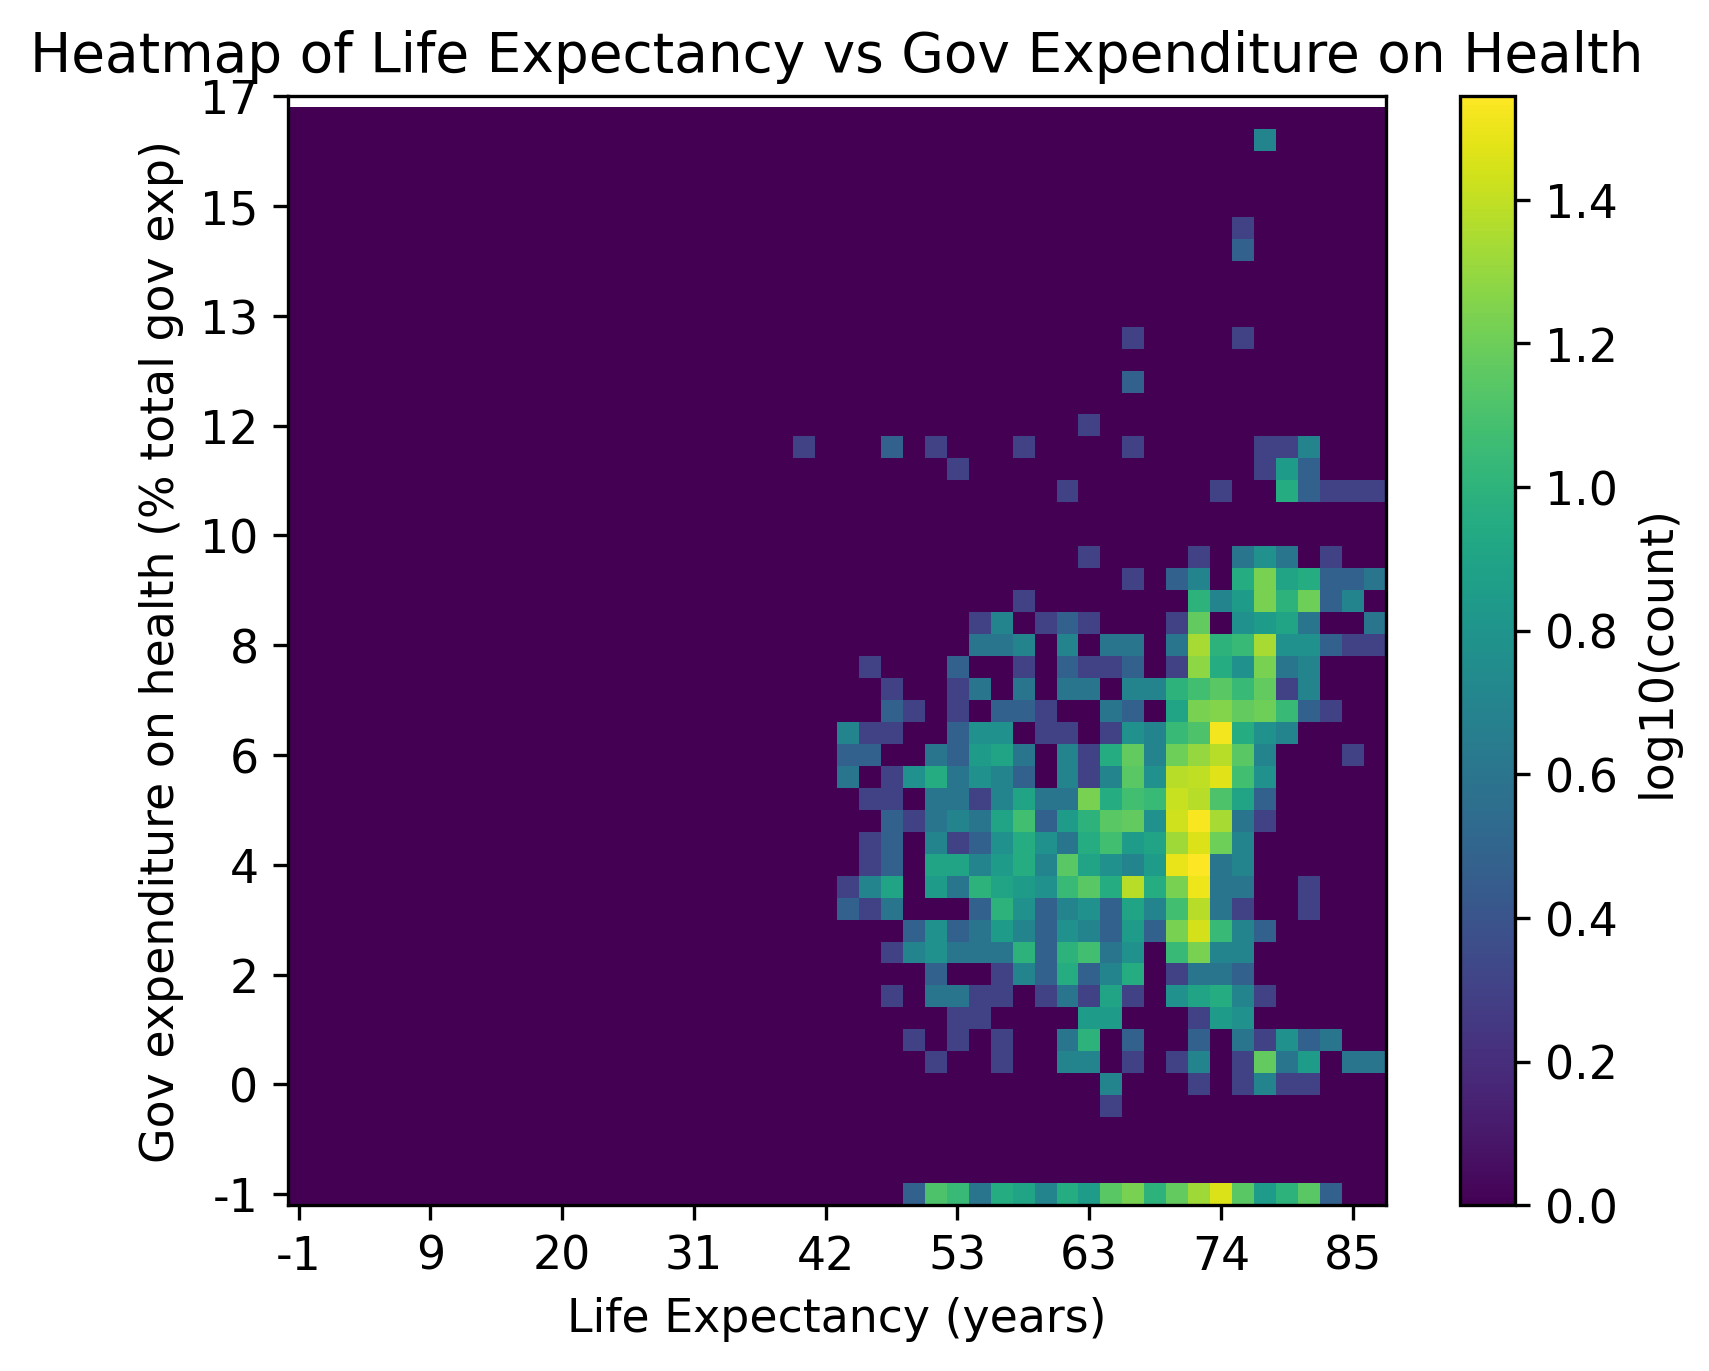

In [34]:
heatmap[heatmap == 0] = 0.1
plt.imshow(np.log10(heatmap).T, origin='lower',vmin=0)
#setting the graph, x-axis, and y-axis title 
plt.rcParams['figure.dpi']=300
plt.title('Heatmap of Life Expectancy vs Gov Expenditure on Health')
plt.rcParams.update({'font.size': 11})
plt.xlabel('Life Expectancy (years)')
plt.ylabel('Gov expenditure on health (% total gov exp)')
plt.xticks(np.arange(nbins+1)[::6],xedges[::6].astype(int))
plt.yticks(np.arange(nbins+1)[::5],yedges[::5].astype(int))
plt.colorbar(label='log10(count)')
plt.savefig('figures/GovExp_LE_heatmap.png')
plt.show()

In [35]:
#initializing nbins
nbins = 50
heatmap, xedges, yedges = np.histogram2d(df['Life expectancy '], df['Diphtheria '],bins=nbins)
extent = [xedges[0], xedges[0], yedges[0], yedges[0]]

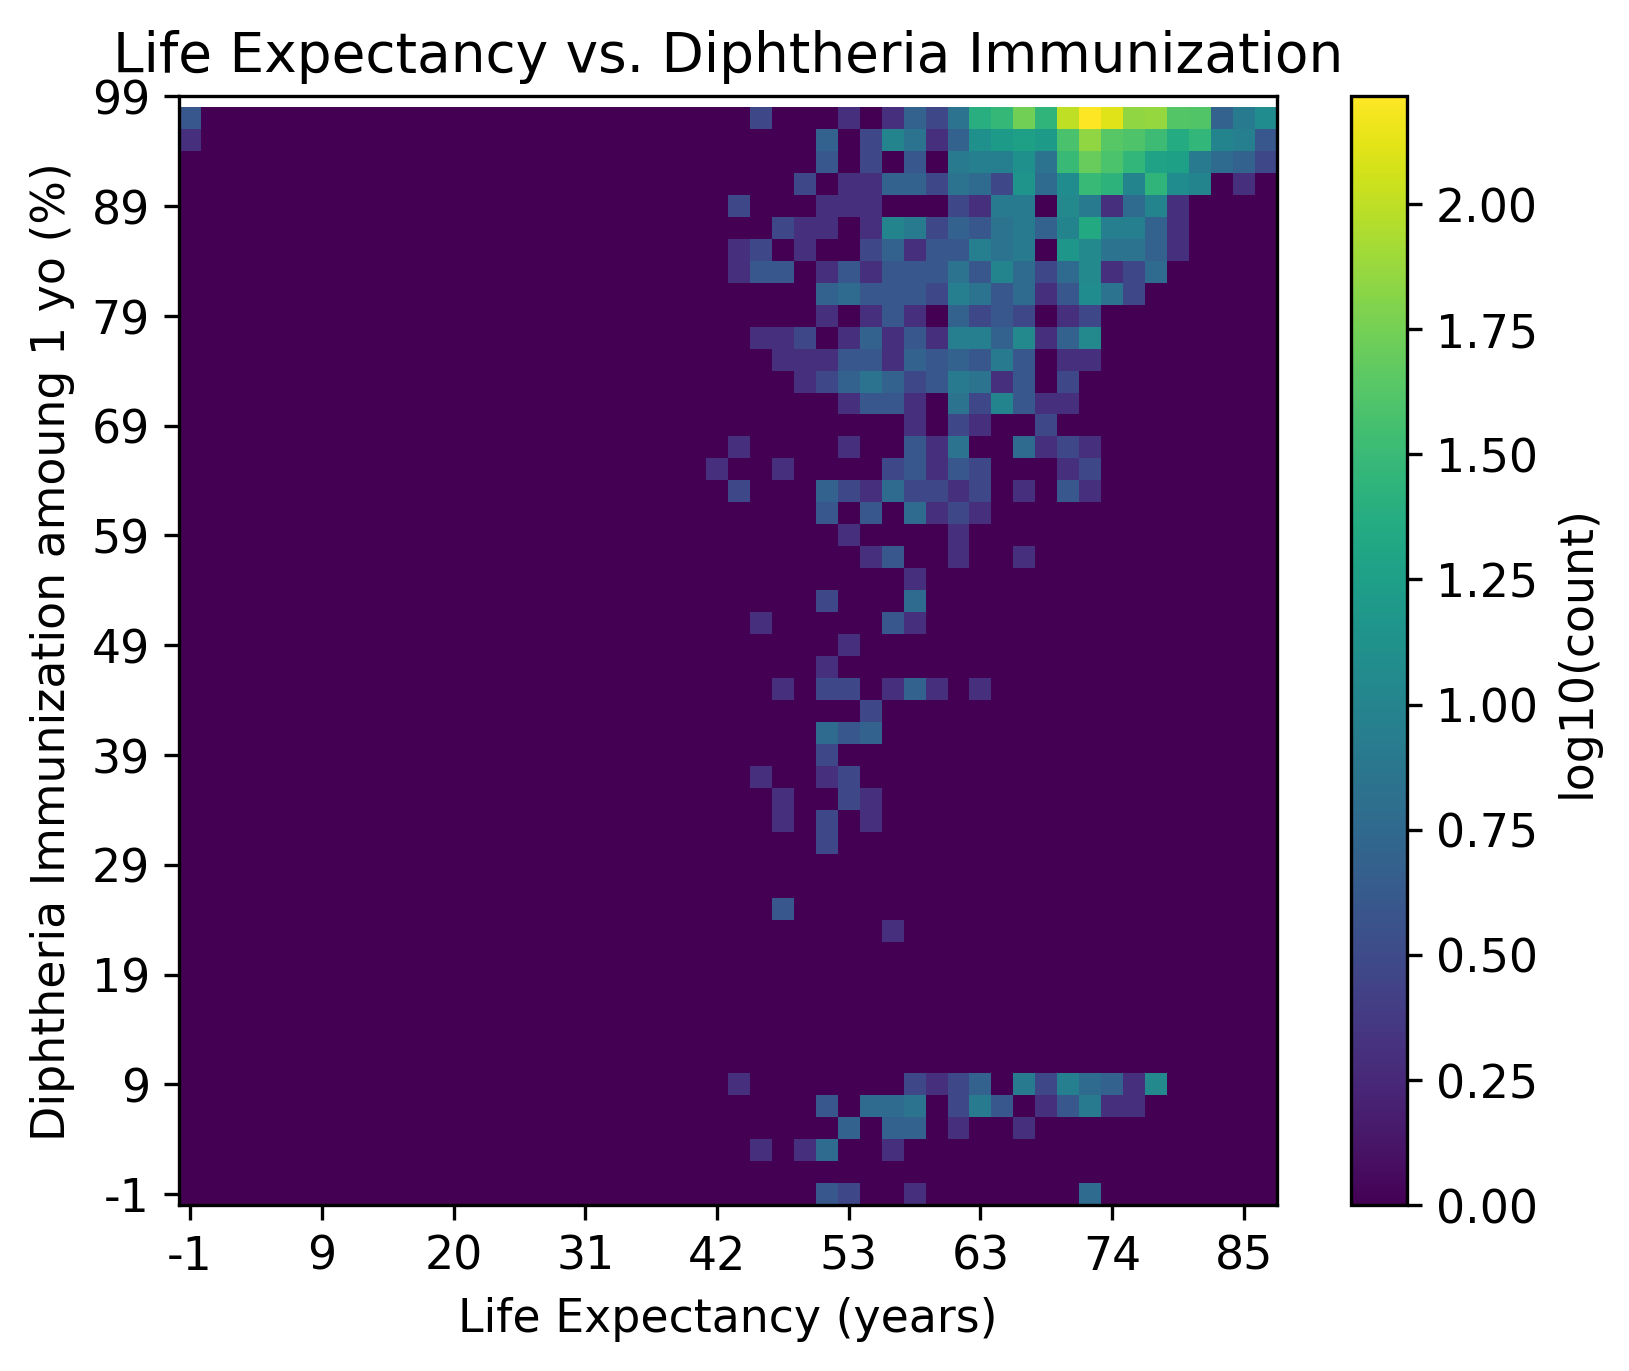

In [36]:
heatmap[heatmap == 0] = 0.1
plt.imshow(np.log10(heatmap).T, origin='lower',vmin=0)
#setting the graph, x-axis, and y-axis title 
plt.rcParams['figure.dpi']=300
plt.title('Life Expectancy vs. Diphtheria Immunization')
plt.xlabel('Life Expectancy (years)')
plt.ylabel('Diphtheria Immunization amoung 1 yo (%)')
plt.xticks(np.arange(nbins+1)[::6],xedges[::6].astype(int))
plt.yticks(np.arange(nbins+1)[::5],yedges[::5].astype(int))
plt.colorbar(label='log10(count)')
plt.savefig('figures/Diptheria_LE_heatmap.png')
plt.rcParams.update({'font.size': 11})
plt.show()

In [37]:
#initializing nbins
nbins = 50
heatmap, xedges, yedges = np.histogram2d(df['Life expectancy '], df[' HIV/AIDS'],bins=nbins)
extent = [xedges[0], xedges[0], yedges[0], yedges[0]]

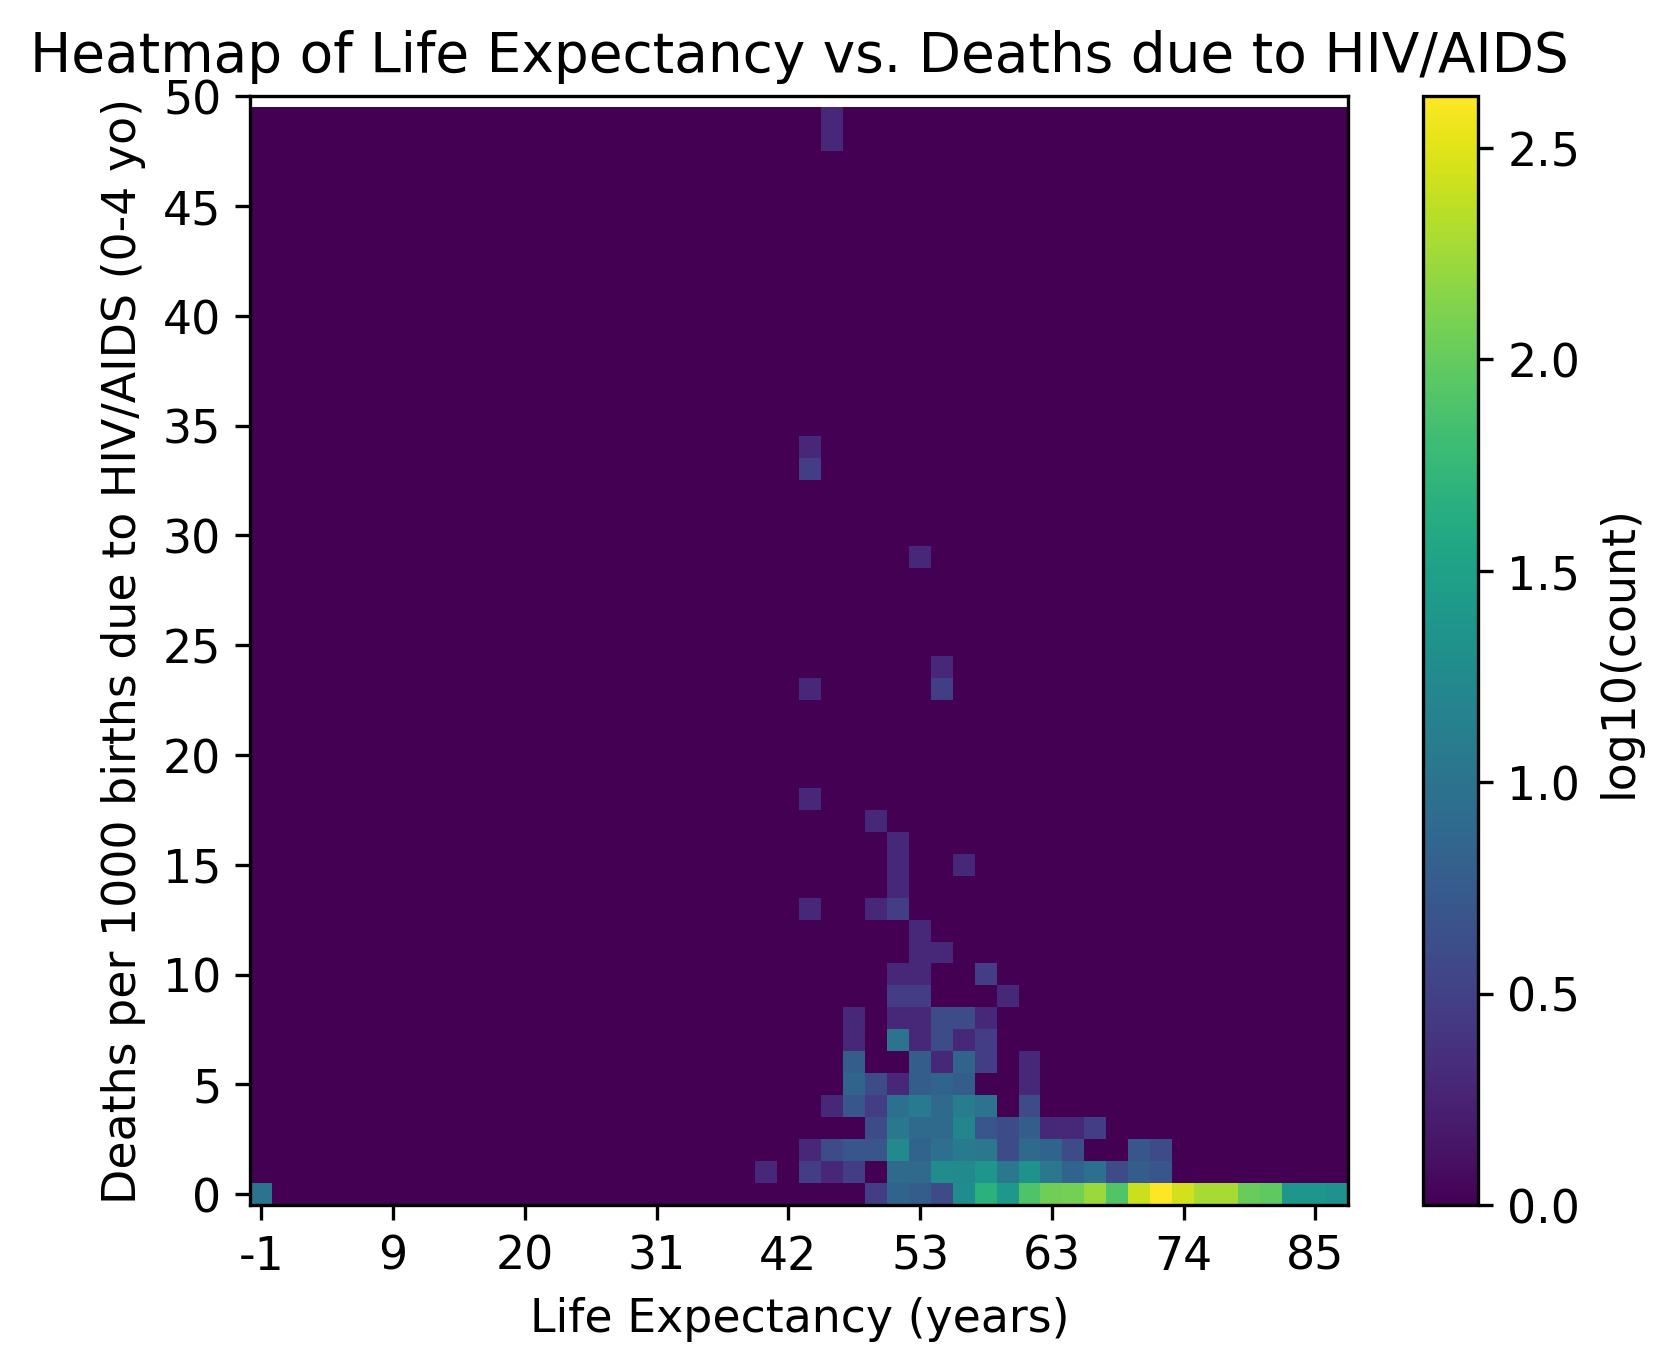

In [38]:
heatmap[heatmap == 0] = 0.1
plt.imshow(np.log10(heatmap).T, origin='lower',vmin=0)
#setting the graph, x-axis, and y-axis title 
plt.rcParams['figure.dpi']=300
plt.title('Heatmap of Life Expectancy vs. Deaths due to HIV/AIDS')
plt.xlabel('Life Expectancy (years)')
plt.ylabel('Deaths per 1000 births due to HIV/AIDS (0-4 yo)')
plt.xticks(np.arange(nbins+1)[::6],xedges[::6].astype(int))
plt.yticks(np.arange(nbins+1)[::5],yedges[::5].astype(int))
plt.colorbar(label='log10(count)')
plt.savefig('figures/HIV_Aids_LE_heatmap.png')
plt.show()

In [39]:
#initializing nbins
nbins = 50
heatmap, xedges, yedges = np.histogram2d(df['Life expectancy '], df['GDP'],bins=nbins)
extent = [xedges[0], xedges[0], yedges[0], yedges[0]]

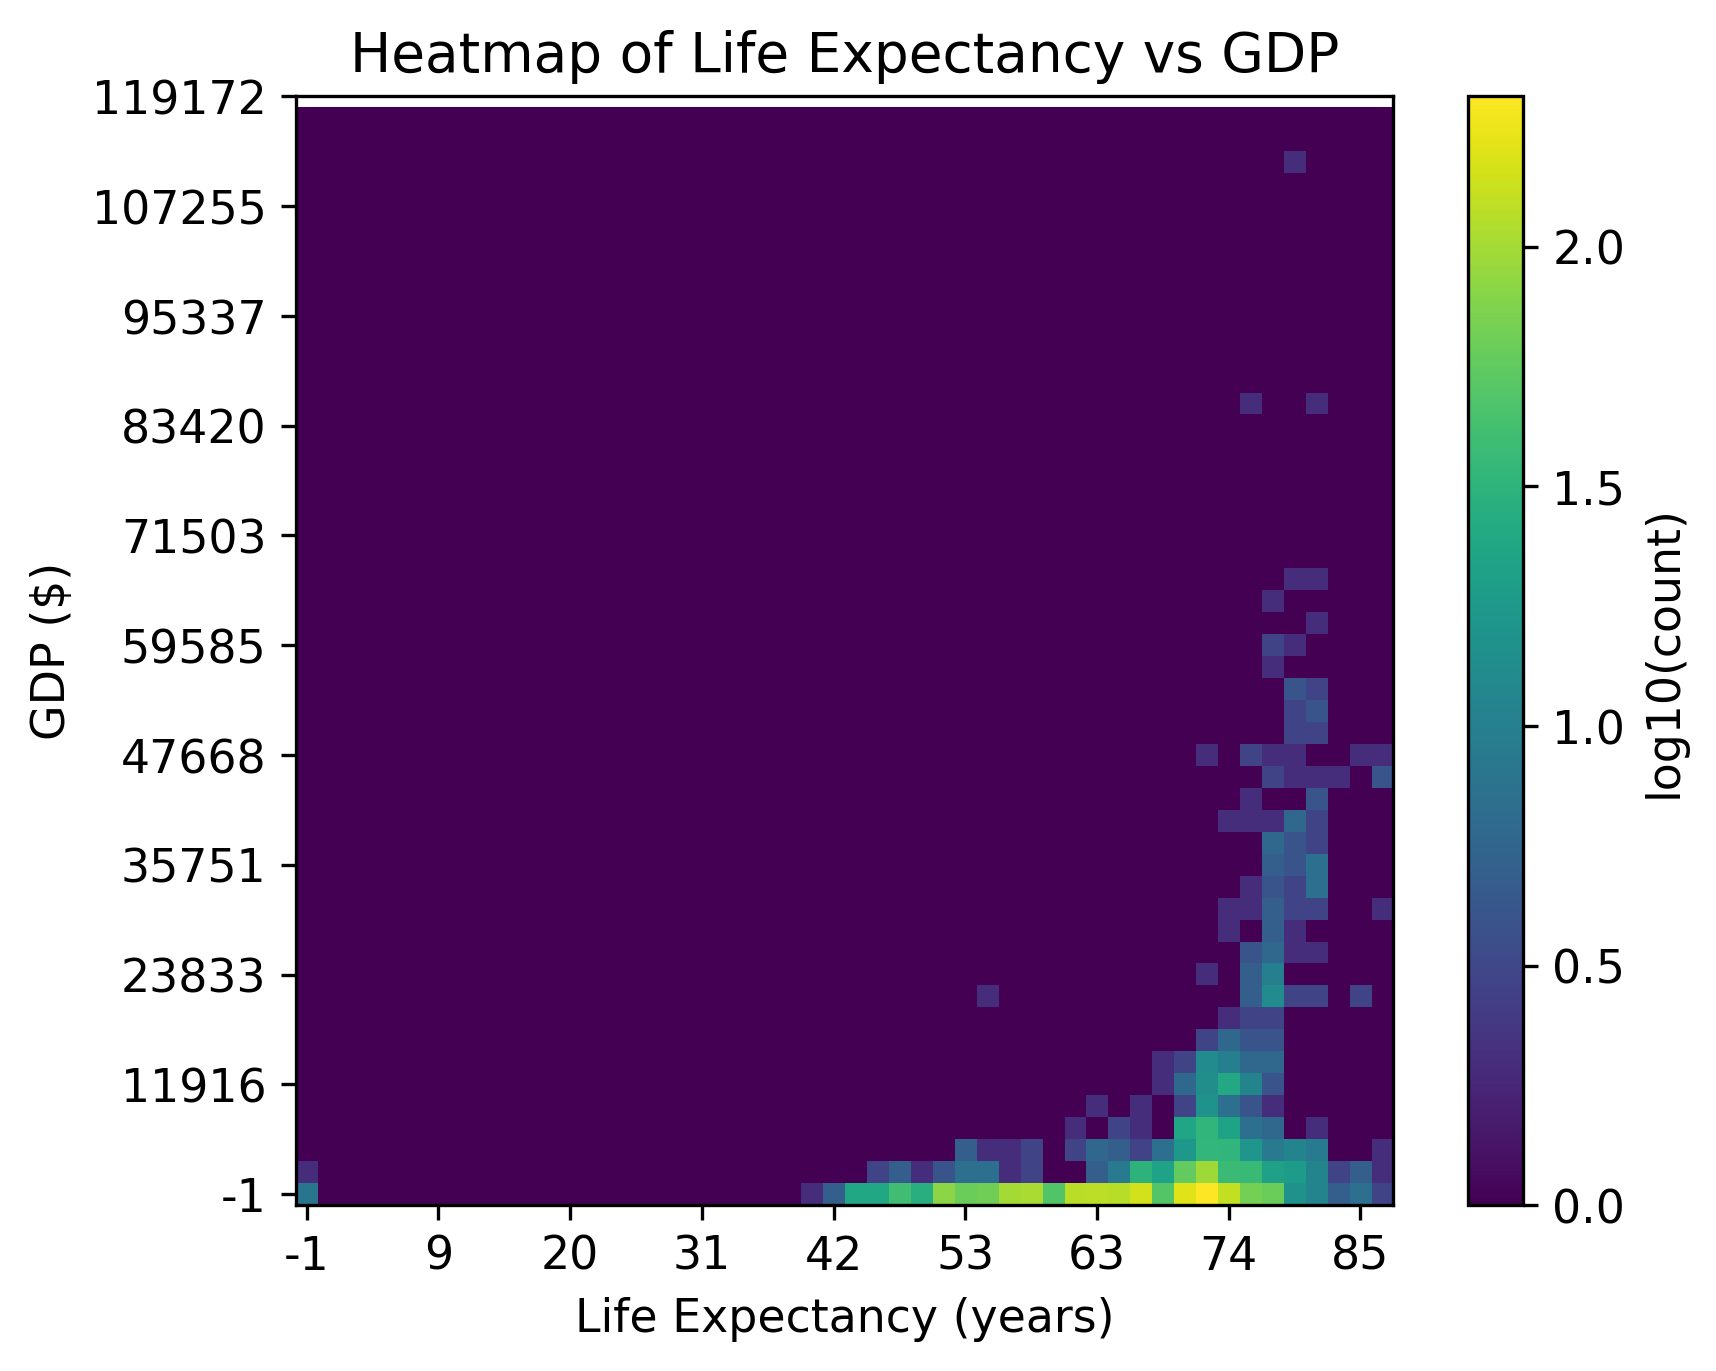

In [40]:
heatmap[heatmap == 0] = 0.1
plt.imshow(np.log10(heatmap).T, origin='lower',vmin=0)
#setting the graph, x-axis, and y-axis title 
plt.rcParams['figure.dpi']=300
plt.title('Heatmap of Life Expectancy vs GDP')
plt.xlabel('Life Expectancy (years)')
plt.ylabel('GDP ($)')
plt.xticks(np.arange(nbins+1)[::6],xedges[::6].astype(int))
plt.yticks(np.arange(nbins+1)[::5],yedges[::5].astype(int))
plt.colorbar(label='log10(count)')
plt.savefig('figures/GDP_LE_heatmap.png')
plt.show()

In [41]:
#initializing nbins
nbins = 50
heatmap, xedges, yedges = np.histogram2d(df['Life expectancy '], df[' thinness  1-19 years'],bins=nbins)
extent = [xedges[0], xedges[0], yedges[0], yedges[0]]

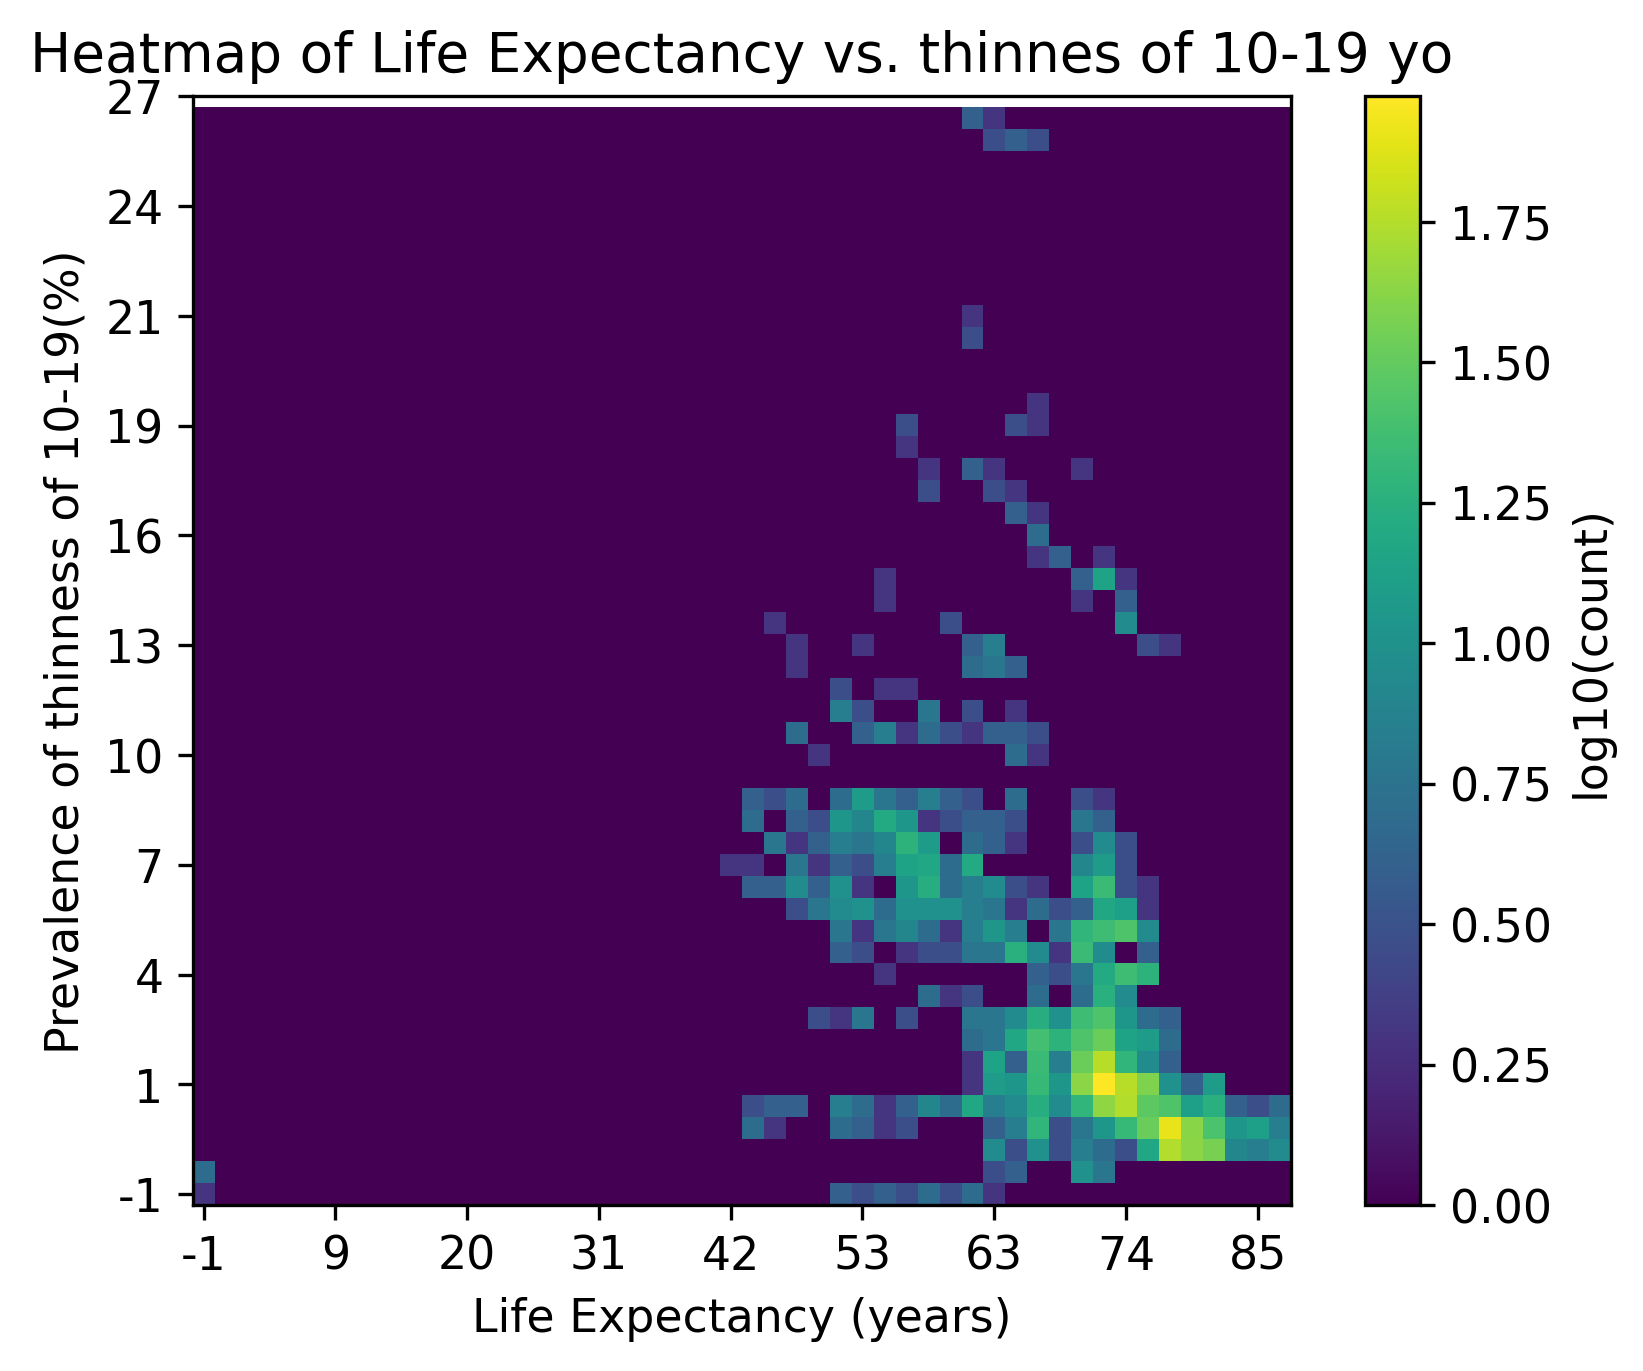

In [42]:
heatmap[heatmap == 0] = 0.1
plt.imshow(np.log10(heatmap).T, origin='lower',vmin=0)
#setting the graph, x-axis, and y-axis title 
plt.rcParams['figure.dpi']=300
plt.title('Heatmap of Life Expectancy vs. thinnes of 10-19 yo')
plt.xlabel('Life Expectancy (years)')
plt.ylabel('Prevalence of thinness of 10-19(%)')
plt.xticks(np.arange(nbins+1)[::6],xedges[::6].astype(int))
plt.yticks(np.arange(nbins+1)[::5],yedges[::5].astype(int))
plt.colorbar(label='log10(count)')
plt.savefig('figures/thin10_LE_heatmap.png')
plt.show()

In [43]:
#initializing nbins
nbins = 50
heatmap, xedges, yedges = np.histogram2d(df['Life expectancy '], df[' thinness 5-9 years'],bins=nbins)
extent = [xedges[0], xedges[0], yedges[0], yedges[0]]

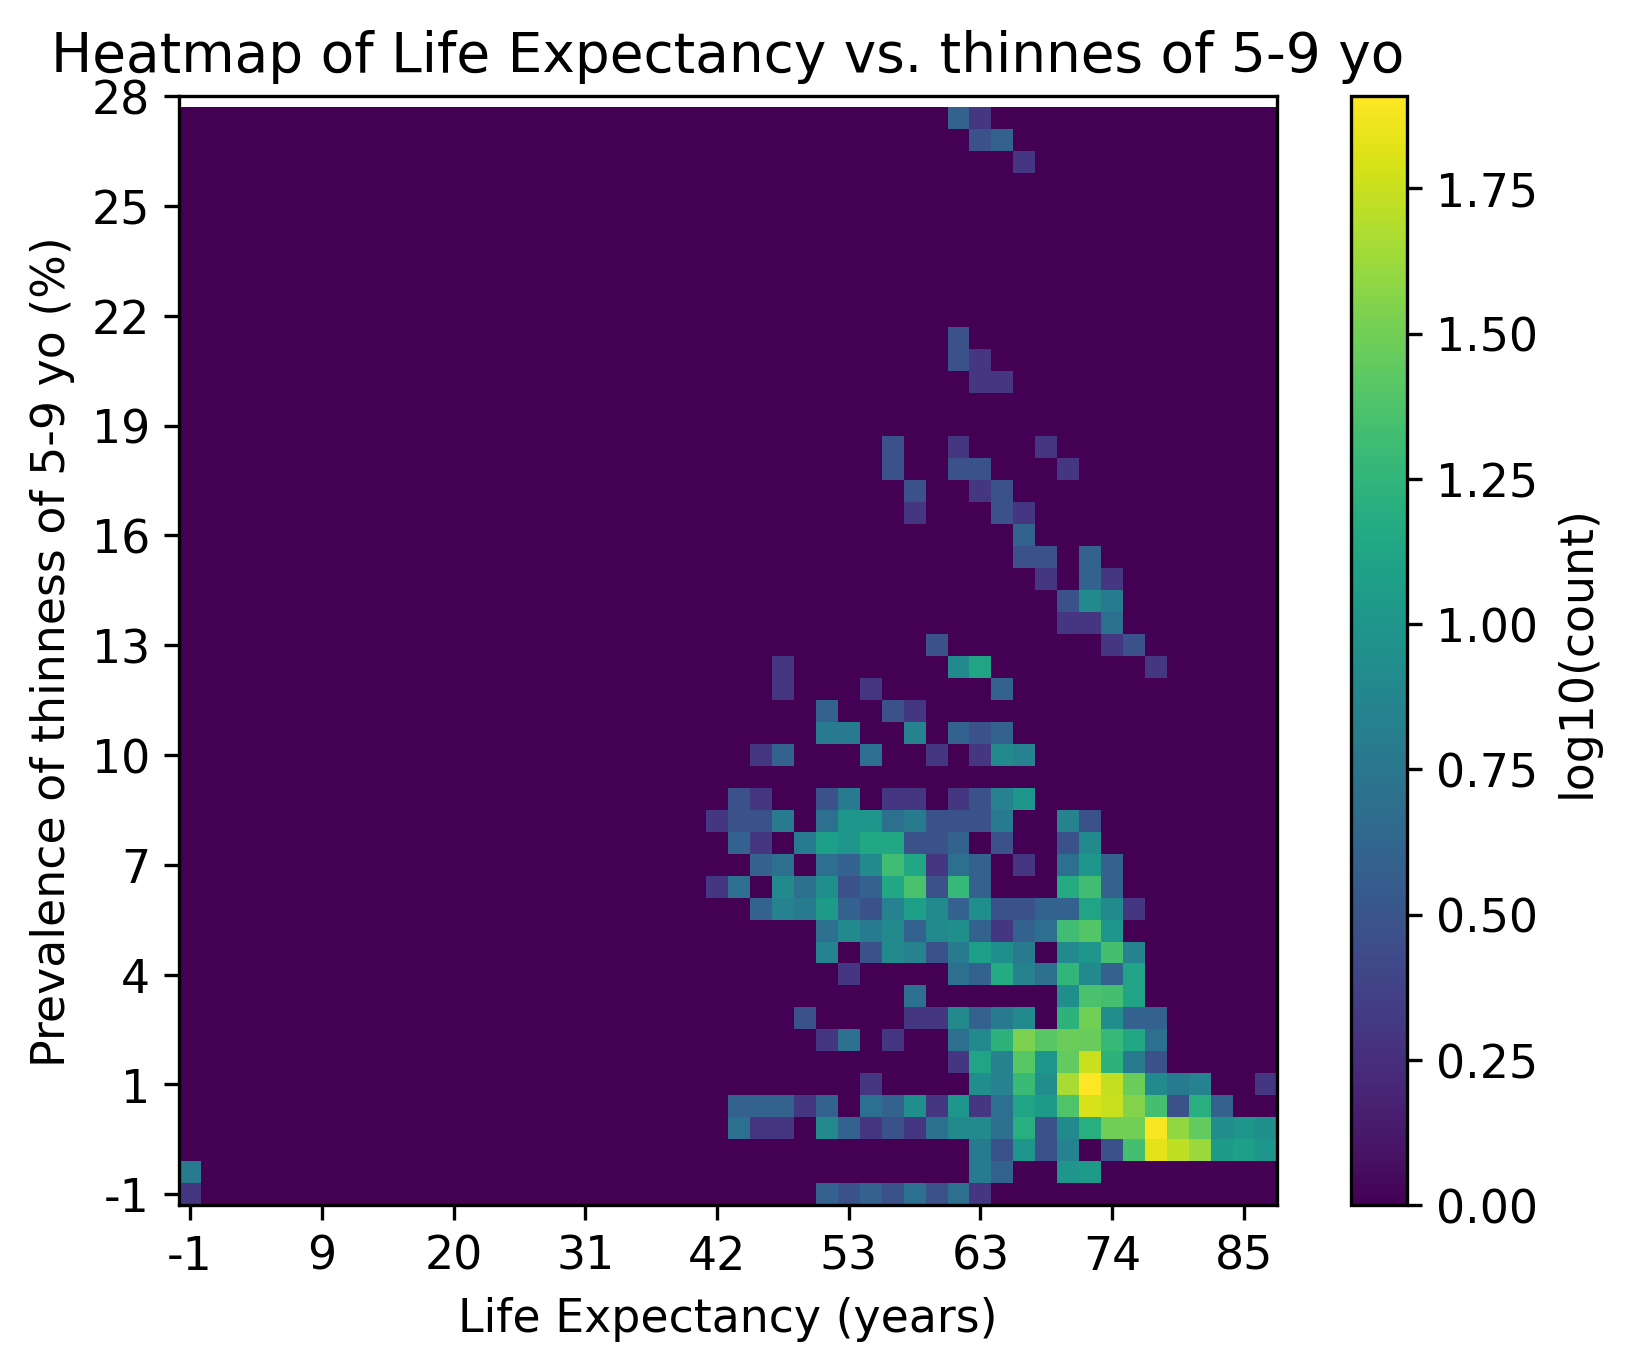

In [44]:
heatmap[heatmap == 0] = 0.1
plt.imshow(np.log10(heatmap).T, origin='lower',vmin=0)
#setting the graph, x-axis, and y-axis title 
plt.rcParams['figure.dpi']=300
plt.title('Heatmap of Life Expectancy vs. thinnes of 5-9 yo')
plt.xlabel('Life Expectancy (years)')
plt.ylabel('Prevalence of thinness of 5-9 yo (%)')
plt.xticks(np.arange(nbins+1)[::6],xedges[::6].astype(int))
plt.yticks(np.arange(nbins+1)[::5],yedges[::5].astype(int))
plt.colorbar(label='log10(count)')
plt.savefig('figures/thin5_LE_heatmap.png')
plt.show()

In [45]:
#initializing nbins
nbins = 50
heatmap, xedges, yedges = np.histogram2d(df['Life expectancy '], df['Schooling'],bins=nbins)
extent = [xedges[0], xedges[0], yedges[0], yedges[0]]

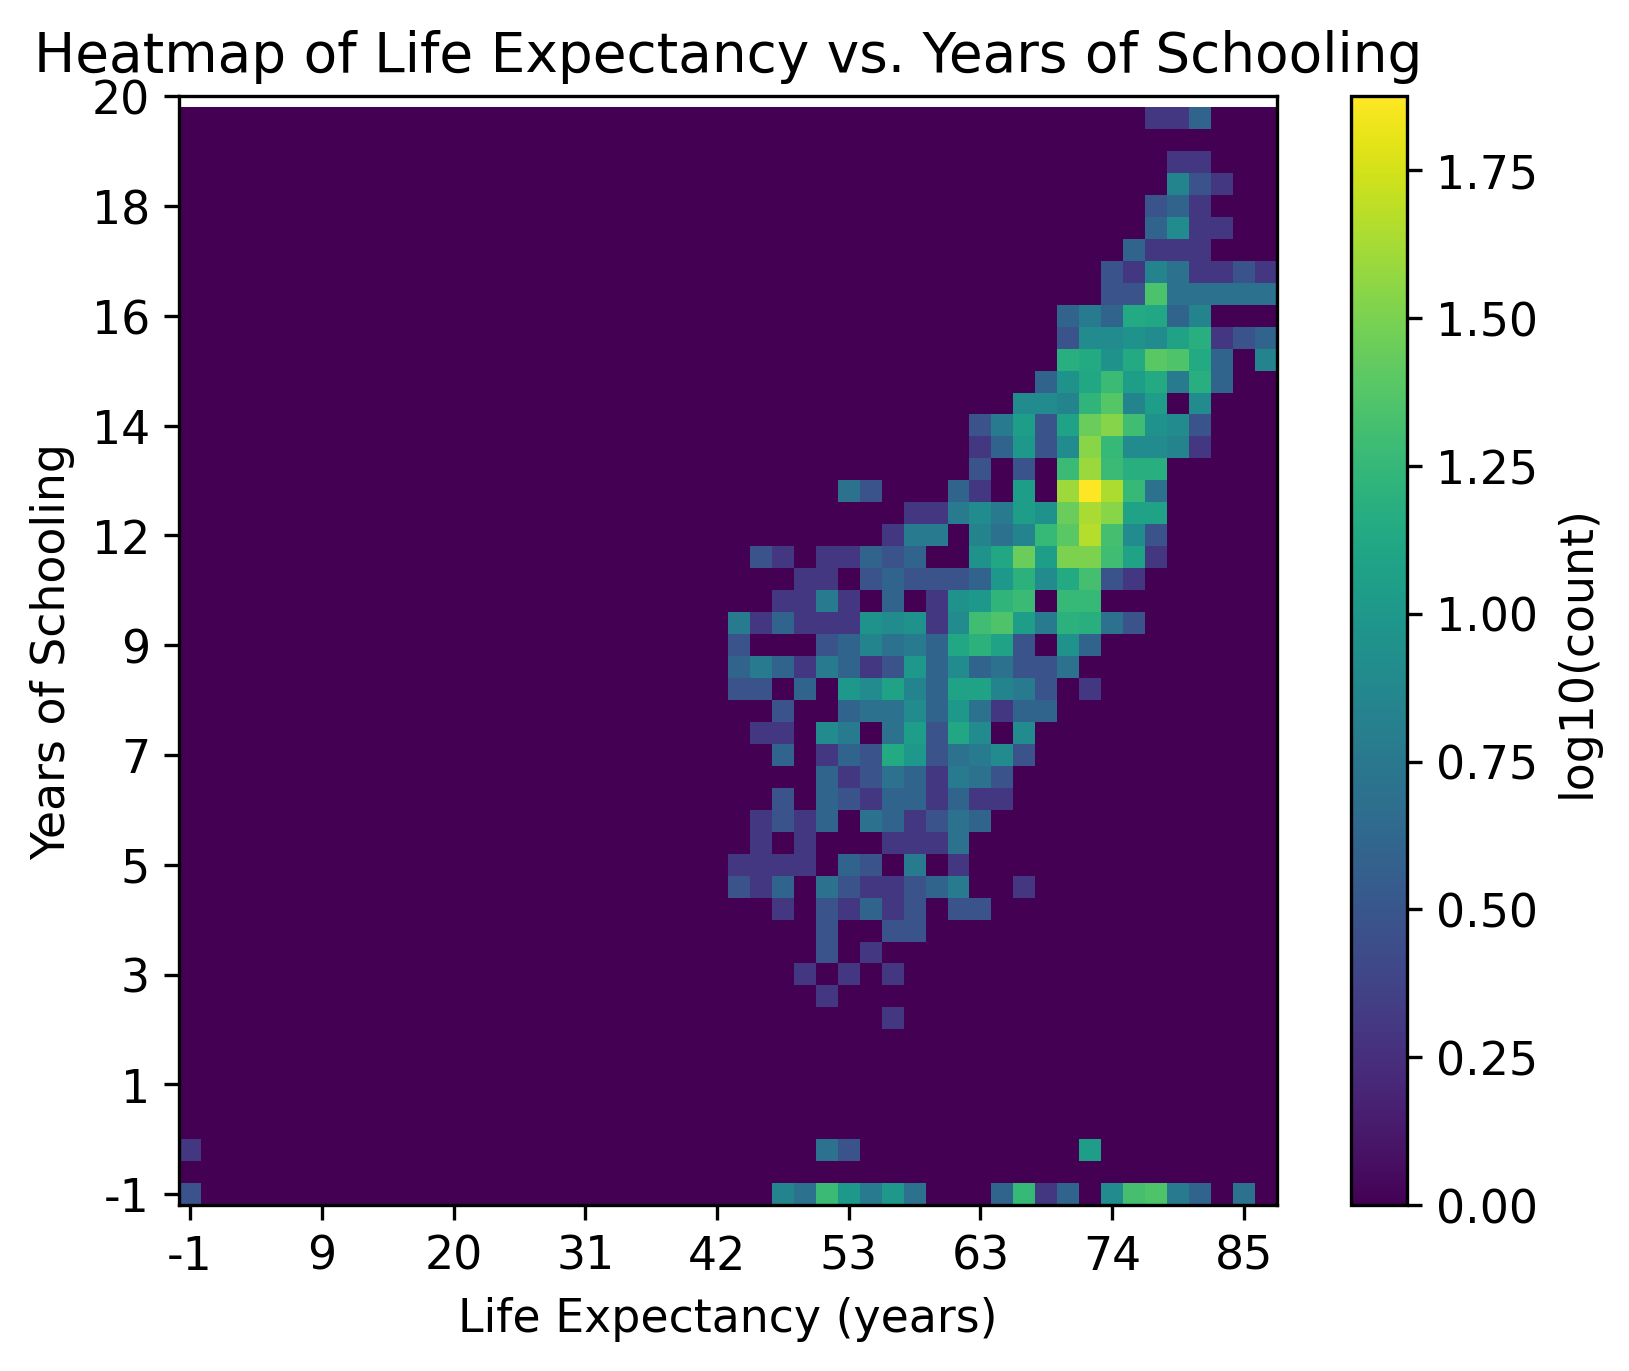

In [46]:
heatmap[heatmap == 0] = 0.1
plt.imshow(np.log10(heatmap).T, origin='lower',vmin=0)
#setting the graph, x-axis, and y-axis title 
plt.rcParams['figure.dpi']=300
plt.title('Heatmap of Life Expectancy vs. Years of Schooling')
plt.rcParams.update({'font.size': 11})
plt.xlabel('Life Expectancy (years)')
plt.ylabel('Years of Schooling')
plt.xticks(np.arange(nbins+1)[::6],xedges[::6].astype(int))
plt.yticks(np.arange(nbins+1)[::5],yedges[::5].astype(int))
plt.colorbar(label='log10(count)')
plt.savefig('figures/Schooling_LE_heatmap.png')
plt.show()

In [47]:
#replacing the -1 that were put in place for null values in the above code, back to null values to be able to run
#codes regarding null values
df= df.replace(-1, np.nan)

In [48]:
#dropping the 4 rows with null values in the target variable
df.dropna(subset=['Life expectancy '], inplace=True)

In [49]:
#calc fraction of missiong values in each feature
perc_missing_ftr = df.isnull().sum(axis=0)/df.shape[0]
print(perc_missing_ftr)
print('fraction of missing values in features:')
#finding which features have missing values
print(perc_missing_ftr[perc_missing_ftr > 0])

frac_missing = sum(df.isnull().sum(axis=1)!=0)/df.shape[0]
print('fraction of points with missing values:',frac_missing)

Country                            0.000000
Year                               0.000000
Status                             0.000000
Life expectancy                    0.000000
Adult Mortality                    0.000000
infant deaths                      0.000000
Alcohol                            0.065915
percentage expenditure             0.000000
Hepatitis B                        0.188866
Measles                            0.000000
 BMI                               0.010929
under-five deaths                  0.000000
Polio                              0.006489
Total expenditure                  0.077186
Diphtheria                         0.006489
 HIV/AIDS                          0.000000
GDP                                0.151298
Population                         0.219945
 thinness  1-19 years              0.010929
 thinness 5-9 years                0.010929
Income composition of resources    0.054645
Schooling                          0.054645
dtype: float64
fraction of missi

In [50]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler, LabelEncoder
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import mean_squared_error 
from sklearn.model_selection import GroupKFold
from sklearn.model_selection import GroupShuffleSplit
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

In [406]:
#seperating the feature matrix X and target variable y
y = df['Life expectancy ']
X = df.drop(columns=['Life expectancy '])
#setting the group variable to the Country feature in the dataframe
groups = df['Country']
ftr_names = X.columns

In [374]:
from sklearn.impute import SimpleImputer

#creating feature matrices
cat_ftrs = ['Country', 'Status']
minmax_ftrs = ['infant deaths', 'Alcohol', ' BMI ', 'Total expenditure', ' HIV/AIDS', ' thinness  1-19 years',
               ' thinness 5-9 years', 'Income composition of resources', 'Schooling']
std_ftrs = ['Adult Mortality', 'percentage expenditure', 'Hepatitis B', 'Measles ', 'under-five deaths ', 'Polio', 'Diphtheria ',
                   'GDP', 'Population']

# one-hot encoder
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(sparse_output=False,handle_unknown='ignore'))])

# standard scaler
ss_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

mm_transformer = Pipeline(steps=[
    ('minmax', MinMaxScaler())])

# collect the transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('std_saler', ss_transformer, std_ftrs),
        ('mm_scaler', mm_transformer, minmax_ftrs),
        ('cat', categorical_transformer, cat_ftrs)])

In [377]:
#creating functions and pipeline for the ML Algorithms that must be completed using reduced features method
from sklearn.model_selection import ParameterGrid

def ML_model(X_train, y_train, X_val, y_val, X_test, y_test, model, verbose=1):
    
    #make into row vectors
    y_train = np.reshape(np.array(y_train), (1, -1)).ravel()
    y_val = np.reshape(np.array(y_val), (1, -1)).ravel()
    y_test = np.reshape(np.array(y_test), (1, -1)).ravel()

    #creating parameter grid
    pg = ParameterGrid(param_grid)

    #intializing list for scores
    scores = np.zeros(len(pg))

    #looping through all parameter combinations in pg
    for i in range(len(pg)):
        params = pg[i]
        model.set_params(**params)
        eval_set = [(X_val, y_val)]
        model.fit(X_train, y_train)
        y_val_pred = model.predict(X_val)
        scores[i] = mean_squared_error(y_val,y_val_pred)

    #finding the best parameter that results in the lowest RMSE score
    best_params = np.array(pg)[scores == np.min(scores)]

    #testing model on the test set with best parameter set from above
    model.set_params(**best_params[0])
    model.fit(X_train,y_train)
    y_test_pred = model.predict(X_test)

    return np.sqrt(mean_squared_error(y_test,y_test_pred)), y_test_pred, best_params

def reduced_feature(X_train, y_train, X_val, y_val, X_test, y_test, model, param_grid):

    #find all unique patterns of missing value in test set
    mask = X_test.isnull()
    unique_rows = np.array(np.unique(mask, axis=0))
    all_y_test_pred = pd.DataFrame()

    #initializing lists for train, test, and val scores
    test_scores = np.zeros(len(unique_rows))
    train_scores = np.zeros(len(unique_rows))
    val_scores = np.zeros(len(unique_rows))
    
    #dividing test sets into subgroups according to the unique patterns
    for i in range(len(unique_rows)):
        
        #generating X_test subset that matches the unique pattern i
        sub_X_test = pd.DataFrame()
        sub_y_test = pd.Series(dtype=float)
        
        #checking each row in mask
        for j in range(len(mask)): 
            row_mask = np.array(mask.iloc[j])
            
            #if the pattern matches the ith unique pattern
            if np.array_equal(row_mask, unique_rows[i]): 

                #append the according X_test row j to the subset
                sub_X_test = pd.concat([sub_X_test,X_test.iloc[[j]]])
                
                #append the according y_test row j
                sub_y_test = pd.concat([sub_y_test, y_test.iloc[[j]]])

        sub_X_test = sub_X_test[X_test.columns[~unique_rows[i]]]
        
        #choose the reduced features for subgroups
        sub_X_train = pd.DataFrame()
        sub_y_train = pd.DataFrame()
        sub_X_val = pd.DataFrame()
        sub_y_val = pd.DataFrame()
        
        #cutting feature columns that have nans in the sub_X_test
        sub_X_train = X_train[X_train.columns[~unique_rows[i]]]
        sub_X_val = X_val[X_val.columns[~unique_rows[i]]]
        
        #cutting rows in the sub_X_train and sub_X_val that have nans
        sub_X_train = sub_X_train.dropna()
        sub_X_val = sub_X_val.dropna()
        
        #cutting the sub_Y_train and sub_y_val accordingly
        sub_y_train = y_train.iloc[sub_X_train.index]
        sub_y_val = y_val.iloc[sub_X_val.index]
        
        #running lasso model
        sub_y_test_pred = ML_model(sub_X_train, sub_y_train, sub_X_val, 
                                       sub_y_val, sub_X_test, sub_y_test, model, param_grid)
        sub_y_test_pred = pd.DataFrame(sub_y_test_pred[1],columns=['sub_y_test_pred'],
                                          index=sub_y_test.index)

        #running lasso model to return the rmse and best_parameters
        rmse, sub_y_test_pred2, best_params = ML_model(sub_X_train, sub_y_train, sub_X_val, 
                                              sub_y_val, sub_X_test, sub_y_test, model, param_grid)

        #returning test, train and val scores
        test_scores[i] = np.sqrt(mean_squared_error(sub_y_test,sub_y_test_pred))
        train_scores[i] = np.sqrt(mean_squared_error(sub_y_test,sub_y_test_pred))
        val_scores[i] = np.sqrt(mean_squared_error(sub_y_test,sub_y_test_pred))
        
        print('   RMSE:',test_scores[i])
        
        #collect the test predictions
        all_y_test_pred = pd.concat([all_y_test_pred, sub_y_test_pred])
        
    #rank the final y_test_pred according to original y_test index
    all_y_test_pred = all_y_test_pred.sort_index()
    y_test = y_test.sort_index()
               
    #return RMSE
    total_RMSE = np.sqrt(mean_squared_error(y_test,all_y_test_pred))
    std_RMSE = np.std(test_scores)
    
    return total_RMSE, std_RMSE, best_params, test_scores, train_scores, val_scores, X_test, y_test, all_y_test_pred, X_train, y_train

In [380]:
from  sklearn.linear_model import Lasso

nr_states = 5
lasso_RMSE_list = []
lasso_std_list = []
lasso_best_params_list = []

for i in range(nr_states):
    
    #initilizing Group Shuffle Split that will be passed to the dataframe
    splitter = GroupShuffleSplit(n_splits = 1, train_size=0.8,random_state=42*i)

    #using splitter (initialixed above) to split the indexes of the data frame into test and other 
    other_index, test_index = next(splitter.split(X,y,groups))

    #using indexes above to form X_test, y_test, X_other, y_other, and group_other
    X_test = X.iloc[test_index,]
    y_test = y.iloc[test_index,]
    X_other = X.iloc[other_index,]
    y_other = y.iloc[other_index,]
    groups_other = groups.iloc[other_index,]

    #initializing an instance of group kfold with four folds
    group_kfold = GroupKFold(n_splits = 4)

    #performing group kfold split to form X_train, y_train, X_val and y_val
    for train_index, val_index in group_kfold.split(X_other, y_other,groups_other): 
        X_train = X_other.iloc[train_index,]
        y_train = y_other.iloc[train_index,]
        X_val = X_other.iloc[val_index,]
        y_val = y_other.iloc[val_index,]
    
    #fit_transform the training set
    X_prep = preprocessor.fit_transform(X_train)
    
    #collect feature names
    feature_names = preprocessor.get_feature_names_out()

    df_train = pd.DataFrame(data=X_prep,columns=feature_names)

    # transform the validation set
    df_val = preprocessor.transform(X_val)
    df_val = pd.DataFrame(data=df_val,columns = feature_names)

    # transform the test
    df_test = preprocessor.transform(X_test)
    df_test = pd.DataFrame(data=df_test,columns = feature_names)

    param_grid = {'alpha': [1e-5, 1e-4, 1e-3, 1e-2, 1e-2, 1, 1e2, 1e3]}
    
    model = Lasso(max_iter=100000, random_state=42*i)

    l_RMSE, l_std, l_best_params, test_scores, train_scores, val_scores, X_test, y_test, y_test_pred, X_train, y_train = reduced_feature(df_train, y_train, df_val, y_val, df_test, y_test, model, param_grid)
    lasso_RMSE_list.append(l_RMSE)
    lasso_std_list.append(l_std)
    lasso_best_params_list.append(l_best_params)
    print('Final Random State RMSE:', l_RMSE)
    print('Standard Deviation: ', l_std)
    print('Best Parameters: ', l_best_params)

lasso_RMSE = np.mean(lasso_RMSE_list)
lasso_std = np.std(lasso_std_list)

print('Final Lasso RMSE: ', lasso_RMSE)
print('Final Lasso std: ', lasso_std)

   RMSE: 4.71503726097095
   RMSE: 4.032213305438653
   RMSE: 0.5210025247532997
   RMSE: 6.586457362668761
   RMSE: 2.485100050434996
   RMSE: 3.2351000241237844
   RMSE: 7.324171886416372
   RMSE: 1.8306228850673403
   RMSE: 6.365591658955385
   RMSE: 4.3843737091831425
   RMSE: 0.8073947616687018
   RMSE: 1.6800744766447337
   RMSE: 19.411370181848056
   RMSE: 2.037842605174781
   RMSE: 6.439380883318601
   RMSE: 8.007761995725312
   RMSE: 5.921553781292338
   RMSE: 4.533260331729493
Final Random State RMSE: 4.931915849022367
Standard Deviation:  4.136342825408236
Best Parameters:  [{'alpha': 0.01} {'alpha': 0.01}]
   RMSE: 3.75862157783118
   RMSE: 3.4698592956590195
   RMSE: 0.4293628617863732
   RMSE: 5.0075826301863655
   RMSE: 5.5538667721129
   RMSE: 3.4980846303592448
   RMSE: 4.58127210609967
   RMSE: 4.117187869807906
   RMSE: 0.15386579591971383
   RMSE: 7.437405851546049
   RMSE: 1.1863271148795427
   RMSE: 2.0924479534325187
   RMSE: 4.28639798608894
   RMSE: 10.43141890

In [381]:
import pickle
file = open('/Users/danarohde/Desktop/Data1030-LifeExpProject/results/lasso.pkl', 'wb')
pickle.dump((l_RMSE, l_std, l_best_params, test_scores, train_scores, val_scores, X_test, y_test, y_test_pred),file)
file.close

<function BufferedWriter.close>

In [382]:
with open('/Users/danarohde/Desktop/Data1030-LifeExpProject/results/lasso.pkl', 'rb') as file:
    loaded_data = pickle.load(file)

y_test = loaded_data[7]

In [383]:
#calculating baseline RMSE Score on test set
mean_y = np.mean(y_test)
mean_y_array = np.full_like(y_test, mean_y)

baseline_rmse = np.sqrt(mean_squared_error(y_test, mean_y_array))
print("Baseline RMSE Score: ", baseline_rmse)

Baseline RMSE Score:  9.39927286134876


In [385]:
from sklearn.svm import SVR

nr_states = 5
svr_RMSE_list = []
svr_std_list = []
svr_best_params_list = []

for i in range(nr_states):
    
    #initilizing Group Shuffle Split that will be passed to the dataframe
    splitter = GroupShuffleSplit(n_splits = 1, train_size=0.8,random_state=42*i)

    #using splitter (initialixed above) to split the indexes of the data frame into test and other 
    other_index, test_index = next(splitter.split(X,y,groups))

    #using indexes above to form X_test, y_test, X_other, y_other, and group_other
    X_test = X.iloc[test_index,]
    y_test = y.iloc[test_index,]
    X_other = X.iloc[other_index,]
    y_other = y.iloc[other_index,]
    groups_other = groups.iloc[other_index,]

    #initializing an instance of group kfold with four folds
    group_kfold = GroupKFold(n_splits = 4)

    #performing group kfold split to form X_train, y_train, X_val and y_val
    for train_index, val_index in group_kfold.split(X_other, y_other,groups_other): 
        X_train = X_other.iloc[train_index,]
        y_train = y_other.iloc[train_index,]
        X_val = X_other.iloc[val_index,]
        y_val = y_other.iloc[val_index,]
    
    #fit_transform the training set
    X_prep = preprocessor.fit_transform(X_train)
    
    #collect feature names
    feature_names = preprocessor.get_feature_names_out()

    df_train = pd.DataFrame(data=X_prep,columns=feature_names)

    # transform the validation set
    df_val = preprocessor.transform(X_val)
    df_val = pd.DataFrame(data=df_val,columns = feature_names)

    # transform the test
    df_test = preprocessor.transform(X_test)
    df_test = pd.DataFrame(data=df_test,columns = feature_names)

    model = SVR()

    param_grid = {'gamma': [0.1, 1, 10, 50, 75, 100],
                  'C': [0.1, 0.5, 1, 5, 10]}

    svr_RMSE, svr_std, svr_best_params, test_scores, train_scores, val_scores, X_test, y_test, y_test_pred, X_train, y_train  = reduced_feature(df_train, y_train, df_val, y_val, df_test, y_test, model, param_grid)
    svr_RMSE_list.append(svr_RMSE)
    svr_std_list.append(svr_std)
    svr_best_params_list.append(svr_best_params)
    print('Final Random State RMSE:', svr_RMSE)
    print('Standard Deviation: ', svr_std)
    print('Best Parameters: ', svr_best_params)

svr_RMSE = np.mean(svr_RMSE_list)
svr_std = np.std(svr_std_list)

print('Final SVR RMSE: ', svr_RMSE)
print('Final SVR std: ', svr_std)

   RMSE: 5.3188558969396125
   RMSE: 3.878235705421523
   RMSE: 2.890511371955533
   RMSE: 3.8123130339601965
   RMSE: 2.1218585489290627
   RMSE: 3.3159501312611854
   RMSE: 7.428819650928499
   RMSE: 2.386152063654479
   RMSE: 6.062621764914068
   RMSE: 8.473397802007868
   RMSE: 2.1854085066054796
   RMSE: 1.4300102285022547
   RMSE: 8.72469504240756
   RMSE: 3.3628975814567
   RMSE: 3.2171564287509855
   RMSE: 12.936858597556988
   RMSE: 3.72639796536173
   RMSE: 3.5232209757017454
Final Random State RMSE: 5.538352162798707
Standard Deviation:  2.886326119507637
Best Parameters:  [{'C': 10, 'gamma': 0.1}]
   RMSE: 4.0768223252192355
   RMSE: 2.537663887082527
   RMSE: 1.2959266914635634
   RMSE: 4.434909106726576
   RMSE: 3.869178647728492
   RMSE: 3.5500511469598592
   RMSE: 1.17631678614824
   RMSE: 3.1627591170932683
   RMSE: 0.19919045502338406
   RMSE: 5.295719367915495
   RMSE: 0.596766153302847
   RMSE: 0.30072674003859134
   RMSE: 2.811733083628576
   RMSE: 5.46541517464454

In [386]:
import pickle
file = open('/Users/danarohde/Desktop/Data1030-LifeExpProject/results/svr.pkl', 'wb')
pickle.dump((l_RMSE, l_std, l_best_params, test_scores, train_scores, val_scores, X_test, y_test, y_test_pred, X_train, y_train),file)
file.close

<function BufferedWriter.close>

In [387]:
from sklearn.neighbors import KNeighborsRegressor

nr_states = 5
knr_RMSE_list = []
knr_std_list = []
knr_best_params_list = []

for i in range(nr_states):
    
    #initilizing Group Shuffle Split that will be passed to the dataframe
    splitter = GroupShuffleSplit(n_splits = 1, train_size=0.8,random_state=42*i)

    #using splitter (initialixed above) to split the indexes of the data frame into test and other 
    other_index, test_index = next(splitter.split(X,y,groups))

    #using indexes above to form X_test, y_test, X_other, y_other, and group_other
    X_test = X.iloc[test_index,]
    y_test = y.iloc[test_index,]
    X_other = X.iloc[other_index,]
    y_other = y.iloc[other_index,]
    groups_other = groups.iloc[other_index,]

    #initializing an instance of group kfold with four folds
    group_kfold = GroupKFold(n_splits = 4)

    #performing group kfold split to form X_train, y_train, X_val and y_val
    for train_index, val_index in group_kfold.split(X_other, y_other,groups_other): 
        X_train = X_other.iloc[train_index,]
        y_train = y_other.iloc[train_index,]
        X_val = X_other.iloc[val_index,]
        y_val = y_other.iloc[val_index,]
    
    #fit_transform the training set
    X_prep = preprocessor.fit_transform(X_train)
    
    #collect feature names
    feature_names = preprocessor.get_feature_names_out()

    df_train = pd.DataFrame(data=X_prep,columns=feature_names)

    # transform the validation set
    df_val = preprocessor.transform(X_val)
    df_val = pd.DataFrame(data=df_val,columns = feature_names)

    # transform the test
    df_test = preprocessor.transform(X_test)
    df_test = pd.DataFrame(data=df_test,columns = feature_names)

    model = KNeighborsRegressor()

    param_grid = {'n_neighbors': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]}

    knr_RMSE, knr_std, knr_best_params, test_scores, train_scores, val_scores, X_test, y_test, all_y_test_pred, X_train, y_train = reduced_feature(df_train, y_train, df_val, y_val, df_test, y_test, model, param_grid)
    knr_RMSE_list.append(knr_RMSE)
    knr_std_list.append(knr_std)
    knr_best_params_list.append(knr_best_params)
    print('Final Random State RMSE:', knr_RMSE)
    print('Standard Deviation: ', knr_std)
    print('Best Parameters: ', knr_best_params)

knr_RMSE = np.mean(knr_RMSE_list)
knr_std = np.std(knr_std_list)

print('Final KNR RMSE: ', knr_RMSE)
print('Final KNR std: ', knr_std)

   RMSE: 5.508675722711684
   RMSE: 3.919658370206568
   RMSE: 5.174999999999997
   RMSE: 1.9508089316498636
   RMSE: 2.0429880077964238
   RMSE: 4.091680521472309
   RMSE: 7.967700638968698
   RMSE: 2.370031645358348
   RMSE: 6.946835144043548
   RMSE: 8.682000386744889
   RMSE: 2.2164578013544878
   RMSE: 1.0749999999999957
   RMSE: 1.2000000000000028
   RMSE: 0.03750000000000142
   RMSE: 2.167894283631007
   RMSE: 12.455343147286902
   RMSE: 2.482083951187136
   RMSE: 3.3670585580493464
Final Random State RMSE: 5.686888945953962
Standard Deviation:  3.103624859483268
Best Parameters:  [{'n_neighbors': 3}]
   RMSE: 4.50940335720734
   RMSE: 3.020208129062823
   RMSE: 4.375
   RMSE: 4.72908656510533
   RMSE: 4.840734469487212
   RMSE: 3.4919830057576164
   RMSE: 2.1202704721332166
   RMSE: 3.6107890000382463
   RMSE: 0.6142857142856997
   RMSE: 6.011955681066787
   RMSE: 1.510890173257562
   RMSE: 2.183333333333337
   RMSE: 0.9124515884333637
   RMSE: 7.9988165510738485
   RMSE: 1.849

In [348]:
import pickle
file = open('/Users/danarohde/Desktop/Data1030-LifeExpProject/results/knr.pkl', 'wb')
pickle.dump((l_RMSE, l_std, l_best_params, test_scores, train_scores, val_scores, X_test, y_test, y_test_pred, X_train, y_train),file)
file.close

<function BufferedWriter.close>

In [393]:
def MLpipe_KFold_RMSE(X, y, preprocessor, ML_algo, param_grid):


    nr_states = 5
    
    test_scores = np.zeros(nr_states)
    best_params = []
    final_models = []
    

    for i in range(nr_states):
        #initial split to seperate the test set
        splitter = GroupShuffleSplit(n_splits = 1, train_size=0.8,random_state=42*i)

        #using splitter (initialixed above) to split the indexes of the data frame into test and other 
        other_index, test_index = next(splitter.split(X,y,groups))

        #using indexes above to form X_test, y_test, X_other, y_other, and group_other
        X_test = X.iloc[test_index,]
        y_test = y.iloc[test_index,]
        X_other = X.iloc[other_index,]
        y_other = y.iloc[other_index,]
        groups_other = groups.iloc[other_index,]
        
        #initializing the splitter for other two sets
        kf = GroupKFold(n_splits=4)

        #putting together the pipeline
        pipe = make_pipeline(preprocessor,clf)

        grid = GridSearchCV(pipe, param_grid=param_grid, scoring='neg_mean_squared_error',cv=kf,return_train_score=True, n_jobs=-1, 
                            verbose = True)

        model = grid.fit(X_other, y_other, groups = groups_other)

        #saving the results 
        results = pd.DataFrame(grid.cv_results_)

        print('best model parameters:',grid.best_params_)
        print('validation score:',grid.best_score_)

        final_models.append(grid)

        y_test_pred = final_models[-1].predict(X_test)
    
        #lists to be returned 
        test_scores[i] = np.sqrt(mean_squared_error(y_test,y_test_pred))
        
        print('test score: ', test_scores[i])

    feature_names = grid.best_estimator_[0].get_feature_names_out()
  
    return grid, np.array(feature_names), test_scores, X_test, y_test, y_test_pred, model, results

In [394]:
import xgboost
from xgboost import XGBRegressor

##running the XGBoost model with an importance type of Weight

#setting the parameters for XGBoost
param_grid = {"xgbregressor__n_estimators": [10000],
              "xgbregressor__max_depth": [1,3,10,30,100,300,1000,10000,100000],             
} 

#initializing instance of XGBoost ML Algorithm to be passed to MLpipe_kFold_RMSE
clf = XGBRegressor(importance_type = 'weight')

#calling MLpipe_kFold_RMSE function
grid, feature_names, test_scores, X_test, y_test, y_test_pred, model, results = MLpipe_KFold_RMSE(X=X, y=y, preprocessor=preprocessor, 
                                                                                                            ML_algo=clf, 
                                                                                                            param_grid=param_grid)
XGB_mean_test_score =  np.mean(test_scores)
XGB_std = np.std(test_scores)

print("Mean of the Test Score: ", XGB_mean_test_score)
print("Standard Deviation of the Test Score: ", XGB_std)

Fitting 4 folds for each of 9 candidates, totalling 36 fits
best model parameters: {'xgbregressor__max_depth': 3, 'xgbregressor__n_estimators': 10000}
validation score: -10.048811290377529
test score:  3.29241251872877
Fitting 4 folds for each of 9 candidates, totalling 36 fits
best model parameters: {'xgbregressor__max_depth': 3, 'xgbregressor__n_estimators': 10000}
validation score: -10.983887359522548
test score:  2.9778958011309227
Fitting 4 folds for each of 9 candidates, totalling 36 fits
best model parameters: {'xgbregressor__max_depth': 10, 'xgbregressor__n_estimators': 10000}
validation score: -10.289597359944342
test score:  2.894882163994221
Fitting 4 folds for each of 9 candidates, totalling 36 fits
best model parameters: {'xgbregressor__max_depth': 3, 'xgbregressor__n_estimators': 10000}
validation score: -8.938128522988276
test score:  3.3425880294194092
Fitting 4 folds for each of 9 candidates, totalling 36 fits
best model parameters: {'xgbregressor__max_depth': 3, 'xgbr

In [395]:
import pickle
file = open('/Users/danarohde/Desktop/Data1030-LifeExpProject/results/xgb.pkl', 'wb')
pickle.dump((grid, feature_names, test_scores, X_test, y_test, y_test_pred, model, results),file)
file.close

<function BufferedWriter.close>

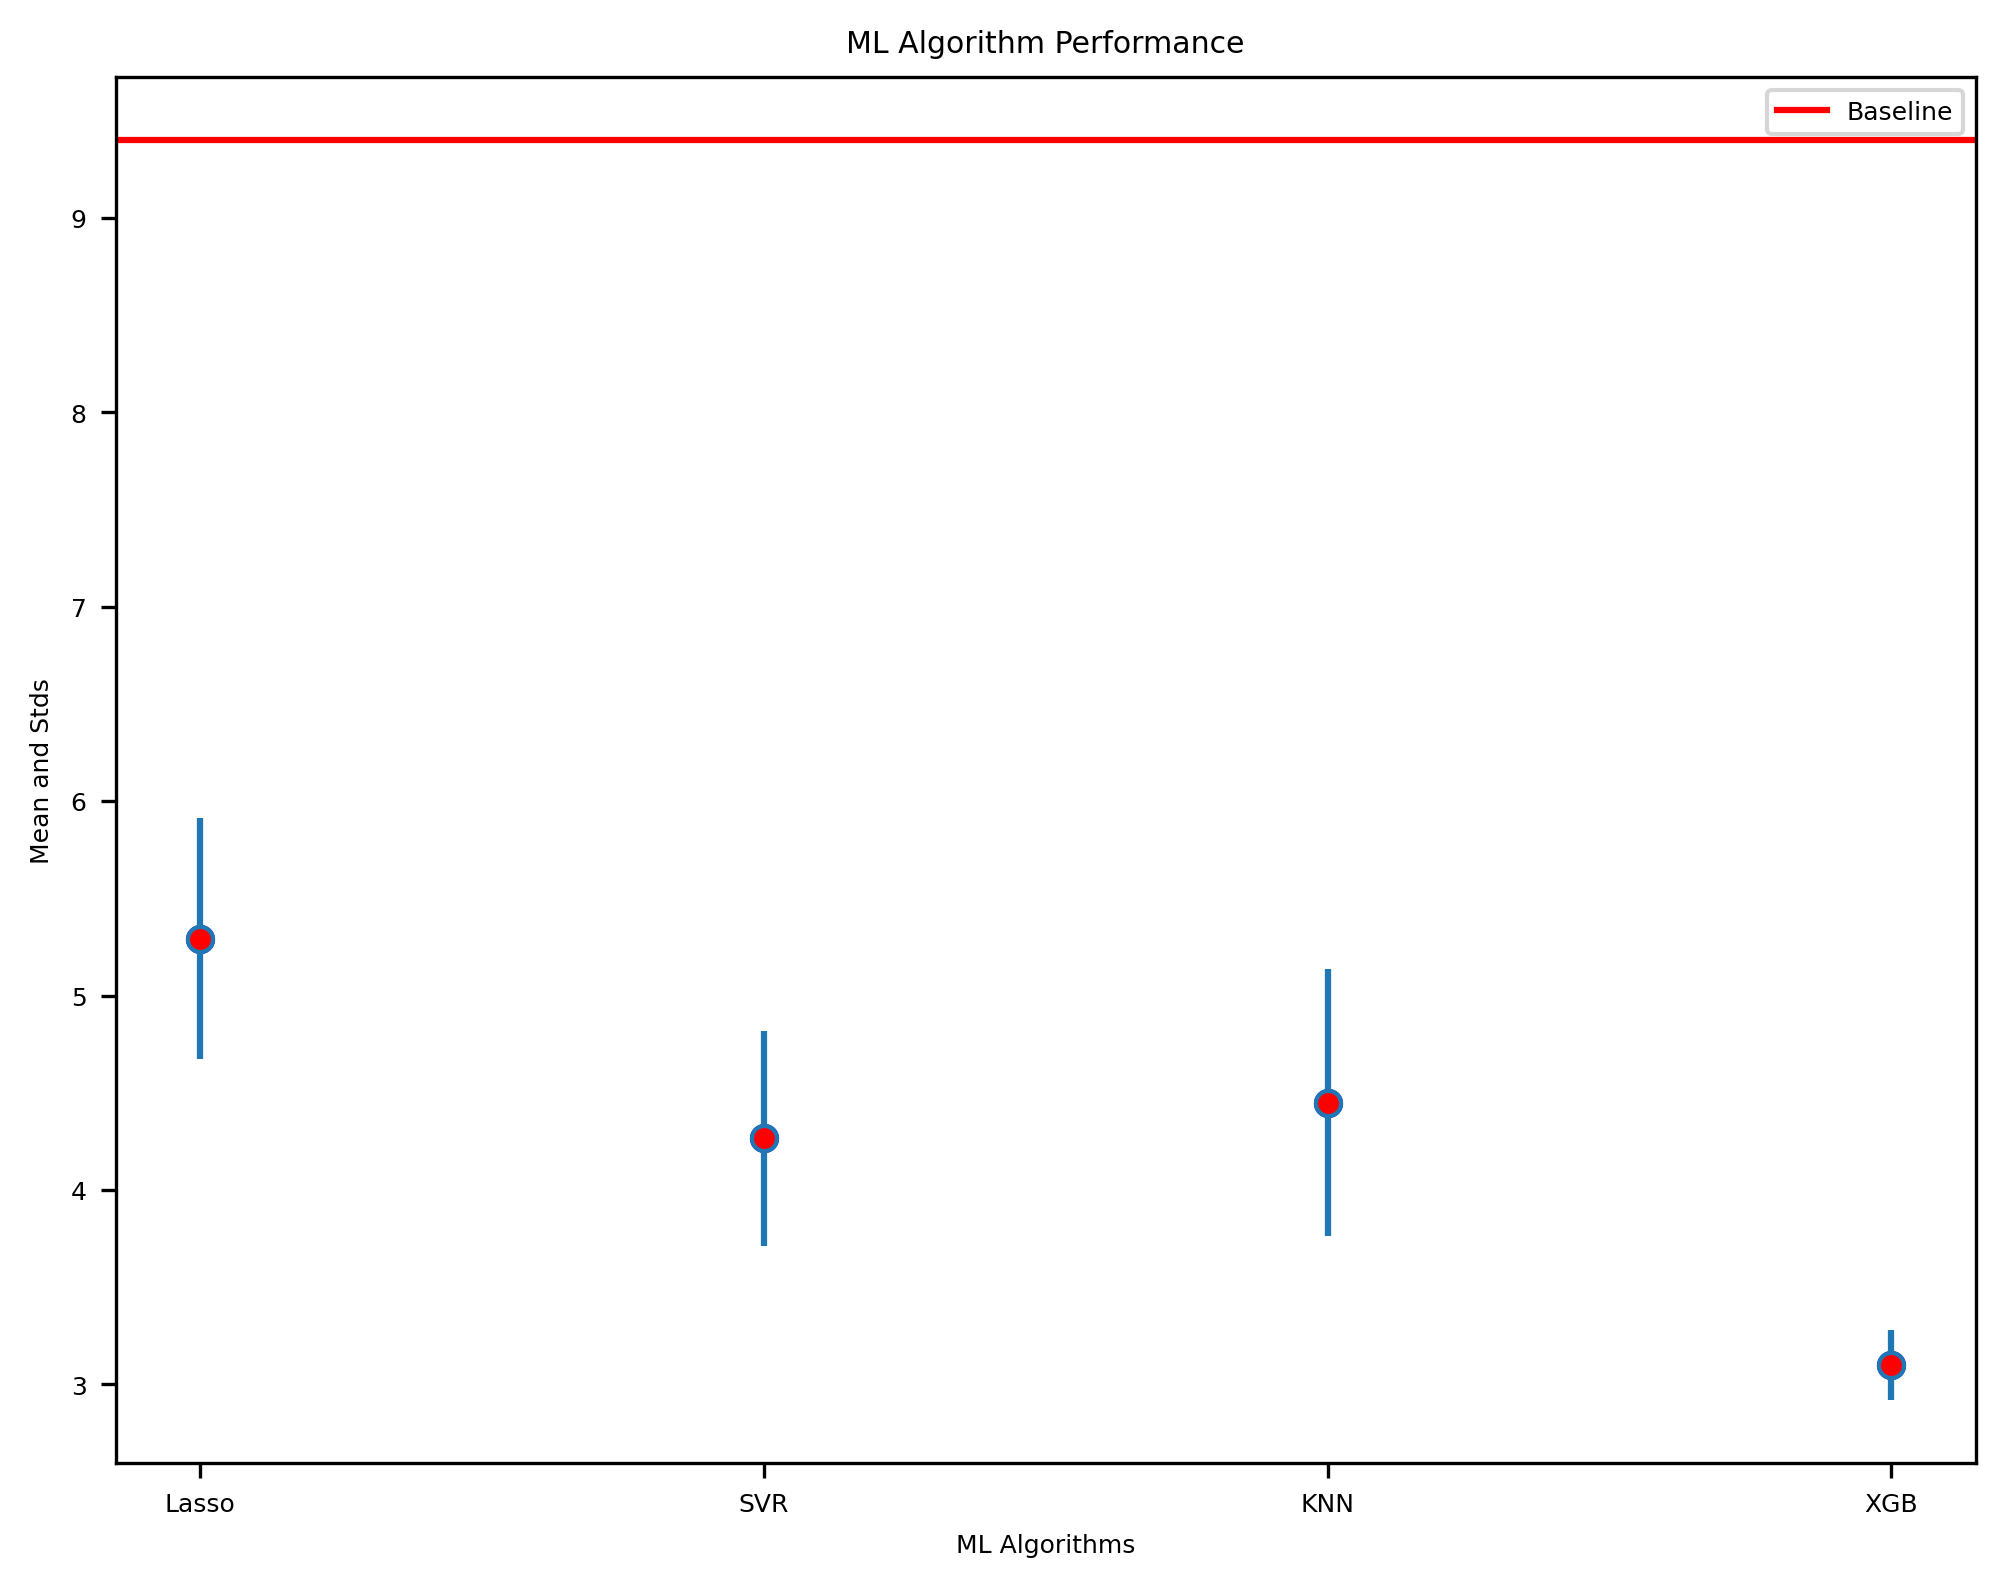

In [423]:
#plotting ML algorithm mean rmse score and std
algos = ['Lasso', 'SVR', 'KNN', 'XGB']
algo_means = [lasso_RMSE, svr_RMSE, knr_RMSE, XGB_mean_test_score]
algo_stds = [lasso_std, svr_std, knr_std, XGB_std]

plt.figure(figsize=(8,6))
plt.rcParams['figure.dpi']=300
plt.scatter(algos, algo_means,color="blue")
plt.errorbar(algos ,algo_means, yerr = algo_stds,fmt="o",mfc="red")
plt.axhline(baseline_rmse, c='r', label='Baseline')
plt.xlabel('ML Algorithms')
plt.ylabel('Mean and Stds')
plt.title('ML Algorithm Performance')
plt.legend(loc='upper right')
plt.savefig('figures/ML_Algo.png')
plt.show()

In [396]:
with open('/Users/danarohde/Desktop/Data1030-LifeExpProject/results/xgb.pkl', 'rb') as file:
    loaded_data = pickle.load(file)

grid = loaded_data[0]
feature_names = loaded_data[1]
test_scores = loaded_data[2]
X_test = loaded_data[3]
y_test = loaded_data[4]
#y_test_pred = loaded_data[5]
model = loaded_data[6]
results = loaded_data[7]

In [359]:
#calculating baseline RMSE Score on the test set
mean_y = np.mean(y_test)
mean_y_array = np.full_like(y_test, mean_y)
 
baseline_rmse = np.sqrt(mean_squared_error(y_test, mean_y_array))
print("Baseline RMSE Score: ", baseline_rmse)

Baseline RMSE Score:  9.39927286134876


<function matplotlib.pyplot.show(close=None, block=None)>

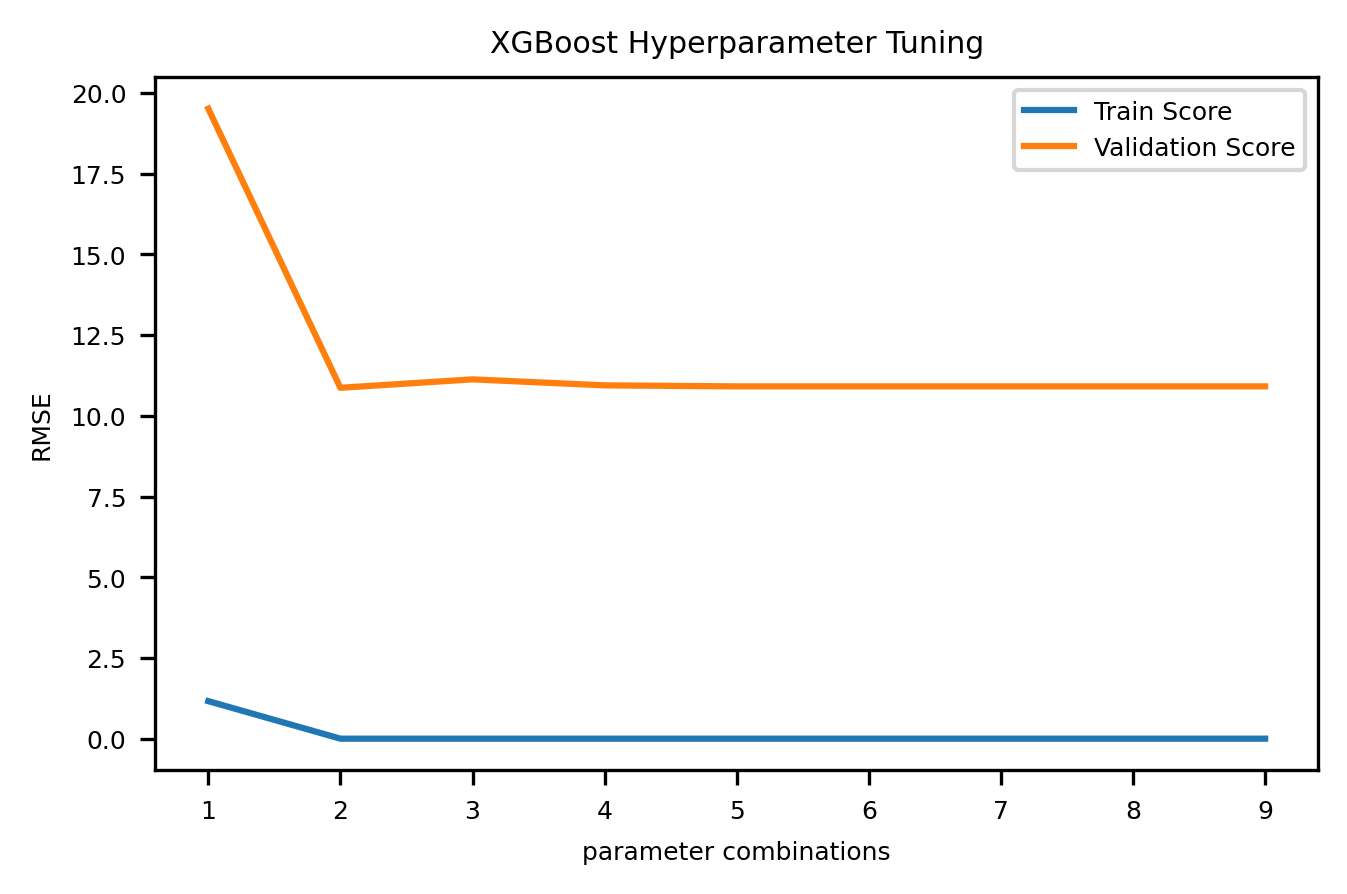

In [413]:
train_scores = results['mean_train_score']
test_scores = results['mean_test_score']

comb = np.linspace(1,9,9)
plt.rcParams['figure.dpi']=300
plt.figure(figsize=(5,3))
plt.plot(comb, -1*train_scores, label = 'Train Score')
plt.plot(comb, -1*test_scores, label = 'Validation Score')
plt.xlabel('parameter combinations')
plt.ylabel('RMSE')
plt.title('XGBoost Hyperparameter Tuning')
#plt.xscale('log')
plt.legend()
plt.savefig('figures/XGB_trainval_score.png')
plt.show

In [414]:
print(grid.score(X_test,y_test))
print(grid.best_params_)

-8.953991205600673
{'xgbregressor__max_depth': 3, 'xgbregressor__n_estimators': 10000}


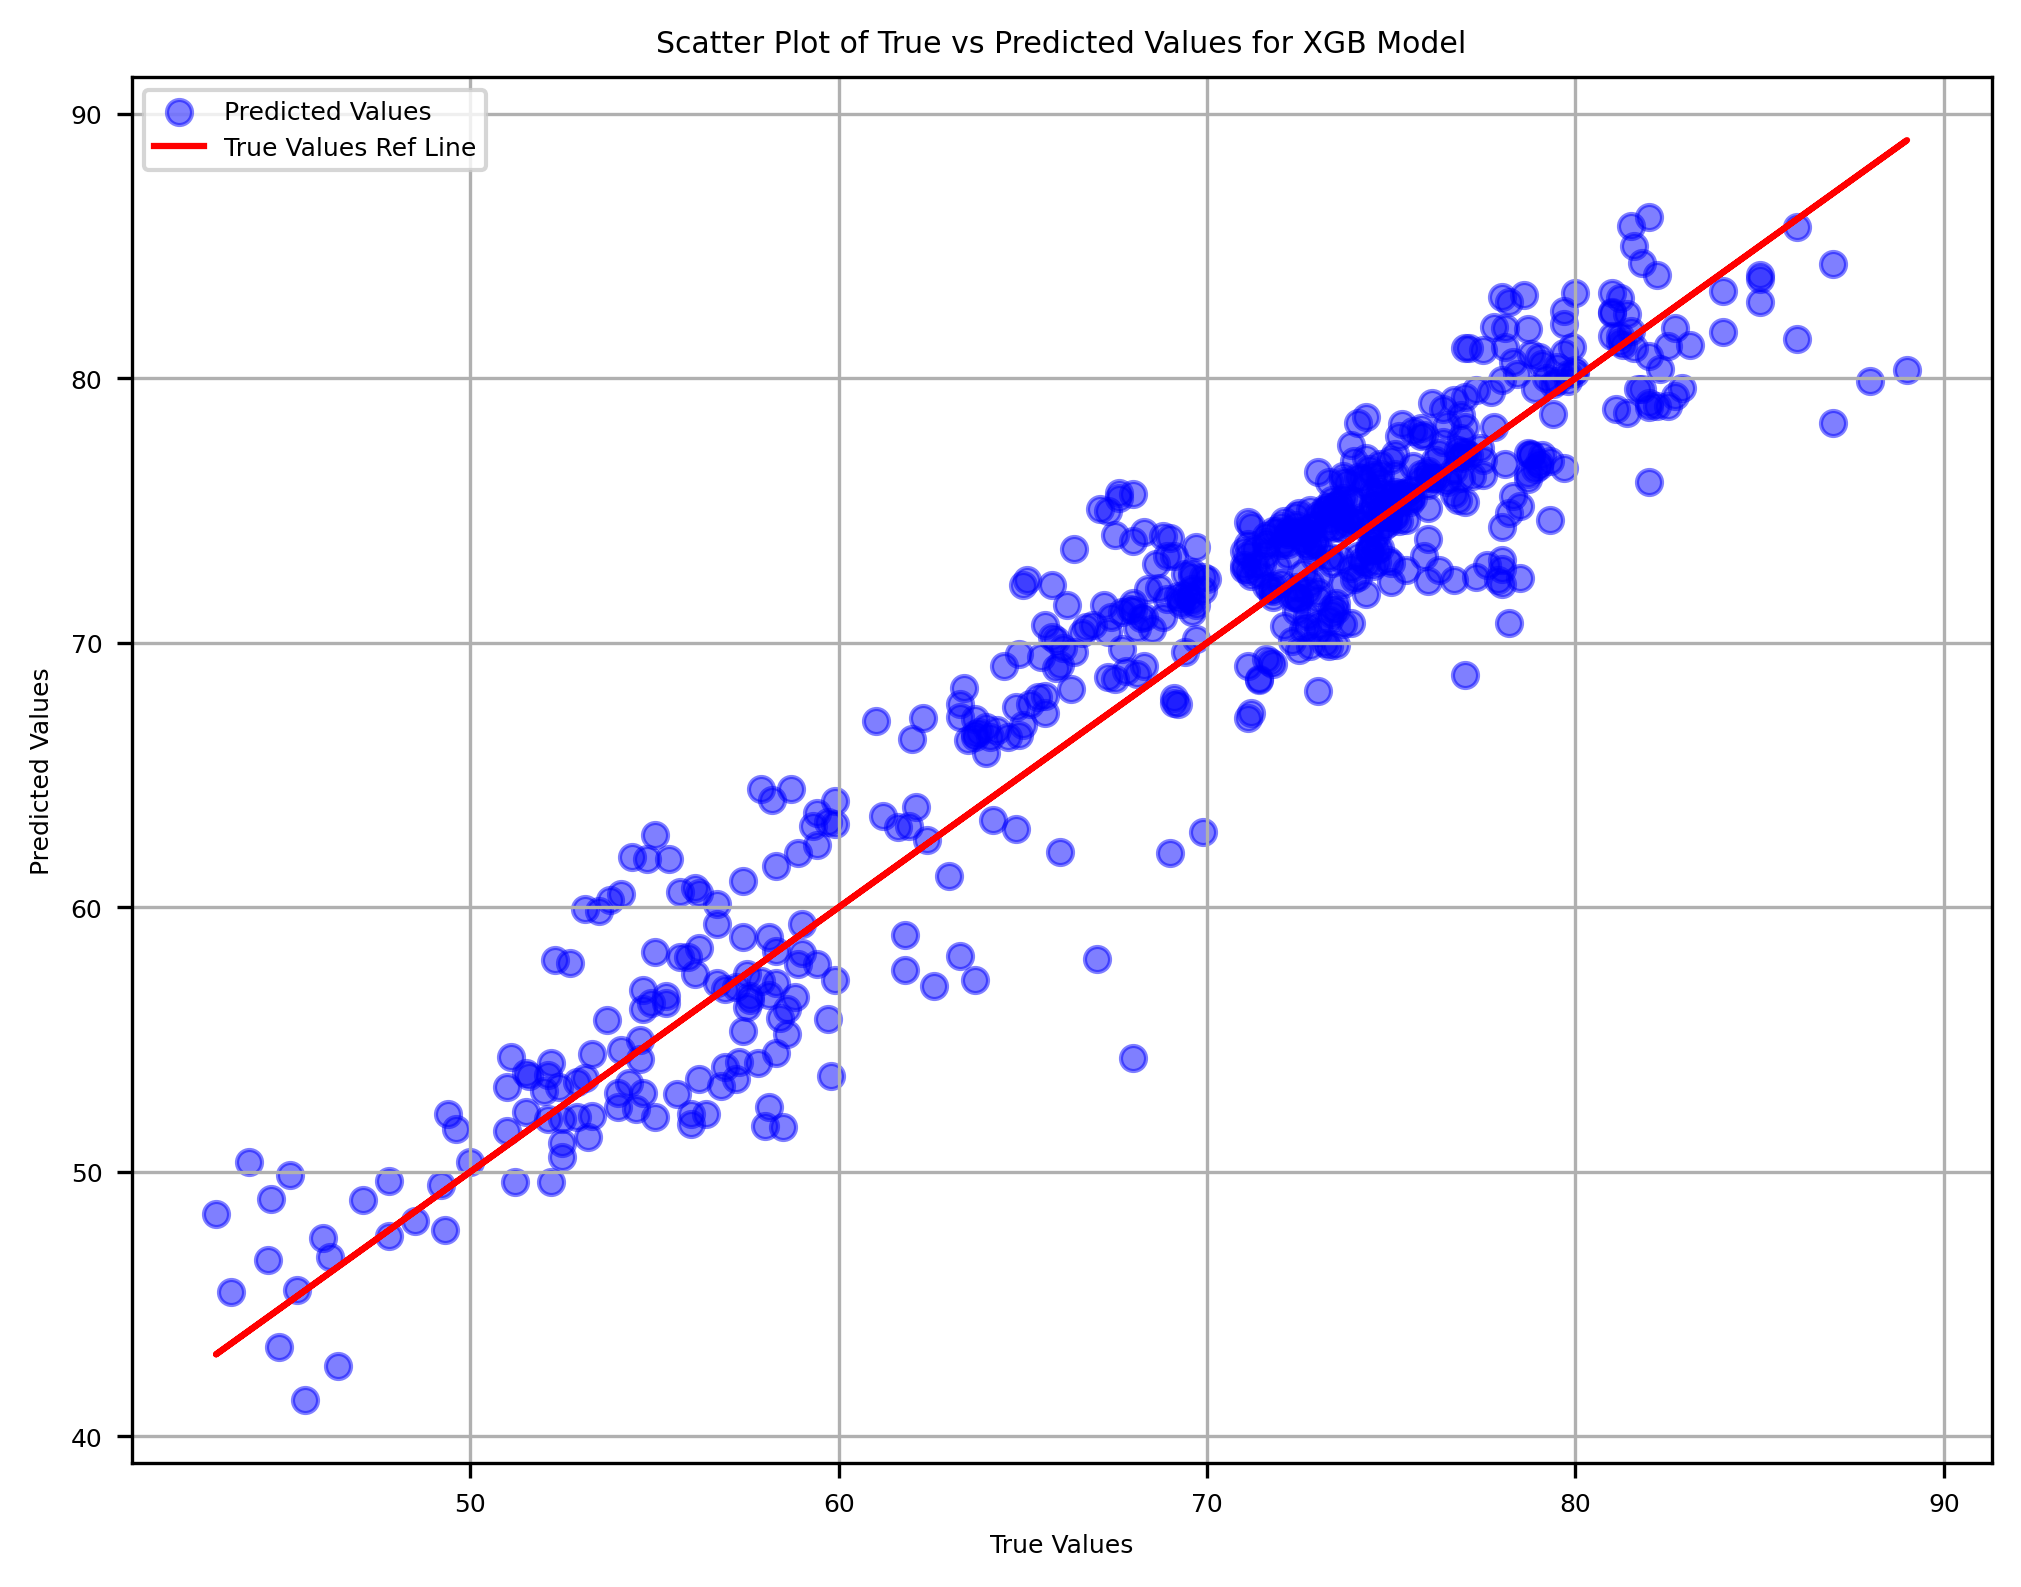

In [435]:
#calculating y_test_pred
best_est = grid.best_estimator_
y_test_pred = best_est.predict(X_test)

plt.figure(figsize=(8, 6))
plt.rcParams['figure.dpi']=300
plt.scatter(y_test, y_test_pred, alpha=0.5, color='blue', label='Predicted Values')
plt.plot(y_test, y_test, color='red', label='True Values Ref Line')
plt.title('Scatter Plot of True vs Predicted Values for XGB Model')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.legend()
plt.savefig('figures/XGB_truevpred_scatter.png')
plt.show()

In [416]:
import shap
shap.initjs()
# create the explainer object with the XGBoost model
explainer = shap.Explainer(grid.best_estimator_[1])
# transform the test set
X_test_transformed = grid.best_estimator_[0].transform(X_test)
print(np.shape(X_test_transformed))
# calculate shap values on the first 1000 points in the test
shap_values = explainer.shap_values(X_test_transformed)
print(np.shape(shap_values))

(592, 166)
(592, 166)


In [429]:
index = 20
print(explainer.expected_value)
shap.force_plot(explainer.expected_value, shap_values[index,:], features = X_test_transformed[index,:],feature_names = feature_names)


69.18899


In [418]:
index = 150
print(explainer.expected_value)
shap.force_plot(explainer.expected_value, shap_values[index,:], features = X_test_transformed[index,:],feature_names = feature_names)

69.18899


In [419]:
index = 300
print(explainer.expected_value)
shap.force_plot(explainer.expected_value, shap_values[index,:], features = X_test_transformed[index,:],feature_names = feature_names)

69.18899


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


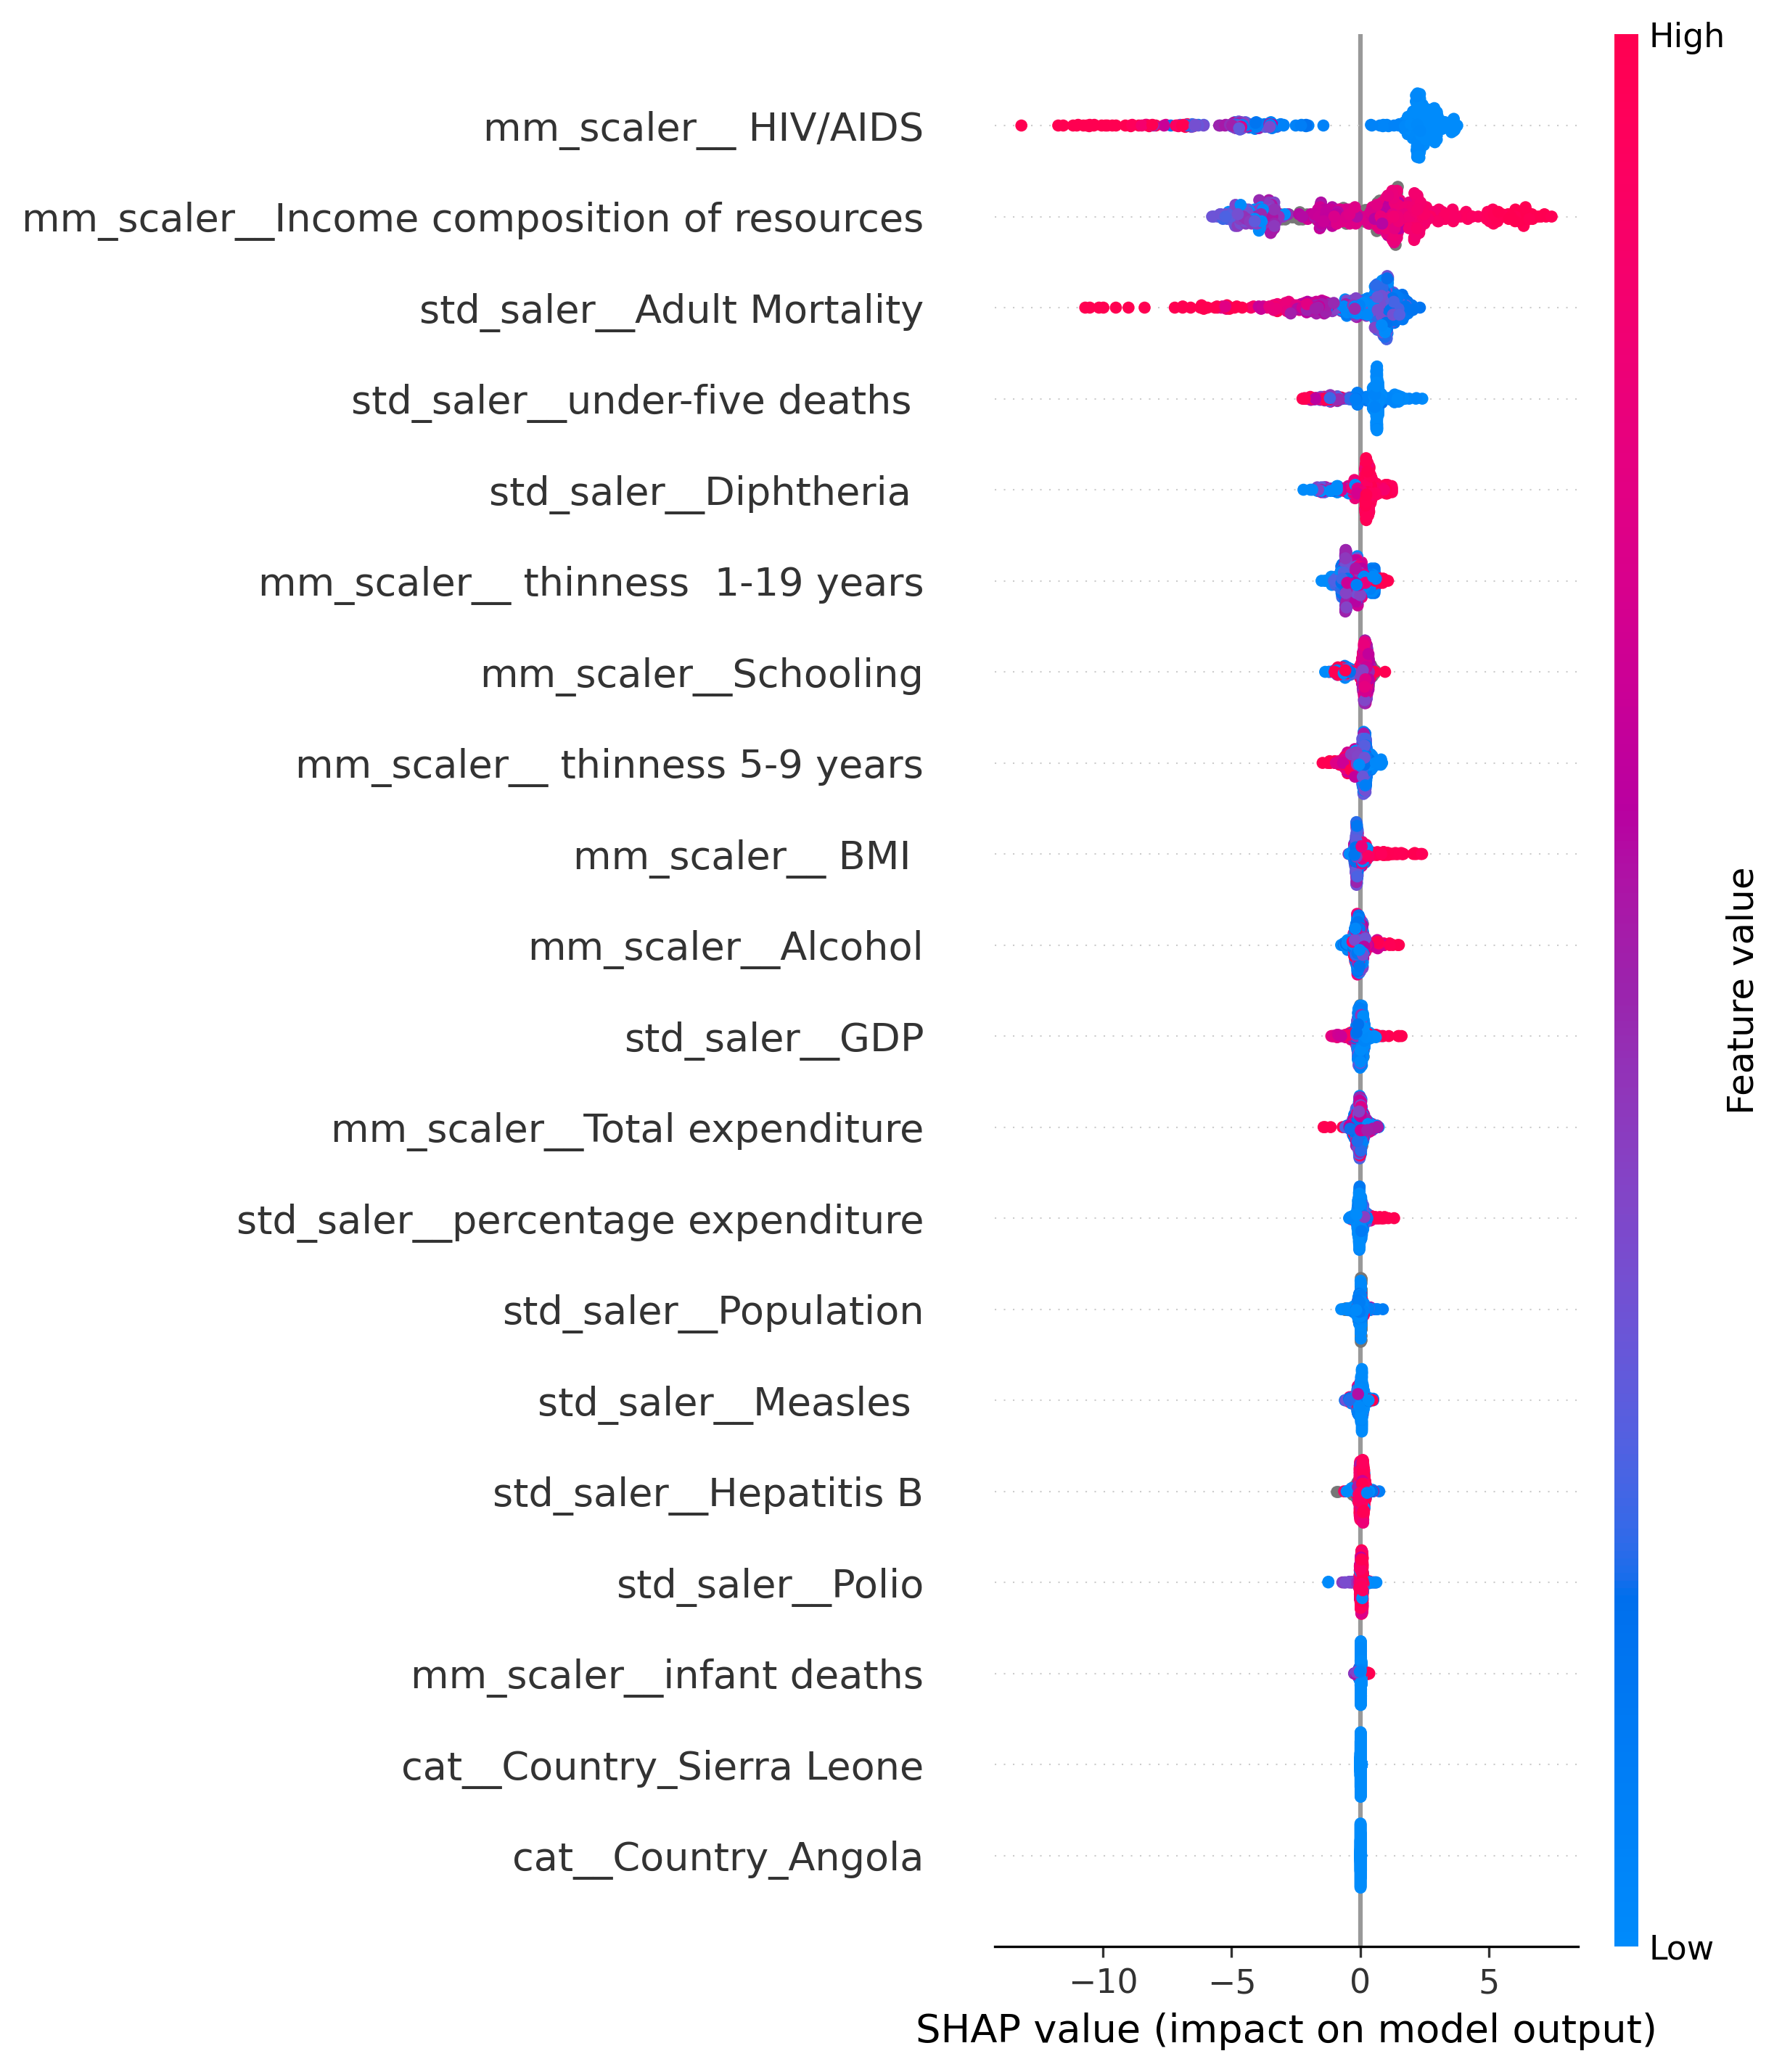

In [420]:
#creating SHAP summary
shap.summary_plot(shap_values, X_test_transformed,feature_names = feature_names)

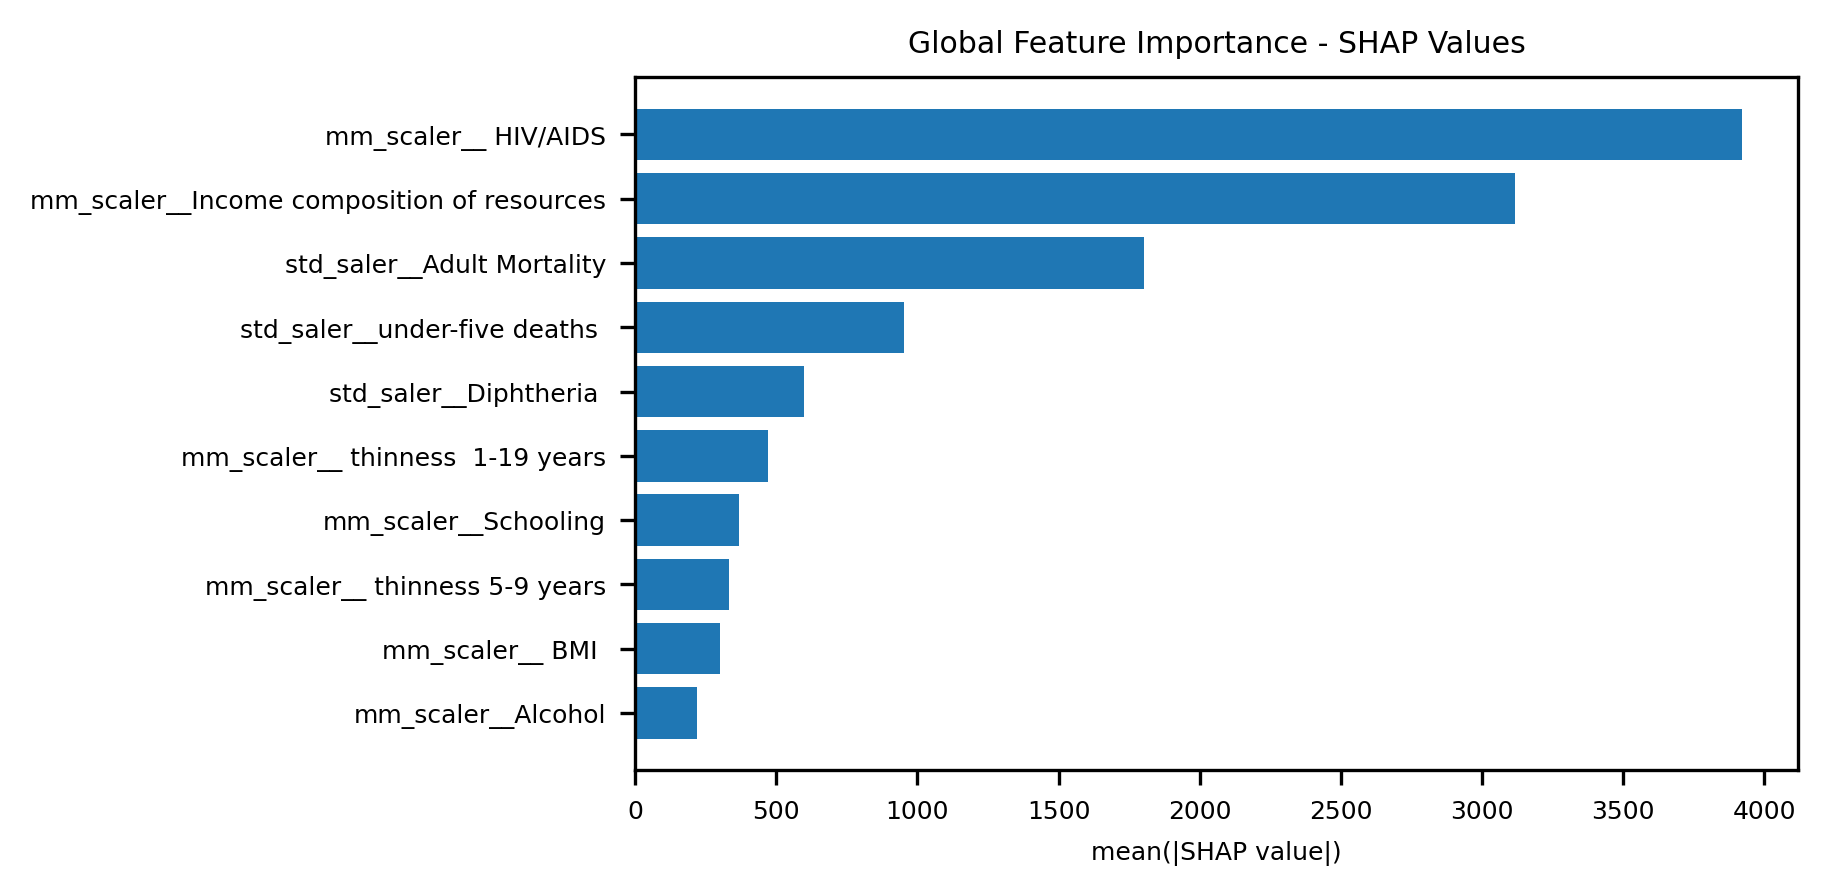

In [432]:
#calculating shap values for each feature
shap_summary = np.sum(np.abs(shap_values),axis=0)+np.sum(np.abs(shap_values),axis=0)

#sorting the shap values
indcs = np.argsort(shap_summary)
shap_summary[indcs]

#plotting features and shap values with the highest shap values
plt.rcParams['figure.dpi']=300
plt.figure(figsize=(5,3))
plt.barh(feature_names[indcs[-10:]],shap_summary[indcs[-10:]])
plt.xlabel('mean(|SHAP value|)')
plt.title('Global Feature Importance - SHAP Values')
plt.savefig('figures/shap.png',bbox_inches='tight')
plt.show()

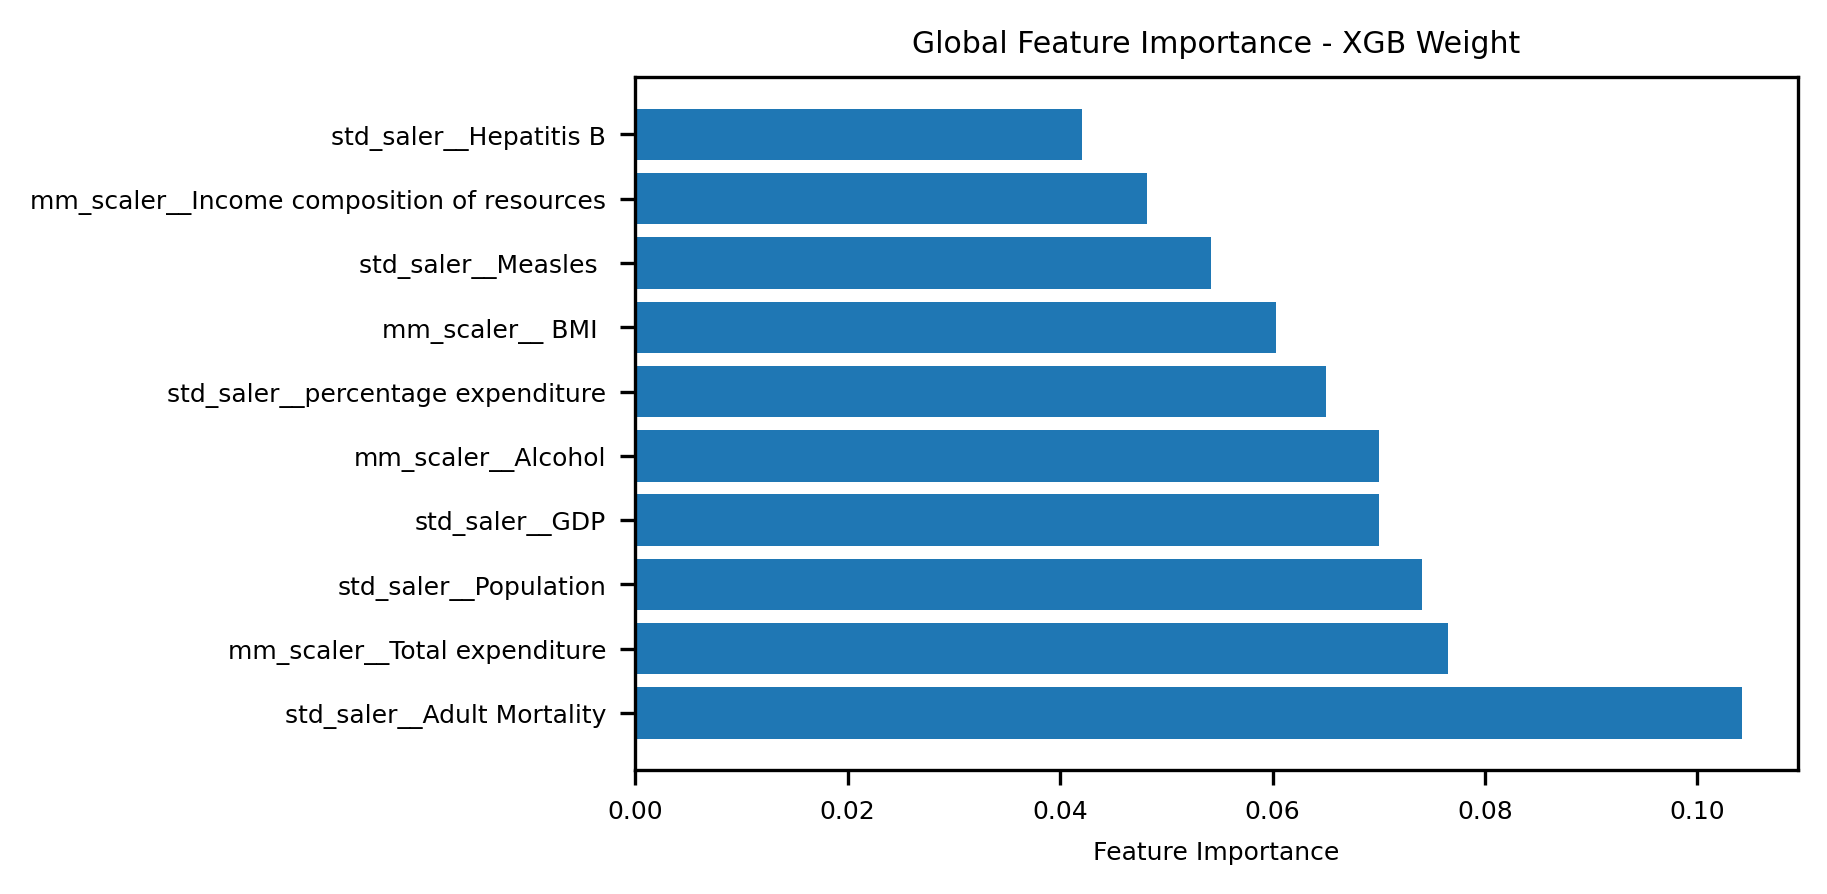

In [433]:
##Plotting the feature importance graph when importance type is weight
#returning the best estimator from the grid search
best_pipeline = grid.best_estimator_

#returning the best model by by accessing XGBRegressor from the pipeline
best_model = best_pipeline.named_steps['xgbregressor']

#returning the feature importances from the best model
ftr_imp = best_model.feature_importances_

#sorting the feature importances
ftr_imp_sorted = np.argsort(ftr_imp)[::-1]

#selecting the 10 indicies with the highest ftr importance
ten_indcs = ftr_imp_sorted[:10]

#getting the feature importance value that corrisponds to the 10 indicies
ten_ftr_imp = ftr_imp[ten_indcs]

#getting the feature names that corrisponds to the 10 indicies
ftr_names = feature_names[ten_indcs]

#plotting the 10 feature importance values
plt.rcParams['figure.dpi']=300
plt.figure(figsize=(5,3))
plt.barh(ftr_names,ten_ftr_imp)
plt.title('Global Feature Importance - XGB Weight')
plt.xlabel('Feature Importance')
plt.savefig('figures/ftrimp_weight.png',bbox_inches='tight')
plt.show()

In [407]:
np.random.seed(42)

nr_runs = 10
scores = np.zeros([len(ftr_names),nr_runs])

test_score = model.score(X_test,y_test)
print('test score = ',test_score)
#print('test baseline = ',np.sum(y_test == ' <=50K')/len(y_test))
# loop through the features
for i in range(len(ftr_names)):
    print('shuffling '+str(ftr_names[i]))
    acc_scores = []
    for j in range(nr_runs):
        X_test_shuffled = X_test.copy()
        X_test_shuffled[ftr_names[i]] = np.random.permutation(X_test[ftr_names[i]].values)
        acc_scores.append(model.score(X_test_shuffled,y_test))
    print('   shuffled test score:',np.around(np.mean(acc_scores),3),'+/-',np.around(np.std(acc_scores),3))
    scores[i] = acc_scores

test score =  -8.953991205600673
shuffling Country
   shuffled test score: -8.954 +/- 0.0
shuffling Year
   shuffled test score: -8.954 +/- 0.0
shuffling Status
   shuffled test score: -8.976 +/- 0.011
shuffling Adult Mortality
   shuffled test score: -23.63 +/- 0.809
shuffling infant deaths
   shuffled test score: -9.022 +/- 0.035
shuffling Alcohol
   shuffled test score: -9.334 +/- 0.099
shuffling percentage expenditure
   shuffled test score: -9.357 +/- 0.088
shuffling Hepatitis B
   shuffled test score: -8.993 +/- 0.079
shuffling Measles 
   shuffled test score: -8.897 +/- 0.088
shuffling  BMI 
   shuffled test score: -9.711 +/- 0.129
shuffling under-five deaths 
   shuffled test score: -9.289 +/- 0.17
shuffling Polio
   shuffled test score: -8.858 +/- 0.064
shuffling Total expenditure
   shuffled test score: -8.769 +/- 0.077
shuffling Diphtheria 
   shuffled test score: -9.482 +/- 0.159
shuffling  HIV/AIDS
   shuffled test score: -29.027 +/- 1.855
shuffling GDP
   shuffled test sc

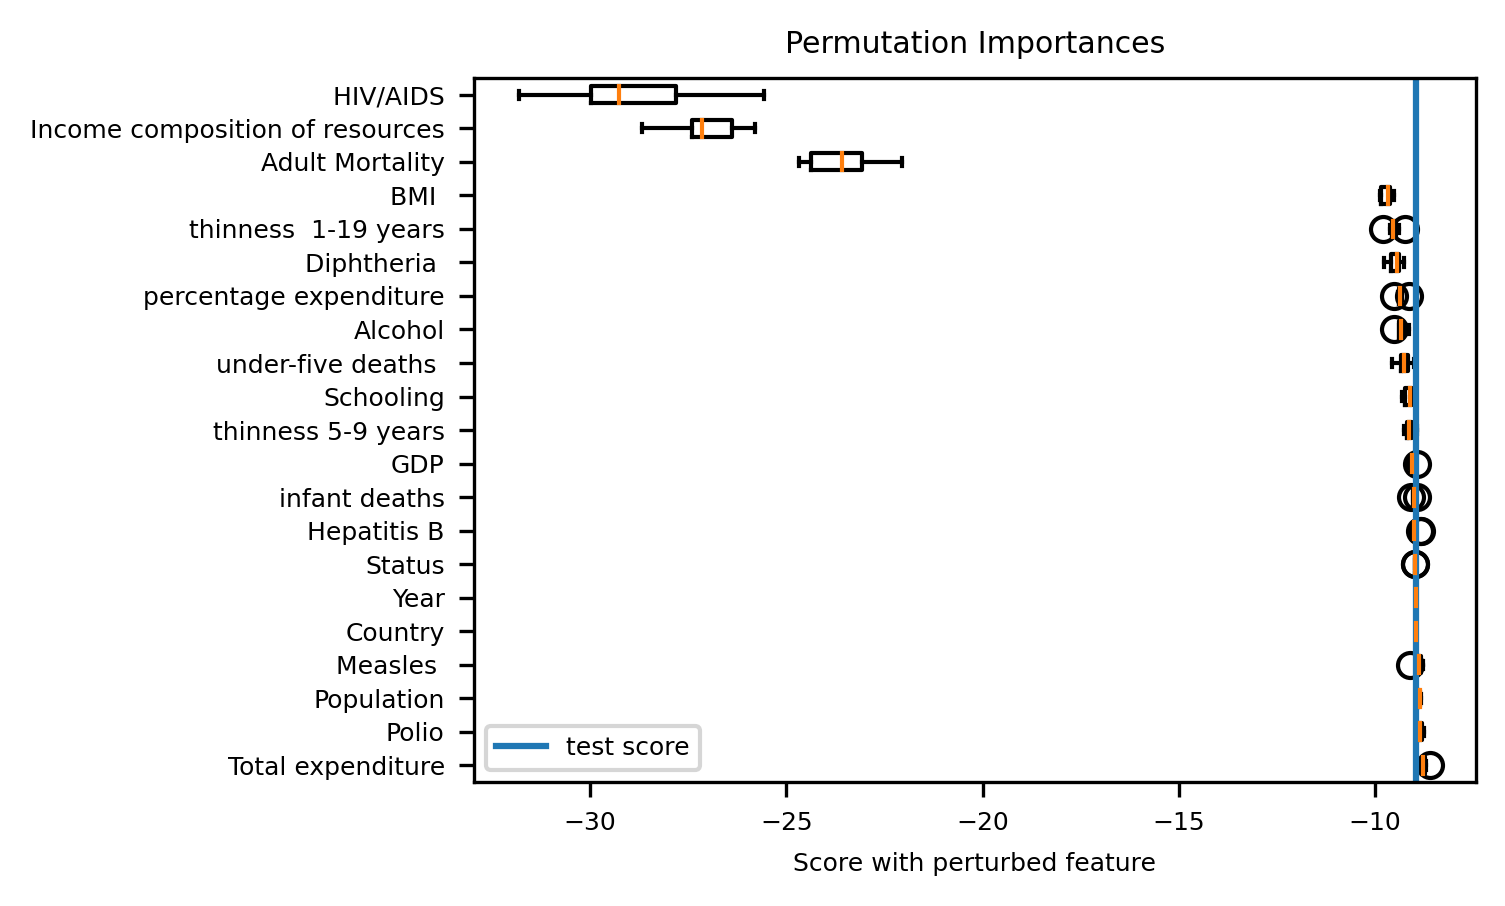

In [412]:
sorted_indcs = np.argsort(np.mean(scores,axis=1))[::-1]
plt.rcParams['figure.dpi']=300
plt.rcParams.update({'font.size':6})
plt.figure(figsize=(5,3))
plt.boxplot(scores[sorted_indcs].T,labels=ftr_names[sorted_indcs],vert=False)
plt.axvline(test_score,label='test score')
plt.title("Permutation Importances")
plt.xlabel('Score with perturbed feature')
plt.legend()
plt.tight_layout()
plt.savefig('figures/ftrimp_permutation.png')
plt.show()